# Method from Zhang and Merritt

**Problem:** $\min_{u \in D_v} \min_{x,s \geq 0} \frac{1}{2} \| A_t x - b_t \|_2^2 + \frac{1}{2} \| Ax + s - u \|_2^2 = \min_{u \in D_v} \frac{1}{2} \| A_t x(u) - b_t \|_2^2 + \frac{1}{2} \| Ax(u) + s(u) - u \|_2^2$

**Algorithm:**
* Inputs: Initial dose bound $u^0 \in D_v$
* Outputs: Beamlet intensities $x(u^k)$

For $k = 0,1,2,\dots$
1. Solve subproblem for $x(u^k)$
2. Compute $\nabla f(u^k) = -\max(Ax(u^k) - u^k, 0)$
3. If stopping criteria are met, output $x(u^k)$ and stop.
4. Set $u^{k+1} = Proj_{D_v^k}(u^k - \nabla f(u^k))$ where $D_v^k = \{u : u \geq u^k\} \cap D_v$

Note that in Step 4 the vector inside the projection operator is $u^k - \nabla f(u^k) = \max(u^k,Ax(u^k)) \geq u^k$

## Solving the subproblem

$$\min_{x,s \geq 0}\left\| \begin{bmatrix} A_t & 0 \\ A & I \end{bmatrix} \begin{bmatrix} x \\ s \end{bmatrix} - \begin{bmatrix} b_t \\ u \end{bmatrix} \right\|_2^2 = \min_{y\geq 0} \| Py - q \|_2^2$$ 

# Method adapted to our model

$$min_{u \in D_v} \min_{x,s \geq 0} \frac{\alpha_1}{2n_1} \| A_1 x - b \|_2^2 + \frac{\alpha_2}{2n_2} \| A_2 x + s - u \|_2^2 + \frac{\lambda}{2} \| x \|_2^2$$

**Algorithm:**
* Inputs: Initial dose bound $u^0 \in D_v$
* Outputs: Beamlet intensities $x(u^k)$

For $k = 0,1,2,\dots$
1. Solve subproblem for $x(u^k)$
2. Set $u^{k+1} = Proj_{D_v^k}(u^k - \nabla f(u^k))$ where $D_v^k = \{u : u \geq u^k\} \cap D_v$
3. Check stopping critiera for u, if met solve subproblem for x one more time and stop

Note that in Step 2 the vector inside the projection operator is $u^k - \nabla f(u^k) = \max(u^k,Ax(u^k)) \geq u^k$

## Solving the subproblem

$$\min_{x,s \geq 0}\left\| \begin{bmatrix} \frac{\sqrt{\alpha_1}}{\sqrt{n_1}}A_t & 0 \\ \frac{\sqrt{\alpha_2}}{\sqrt{n_2}}A & \frac{\sqrt{\alpha_2}}{\sqrt{n_2}}I \\ \sqrt{\lambda} I & 0 \end{bmatrix} \begin{bmatrix} x \\ s \end{bmatrix} - \begin{bmatrix} \frac{\sqrt{\alpha_1}}{\sqrt{n_1}} b_t \\ \frac{\sqrt{\alpha_2}}{\sqrt{n_2}} u \\ 0 \end{bmatrix} \right\|_2^2 = \min_{y\geq 0} \| Py - q \|_2^2$$ 

In [1]:
% Add path to data and solver
addpath(genpath('PROSTATE'))
addpath(genpath('minConf'))

In [2]:
% Prostate
prostate.name = 'PTV_68';
pt1.type = 'unif'; pt1.dose = 81; pt1.weight = 1;
pt2.type = 'ldvc'; pt2.dose = 81; pt2.percent = 95; pt2.weight = 1;
pt3.type ='udvc'; pt3.dose = 1.12*81; pt3.percent = 0; pt3.weight = 1;

% Lymph nodes
nodes.name = 'PTV_56';
nt1.type = 'unif'; nt1.dose = 60; nt1.weight = 1;
nt2.type = 'ldvc'; nt2.dose = 60; nt2.percent = 95; nt2.weight = 1;
nt3.type = 'udvc'; nt3.dose = 1.12*60; nt3.percent = 0; nt3.weight = 1;

% Rectum
rectum.name = 'Rectum';
rt1.type = 'udvc'; rt1.dose = 50; rt1.percent = 50; rt1.weight = 1;
rt2.type = 'udvc'; rt2.dose = 30; rt2.percent = 30; rt2.weight = 1;
rt3.type = 'udvc'; rt3.dose = 10; rt3.percent = 10; rt3.weight = 1;
rt4.type = 'udvc'; rt4.dose = 75; rt4.percent = 0; rt4.weight = 1;
rt5.type = 'udvc'; rt5.dose = 60; rt5.percent = 20; rt5.weight = 1;
rt6.type = 'udvc'; rt6.dose = 20; rt6.percent = 60; rt6.weight = 1;

% Bladder
bladder.name = 'Bladder';
bt1.type = 'udvc'; bt1.dose = 30; bt1.percent = 30; bt1.weight = 1;

In [6]:
% Example 4.1(a)

% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt1};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Our Method
prob.calcBeams(false); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Zhang Method
prob.slackDose(false); 
x2a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x2a);

% Zhang Method (hc)
prob.constGen(x2a); 
x2b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('Time: %.2f\n',prob.time);
prob.printStats(x2b);


Our Method
Time: 26.60
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.66 | 83.47 | 0.65 | 54.69
Structure: Rectum
* udvc | 51.52 | 4218.64

Our Method (hc)
Time: 7.54
Structure: PTV_68
* unif | 76.01 | 80.88 | 80.96 | 79.65 | 83.49 | 0.66 | 54.99
Structure: Rectum
* udvc | 50.00 | 4190.45

Zhang Method
Time: 385.35
Structure: PTV_68
* unif | 75.99 | 80.88 | 80.96 | 79.63 | 83.40 | 0.66 | 55.24
Structure: Rectum
* udvc | 51.21 | 4156.60

Zhang Method (hc)Time: 5.50
Structure: PTV_68
* unif | 76.01 | 80.88 | 80.96 | 79.65 | 83.40 | 0.66 | 54.99
Structure: Rectum
* udvc | 49.94 | 4177.65


Error using eval
Undefined function or variable 'x3b'.



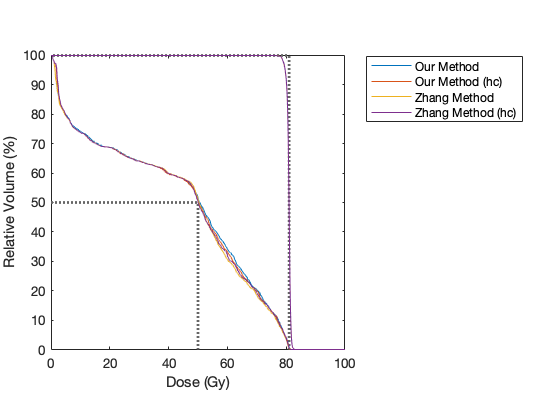

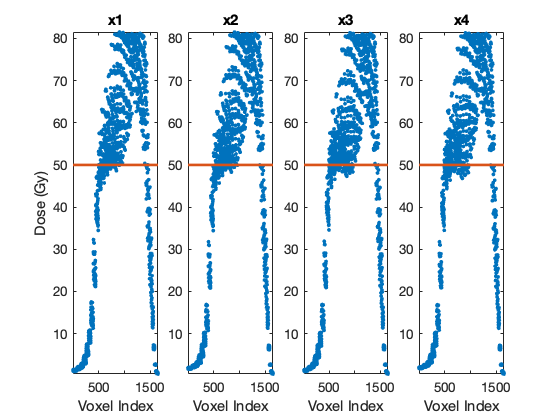

In [7]:
% Plots
prob.compareVoxelDose(2,[x1a,x1b,x2a,x2b])
prob.compareDVH([x1a,x1b,x2a,x2b],{'Our Method','Our Method (hc)','Zhang Method','Zhang Method (hc)'}) 

iter: 0, obj: 3.2805e+03
iter: 1, obj: 4.0880e+01, wDiff: 1.7164e-01
iter: 2, obj: 2.6546e+01, wDiff: 7.8390e-02
iter: 3, obj: 2.0728e+01, wDiff: 5.4160e-02
iter: 4, obj: 1.7519e+01, wDiff: 4.1242e-02
iter: 5, obj: 1.5448e+01, wDiff: 3.3752e-02
iter: 6, obj: 1.3977e+01, wDiff: 2.8705e-02
iter: 7, obj: 1.2869e+01, wDiff: 2.5078e-02
iter: 8, obj: 1.2002e+01, wDiff: 2.2257e-02
iter: 9, obj: 1.1306e+01, wDiff: 2.0027e-02
iter: 10, obj: 1.0733e+01, wDiff: 1.8203e-02
iter: 11, obj: 1.0255e+01, wDiff: 1.6641e-02
iter: 12, obj: 9.8536e+00, wDiff: 1.5279e-02
iter: 13, obj: 9.5132e+00, wDiff: 1.4077e-02
iter: 14, obj: 9.2226e+00, wDiff: 1.3022e-02
iter: 15, obj: 8.9715e+00, wDiff: 1.2126e-02
iter: 16, obj: 8.7516e+00, wDiff: 1.1368e-02
iter: 17, obj: 8.5571e+00, wDiff: 1.0702e-02
iter: 18, obj: 8.3837e+00, wDiff: 1.0117e-02
iter: 19, obj: 8.2275e+00, wDiff: 9.6099e-03
iter: 20, obj: 8.0861e+00, wDiff: 9.1510e-03
iter: 21, obj: 7.9575e+00, wDiff: 8.7285e-03
iter: 22, obj: 7.8402e+00, wDiff: 8.343

iter: 181, obj: 5.3186e+00, wDiff: 1.3503e-03
iter: 182, obj: 5.3156e+00, wDiff: 1.3539e-03
iter: 183, obj: 5.3127e+00, wDiff: 1.3440e-03
iter: 184, obj: 5.3097e+00, wDiff: 1.3354e-03
iter: 185, obj: 5.3068e+00, wDiff: 1.3279e-03
iter: 186, obj: 5.3040e+00, wDiff: 1.3206e-03
iter: 187, obj: 5.3011e+00, wDiff: 1.3135e-03
iter: 188, obj: 5.2983e+00, wDiff: 1.3032e-03
iter: 189, obj: 5.2955e+00, wDiff: 1.2968e-03
iter: 190, obj: 5.2928e+00, wDiff: 1.2904e-03
iter: 191, obj: 5.2901e+00, wDiff: 1.2841e-03
iter: 192, obj: 5.2874e+00, wDiff: 1.2778e-03
iter: 193, obj: 5.2847e+00, wDiff: 1.2715e-03
iter: 194, obj: 5.2821e+00, wDiff: 1.2653e-03
iter: 195, obj: 5.2794e+00, wDiff: 1.2592e-03
iter: 196, obj: 5.2768e+00, wDiff: 1.2531e-03
iter: 197, obj: 5.2743e+00, wDiff: 1.2470e-03
iter: 198, obj: 5.2717e+00, wDiff: 1.2411e-03
iter: 199, obj: 5.2692e+00, wDiff: 1.2351e-03
iter: 200, obj: 5.2667e+00, wDiff: 1.2292e-03
iter: 201, obj: 5.2642e+00, wDiff: 1.2234e-03
iter: 202, obj: 5.2618e+00, wDiff:

iter: 359, obj: 5.0460e+00, wDiff: 6.7978e-04
iter: 360, obj: 5.0452e+00, wDiff: 6.7783e-04
iter: 361, obj: 5.0445e+00, wDiff: 6.7588e-04
iter: 362, obj: 5.0437e+00, wDiff: 6.7394e-04
iter: 363, obj: 5.0430e+00, wDiff: 6.7202e-04
iter: 364, obj: 5.0423e+00, wDiff: 6.7010e-04
iter: 365, obj: 5.0415e+00, wDiff: 6.6819e-04
iter: 366, obj: 5.0408e+00, wDiff: 6.6629e-04
iter: 367, obj: 5.0401e+00, wDiff: 6.6440e-04
iter: 368, obj: 5.0393e+00, wDiff: 6.6252e-04
iter: 369, obj: 5.0386e+00, wDiff: 6.6065e-04
iter: 370, obj: 5.0379e+00, wDiff: 6.5879e-04
iter: 371, obj: 5.0372e+00, wDiff: 6.5694e-04
iter: 372, obj: 5.0365e+00, wDiff: 6.5509e-04
iter: 373, obj: 5.0358e+00, wDiff: 6.5326e-04
iter: 374, obj: 5.0351e+00, wDiff: 6.5143e-04
iter: 375, obj: 5.0344e+00, wDiff: 6.4961e-04
iter: 376, obj: 5.0337e+00, wDiff: 6.4783e-04
iter: 377, obj: 5.0330e+00, wDiff: 6.4603e-04
iter: 378, obj: 5.0323e+00, wDiff: 6.4423e-04
iter: 379, obj: 5.0316e+00, wDiff: 6.4244e-04
iter: 380, obj: 5.0310e+00, wDiff:

iter: 537, obj: 4.9576e+00, wDiff: 4.3962e-04
iter: 538, obj: 4.9573e+00, wDiff: 4.3869e-04
iter: 539, obj: 4.9570e+00, wDiff: 4.3776e-04
iter: 540, obj: 4.9567e+00, wDiff: 4.3684e-04
iter: 541, obj: 4.9564e+00, wDiff: 4.3591e-04
iter: 542, obj: 4.9560e+00, wDiff: 4.3500e-04
iter: 543, obj: 4.9557e+00, wDiff: 4.3408e-04
iter: 544, obj: 4.9554e+00, wDiff: 4.3317e-04
iter: 545, obj: 4.9551e+00, wDiff: 4.3226e-04
iter: 546, obj: 4.9548e+00, wDiff: 4.3136e-04
iter: 547, obj: 4.9545e+00, wDiff: 4.3045e-04
iter: 548, obj: 4.9542e+00, wDiff: 4.2955e-04
iter: 549, obj: 4.9539e+00, wDiff: 4.3694e-04
iter: 550, obj: 4.9536e+00, wDiff: 4.3412e-04
iter: 551, obj: 4.9533e+00, wDiff: 4.3219e-04
iter: 552, obj: 4.9530e+00, wDiff: 4.3068e-04
iter: 553, obj: 4.9527e+00, wDiff: 4.2938e-04
iter: 554, obj: 4.9523e+00, wDiff: 5.4288e-04
iter: 555, obj: 4.9520e+00, wDiff: 4.2329e-04
iter: 556, obj: 4.9517e+00, wDiff: 4.2229e-04
iter: 557, obj: 4.9514e+00, wDiff: 4.2136e-04
iter: 558, obj: 4.9512e+00, wDiff:

iter: 715, obj: 4.9173e+00, wDiff: 3.0780e-04
iter: 716, obj: 4.9171e+00, wDiff: 3.0721e-04
iter: 717, obj: 4.9170e+00, wDiff: 3.0662e-04
iter: 718, obj: 4.9168e+00, wDiff: 3.0603e-04
iter: 719, obj: 4.9166e+00, wDiff: 3.0544e-04
iter: 720, obj: 4.9165e+00, wDiff: 3.0485e-04
iter: 721, obj: 4.9163e+00, wDiff: 3.0426e-04
iter: 722, obj: 4.9162e+00, wDiff: 3.0368e-04
iter: 723, obj: 4.9160e+00, wDiff: 3.0309e-04
iter: 724, obj: 4.9159e+00, wDiff: 3.7936e-04
iter: 725, obj: 4.9157e+00, wDiff: 3.0187e-04
iter: 726, obj: 4.9156e+00, wDiff: 3.0126e-04
iter: 727, obj: 4.9154e+00, wDiff: 3.0067e-04
iter: 728, obj: 4.9153e+00, wDiff: 3.0009e-04
iter: 729, obj: 4.9151e+00, wDiff: 2.9951e-04
iter: 730, obj: 4.9150e+00, wDiff: 2.9893e-04
iter: 731, obj: 4.9148e+00, wDiff: 2.9835e-04
iter: 732, obj: 4.9147e+00, wDiff: 2.9778e-04
iter: 733, obj: 4.9145e+00, wDiff: 2.9721e-04
iter: 734, obj: 4.9144e+00, wDiff: 2.9664e-04
iter: 735, obj: 4.9142e+00, wDiff: 2.9630e-04
iter: 736, obj: 4.9141e+00, wDiff:

iter: 893, obj: 4.8970e+00, wDiff: 2.2058e-04
iter: 894, obj: 4.8969e+00, wDiff: 2.2018e-04
iter: 895, obj: 4.8968e+00, wDiff: 2.1979e-04
iter: 896, obj: 4.8968e+00, wDiff: 2.1940e-04
iter: 897, obj: 4.8967e+00, wDiff: 2.1901e-04
iter: 898, obj: 4.8966e+00, wDiff: 2.1861e-04
iter: 899, obj: 4.8965e+00, wDiff: 2.1822e-04
iter: 900, obj: 4.8965e+00, wDiff: 2.1783e-04
iter: 901, obj: 4.8964e+00, wDiff: 2.1744e-04
iter: 902, obj: 4.8963e+00, wDiff: 2.1706e-04
iter: 903, obj: 4.8962e+00, wDiff: 2.1667e-04
iter: 904, obj: 4.8961e+00, wDiff: 2.1628e-04
iter: 905, obj: 4.8961e+00, wDiff: 2.1590e-04
iter: 906, obj: 4.8960e+00, wDiff: 2.1551e-04
iter: 907, obj: 4.8959e+00, wDiff: 2.1513e-04
iter: 908, obj: 4.8958e+00, wDiff: 2.1474e-04
iter: 909, obj: 4.8958e+00, wDiff: 2.1436e-04
iter: 910, obj: 4.8957e+00, wDiff: 2.1398e-04
iter: 911, obj: 4.8956e+00, wDiff: 2.1360e-04
iter: 912, obj: 4.8955e+00, wDiff: 2.1321e-04
iter: 913, obj: 4.8955e+00, wDiff: 2.1283e-04
iter: 914, obj: 4.8954e+00, wDiff:

iter: 1070, obj: 4.8865e+00, wDiff: 1.6190e-04
iter: 1071, obj: 4.8864e+00, wDiff: 1.6161e-04
iter: 1072, obj: 4.8864e+00, wDiff: 1.6133e-04
iter: 1073, obj: 4.8863e+00, wDiff: 1.6105e-04
iter: 1074, obj: 4.8863e+00, wDiff: 1.6076e-04
iter: 1075, obj: 4.8862e+00, wDiff: 1.6048e-04
iter: 1076, obj: 4.8862e+00, wDiff: 1.6020e-04
iter: 1077, obj: 4.8862e+00, wDiff: 1.5992e-04
iter: 1078, obj: 4.8861e+00, wDiff: 1.5964e-04
iter: 1079, obj: 4.8861e+00, wDiff: 1.5936e-04
iter: 1080, obj: 4.8860e+00, wDiff: 1.5908e-04
iter: 1081, obj: 4.8860e+00, wDiff: 1.5880e-04
iter: 1082, obj: 4.8859e+00, wDiff: 1.5852e-04
iter: 1083, obj: 4.8859e+00, wDiff: 1.5824e-04
iter: 1084, obj: 4.8859e+00, wDiff: 1.5796e-04
iter: 1085, obj: 4.8858e+00, wDiff: 1.5769e-04
iter: 1086, obj: 4.8858e+00, wDiff: 1.5741e-04
iter: 1087, obj: 4.8857e+00, wDiff: 1.5713e-04
iter: 1088, obj: 4.8857e+00, wDiff: 1.5686e-04
iter: 1089, obj: 4.8857e+00, wDiff: 1.5658e-04
iter: 1090, obj: 4.8856e+00, wDiff: 1.5631e-04
iter: 1091, o

iter: 1244, obj: 4.8816e+00, wDiff: 5.5455e-05
iter: 1245, obj: 4.8815e+00, wDiff: 5.5443e-05
iter: 1246, obj: 4.8815e+00, wDiff: 1.2818e-04
iter: 1247, obj: 4.8815e+00, wDiff: 5.5282e-05
iter: 1248, obj: 4.8815e+00, wDiff: 5.5254e-05
iter: 1249, obj: 4.8815e+00, wDiff: 5.5237e-05
iter: 1250, obj: 4.8815e+00, wDiff: 5.5232e-05
iter: 1251, obj: 4.8814e+00, wDiff: 1.2776e-04
iter: 1252, obj: 4.8814e+00, wDiff: 5.5060e-05
iter: 1253, obj: 4.8814e+00, wDiff: 5.5039e-05
iter: 1254, obj: 4.8814e+00, wDiff: 5.5030e-05
iter: 1255, obj: 4.8814e+00, wDiff: 5.5032e-05
iter: 1256, obj: 4.8814e+00, wDiff: 1.2736e-04
iter: 1257, obj: 4.8814e+00, wDiff: 5.4848e-05
iter: 1258, obj: 4.8814e+00, wDiff: 5.4834e-05
iter: 1259, obj: 4.8814e+00, wDiff: 5.4832e-05
iter: 1260, obj: 4.8813e+00, wDiff: 1.2686e-04
iter: 1261, obj: 4.8813e+00, wDiff: 5.4660e-05
iter: 1262, obj: 4.8813e+00, wDiff: 5.4647e-05
iter: 1263, obj: 4.8813e+00, wDiff: 5.4647e-05
iter: 1264, obj: 4.8813e+00, wDiff: 5.4658e-05
iter: 1265, o

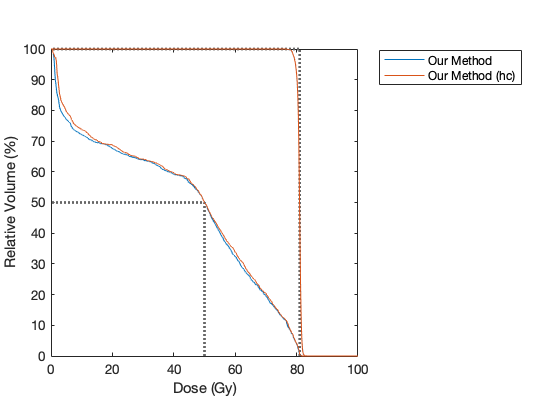

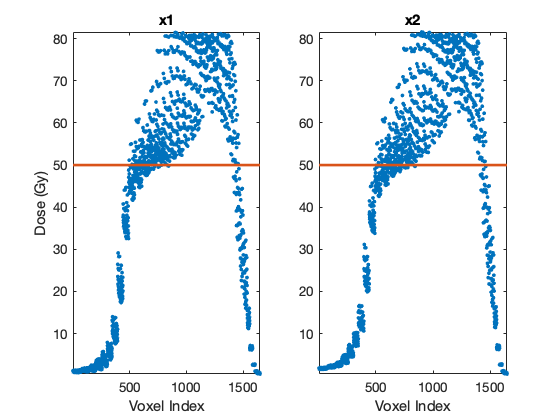

In [25]:
% Create problem instance (OAR initialization)
prostate.terms = {pt1};
rectum.terms = {rt1};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.x0 = 0*prob.x0;
prob.maxIter = 5000;

% Our Method (initialize with zeros)
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 0, obj: 4.3990e+02
iter: 1, obj: 1.1236e+01, wDiff: 2.4693e-01
iter: 2, obj: 8.7951e+00, wDiff: 3.1902e-02
iter: 3, obj: 7.8573e+00, wDiff: 2.1717e-02
iter: 4, obj: 7.3300e+00, wDiff: 1.6810e-02
iter: 5, obj: 6.9798e+00, wDiff: 1.3925e-02
iter: 6, obj: 6.7240e+00, wDiff: 1.2020e-02
iter: 7, obj: 6.5262e+00, wDiff: 1.0625e-02
iter: 8, obj: 6.3683e+00, wDiff: 9.5277e-03
iter: 9, obj: 6.2396e+00, wDiff: 8.6136e-03
iter: 10, obj: 6.1336e+00, wDiff: 7.8334e-03
iter: 11, obj: 6.0448e+00, wDiff: 7.1848e-03
iter: 12, obj: 5.9695e+00, wDiff: 6.6209e-03
iter: 13, obj: 5.9052e+00, wDiff: 6.1292e-03
iter: 14, obj: 5.8497e+00, wDiff: 5.7032e-03
iter: 15, obj: 5.8014e+00, wDiff: 5.3235e-03
iter: 16, obj: 5.7590e+00, wDiff: 4.9874e-03
iter: 17, obj: 5.7216e+00, wDiff: 4.6893e-03
iter: 18, obj: 5.6884e+00, wDiff: 4.4221e-03
iter: 19, obj: 5.6588e+00, wDiff: 4.1828e-03
iter: 20, obj: 5.6322e+00, wDiff: 3.9663e-03
iter: 21, obj: 5.6081e+00, wDiff: 3.7706e-03
iter: 22, obj: 5.5864e+00, wDiff: 3.592

iter: 181, obj: 5.0890e+00, wDiff: 6.9200e-04
iter: 182, obj: 5.0882e+00, wDiff: 6.8562e-04
iter: 183, obj: 5.0874e+00, wDiff: 7.4990e-04
iter: 184, obj: 5.0867e+00, wDiff: 6.8691e-04
iter: 185, obj: 5.0859e+00, wDiff: 7.3349e-04
iter: 186, obj: 5.0851e+00, wDiff: 6.8015e-04
iter: 187, obj: 5.0844e+00, wDiff: 6.7227e-04
iter: 188, obj: 5.0836e+00, wDiff: 7.1079e-04
iter: 189, obj: 5.0829e+00, wDiff: 7.0956e-04
iter: 190, obj: 5.0822e+00, wDiff: 6.6477e-04
iter: 191, obj: 5.0815e+00, wDiff: 6.5521e-04
iter: 192, obj: 5.0808e+00, wDiff: 6.9660e-04
iter: 193, obj: 5.0801e+00, wDiff: 6.9850e-04
iter: 194, obj: 5.0793e+00, wDiff: 6.5033e-04
iter: 195, obj: 5.0787e+00, wDiff: 6.4412e-04
iter: 196, obj: 5.0780e+00, wDiff: 6.3881e-04
iter: 197, obj: 5.0773e+00, wDiff: 6.3396e-04
iter: 198, obj: 5.0767e+00, wDiff: 6.2940e-04
iter: 199, obj: 5.0760e+00, wDiff: 6.8889e-04
iter: 200, obj: 5.0754e+00, wDiff: 6.8659e-04
iter: 201, obj: 5.0747e+00, wDiff: 6.9062e-04
iter: 202, obj: 5.0740e+00, wDiff:

iter: 359, obj: 5.0048e+00, wDiff: 4.1608e-04
iter: 360, obj: 5.0046e+00, wDiff: 4.1484e-04
iter: 361, obj: 5.0043e+00, wDiff: 4.1386e-04
iter: 362, obj: 5.0040e+00, wDiff: 4.1291e-04
iter: 363, obj: 5.0037e+00, wDiff: 4.1199e-04
iter: 364, obj: 5.0034e+00, wDiff: 4.1107e-04
iter: 365, obj: 5.0032e+00, wDiff: 4.1592e-04
iter: 366, obj: 5.0029e+00, wDiff: 4.1053e-04
iter: 367, obj: 5.0026e+00, wDiff: 4.0835e-04
iter: 368, obj: 5.0023e+00, wDiff: 4.0748e-04
iter: 369, obj: 5.0021e+00, wDiff: 4.0663e-04
iter: 370, obj: 5.0018e+00, wDiff: 4.0579e-04
iter: 371, obj: 5.0015e+00, wDiff: 4.0495e-04
iter: 372, obj: 5.0012e+00, wDiff: 4.0412e-04
iter: 373, obj: 5.0010e+00, wDiff: 4.0330e-04
iter: 374, obj: 5.0007e+00, wDiff: 4.0249e-04
iter: 375, obj: 5.0004e+00, wDiff: 4.9171e-04
iter: 376, obj: 5.0002e+00, wDiff: 4.0825e-04
iter: 377, obj: 4.9999e+00, wDiff: 4.0617e-04
iter: 378, obj: 4.9996e+00, wDiff: 4.0457e-04
iter: 379, obj: 4.9994e+00, wDiff: 4.0315e-04
iter: 380, obj: 4.9991e+00, wDiff:

iter: 537, obj: 4.9649e+00, wDiff: 3.1739e-04
iter: 538, obj: 4.9647e+00, wDiff: 3.1693e-04
iter: 539, obj: 4.9646e+00, wDiff: 3.1648e-04
iter: 540, obj: 4.9644e+00, wDiff: 3.1604e-04
iter: 541, obj: 4.9642e+00, wDiff: 3.1559e-04
iter: 542, obj: 4.9641e+00, wDiff: 3.1515e-04
iter: 543, obj: 4.9639e+00, wDiff: 3.1471e-04
iter: 544, obj: 4.9637e+00, wDiff: 3.1427e-04
iter: 545, obj: 4.9636e+00, wDiff: 3.1383e-04
iter: 546, obj: 4.9634e+00, wDiff: 3.1339e-04
iter: 547, obj: 4.9633e+00, wDiff: 3.1296e-04
iter: 548, obj: 4.9631e+00, wDiff: 3.1253e-04
iter: 549, obj: 4.9629e+00, wDiff: 3.1210e-04
iter: 550, obj: 4.9628e+00, wDiff: 3.1167e-04
iter: 551, obj: 4.9626e+00, wDiff: 3.1125e-04
iter: 552, obj: 4.9625e+00, wDiff: 3.1082e-04
iter: 553, obj: 4.9623e+00, wDiff: 3.1040e-04
iter: 554, obj: 4.9621e+00, wDiff: 3.0998e-04
iter: 555, obj: 4.9620e+00, wDiff: 3.0956e-04
iter: 556, obj: 4.9618e+00, wDiff: 3.0914e-04
iter: 557, obj: 4.9617e+00, wDiff: 3.0873e-04
iter: 558, obj: 4.9615e+00, wDiff:

iter: 715, obj: 4.9409e+00, wDiff: 2.5759e-04
iter: 716, obj: 4.9408e+00, wDiff: 2.5731e-04
iter: 717, obj: 4.9406e+00, wDiff: 2.5704e-04
iter: 718, obj: 4.9405e+00, wDiff: 2.5677e-04
iter: 719, obj: 4.9404e+00, wDiff: 2.5650e-04
iter: 720, obj: 4.9403e+00, wDiff: 2.5623e-04
iter: 721, obj: 4.9402e+00, wDiff: 2.5597e-04
iter: 722, obj: 4.9401e+00, wDiff: 2.5570e-04
iter: 723, obj: 4.9400e+00, wDiff: 2.5543e-04
iter: 724, obj: 4.9399e+00, wDiff: 2.5516e-04
iter: 725, obj: 4.9398e+00, wDiff: 2.5490e-04
iter: 726, obj: 4.9397e+00, wDiff: 2.5463e-04
iter: 727, obj: 4.9396e+00, wDiff: 2.5437e-04
iter: 728, obj: 4.9395e+00, wDiff: 2.5410e-04
iter: 729, obj: 4.9394e+00, wDiff: 2.5384e-04
iter: 730, obj: 4.9393e+00, wDiff: 2.5358e-04
iter: 731, obj: 4.9391e+00, wDiff: 2.5331e-04
iter: 732, obj: 4.9390e+00, wDiff: 2.5305e-04
iter: 733, obj: 4.9389e+00, wDiff: 2.5279e-04
iter: 734, obj: 4.9388e+00, wDiff: 2.5253e-04
iter: 735, obj: 4.9387e+00, wDiff: 2.5227e-04
iter: 736, obj: 4.9386e+00, wDiff:

iter: 893, obj: 4.9236e+00, wDiff: 2.2548e-04
iter: 894, obj: 4.9236e+00, wDiff: 2.2435e-04
iter: 895, obj: 4.9235e+00, wDiff: 2.2338e-04
iter: 896, obj: 4.9234e+00, wDiff: 2.2255e-04
iter: 897, obj: 4.9233e+00, wDiff: 2.2181e-04
iter: 898, obj: 4.9232e+00, wDiff: 2.2115e-04
iter: 899, obj: 4.9231e+00, wDiff: 2.2054e-04
iter: 900, obj: 4.9231e+00, wDiff: 2.1998e-04
iter: 901, obj: 4.9230e+00, wDiff: 2.1947e-04
iter: 902, obj: 4.9229e+00, wDiff: 2.1899e-04
iter: 903, obj: 4.9228e+00, wDiff: 2.1853e-04
iter: 904, obj: 4.9228e+00, wDiff: 2.1810e-04
iter: 905, obj: 4.9227e+00, wDiff: 2.1770e-04
iter: 906, obj: 4.9226e+00, wDiff: 2.1731e-04
iter: 907, obj: 4.9225e+00, wDiff: 2.1694e-04
iter: 908, obj: 4.9224e+00, wDiff: 2.1658e-04
iter: 909, obj: 4.9224e+00, wDiff: 2.1623e-04
iter: 910, obj: 4.9223e+00, wDiff: 2.1590e-04
iter: 911, obj: 4.9222e+00, wDiff: 2.1558e-04
iter: 912, obj: 4.9221e+00, wDiff: 2.1526e-04
iter: 913, obj: 4.9221e+00, wDiff: 2.1495e-04
iter: 914, obj: 4.9220e+00, wDiff:

iter: 1070, obj: 4.9117e+00, wDiff: 1.8522e-04
iter: 1071, obj: 4.9116e+00, wDiff: 1.8500e-04
iter: 1072, obj: 4.9116e+00, wDiff: 1.8479e-04
iter: 1073, obj: 4.9115e+00, wDiff: 1.8458e-04
iter: 1074, obj: 4.9115e+00, wDiff: 1.8438e-04
iter: 1075, obj: 4.9114e+00, wDiff: 1.8417e-04
iter: 1076, obj: 4.9114e+00, wDiff: 1.8397e-04
iter: 1077, obj: 4.9113e+00, wDiff: 1.8377e-04
iter: 1078, obj: 4.9113e+00, wDiff: 1.8358e-04
iter: 1079, obj: 4.9112e+00, wDiff: 1.8338e-04
iter: 1080, obj: 4.9111e+00, wDiff: 1.8319e-04
iter: 1081, obj: 4.9111e+00, wDiff: 1.8299e-04
iter: 1082, obj: 4.9110e+00, wDiff: 1.8280e-04
iter: 1083, obj: 4.9110e+00, wDiff: 1.8261e-04
iter: 1084, obj: 4.9109e+00, wDiff: 1.8242e-04
iter: 1085, obj: 4.9109e+00, wDiff: 1.8224e-04
iter: 1086, obj: 4.9108e+00, wDiff: 1.8205e-04
iter: 1087, obj: 4.9108e+00, wDiff: 1.8187e-04
iter: 1088, obj: 4.9107e+00, wDiff: 1.8168e-04
iter: 1089, obj: 4.9107e+00, wDiff: 1.8150e-04
iter: 1090, obj: 4.9106e+00, wDiff: 1.8132e-04
iter: 1091, o

iter: 1244, obj: 4.9032e+00, wDiff: 1.6096e-04
iter: 1245, obj: 4.9032e+00, wDiff: 1.6054e-04
iter: 1246, obj: 4.9031e+00, wDiff: 1.6015e-04
iter: 1247, obj: 4.9031e+00, wDiff: 1.5980e-04
iter: 1248, obj: 4.9031e+00, wDiff: 1.5947e-04
iter: 1249, obj: 4.9030e+00, wDiff: 1.5916e-04
iter: 1250, obj: 4.9030e+00, wDiff: 1.5887e-04
iter: 1251, obj: 4.9029e+00, wDiff: 1.5860e-04
iter: 1252, obj: 4.9029e+00, wDiff: 1.5834e-04
iter: 1253, obj: 4.9029e+00, wDiff: 1.5809e-04
iter: 1254, obj: 4.9028e+00, wDiff: 1.5785e-04
iter: 1255, obj: 4.9028e+00, wDiff: 1.5761e-04
iter: 1256, obj: 4.9027e+00, wDiff: 1.5739e-04
iter: 1257, obj: 4.9027e+00, wDiff: 1.5717e-04
iter: 1258, obj: 4.9027e+00, wDiff: 1.5697e-04
iter: 1259, obj: 4.9026e+00, wDiff: 1.5676e-04
iter: 1260, obj: 4.9026e+00, wDiff: 1.5657e-04
iter: 1261, obj: 4.9025e+00, wDiff: 1.5637e-04
iter: 1262, obj: 4.9025e+00, wDiff: 1.5618e-04
iter: 1263, obj: 4.9025e+00, wDiff: 1.5600e-04
iter: 1264, obj: 4.9024e+00, wDiff: 1.5581e-04
iter: 1265, o

iter: 1418, obj: 4.8970e+00, wDiff: 1.3575e-04
iter: 1419, obj: 4.8970e+00, wDiff: 1.3562e-04
iter: 1420, obj: 4.8970e+00, wDiff: 1.3550e-04
iter: 1421, obj: 4.8969e+00, wDiff: 1.3537e-04
iter: 1422, obj: 4.8969e+00, wDiff: 1.3525e-04
iter: 1423, obj: 4.8969e+00, wDiff: 1.3512e-04
iter: 1424, obj: 4.8968e+00, wDiff: 1.3500e-04
iter: 1425, obj: 4.8968e+00, wDiff: 1.3487e-04
iter: 1426, obj: 4.8968e+00, wDiff: 1.3475e-04
iter: 1427, obj: 4.8968e+00, wDiff: 1.3462e-04
iter: 1428, obj: 4.8967e+00, wDiff: 1.3450e-04
iter: 1429, obj: 4.8967e+00, wDiff: 1.3438e-04
iter: 1430, obj: 4.8967e+00, wDiff: 1.3426e-04
iter: 1431, obj: 4.8966e+00, wDiff: 1.3413e-04
iter: 1432, obj: 4.8966e+00, wDiff: 1.3401e-04
iter: 1433, obj: 4.8966e+00, wDiff: 1.3389e-04
iter: 1434, obj: 4.8965e+00, wDiff: 1.3377e-04
iter: 1435, obj: 4.8965e+00, wDiff: 1.3365e-04
iter: 1436, obj: 4.8965e+00, wDiff: 1.3353e-04
iter: 1437, obj: 4.8965e+00, wDiff: 1.3341e-04
iter: 1438, obj: 4.8964e+00, wDiff: 1.3329e-04
iter: 1439, o

iter: 1592, obj: 4.8925e+00, wDiff: 1.1634e-04
iter: 1593, obj: 4.8925e+00, wDiff: 1.1624e-04
iter: 1594, obj: 4.8924e+00, wDiff: 1.1614e-04
iter: 1595, obj: 4.8924e+00, wDiff: 1.1604e-04
iter: 1596, obj: 4.8924e+00, wDiff: 1.1594e-04
iter: 1597, obj: 4.8924e+00, wDiff: 1.1583e-04
iter: 1598, obj: 4.8923e+00, wDiff: 1.1573e-04
iter: 1599, obj: 4.8923e+00, wDiff: 1.1563e-04
iter: 1600, obj: 4.8923e+00, wDiff: 1.1553e-04
iter: 1601, obj: 4.8923e+00, wDiff: 1.1543e-04
iter: 1602, obj: 4.8923e+00, wDiff: 1.1533e-04
iter: 1603, obj: 4.8922e+00, wDiff: 1.1523e-04
iter: 1604, obj: 4.8922e+00, wDiff: 1.1512e-04
iter: 1605, obj: 4.8922e+00, wDiff: 1.1502e-04
iter: 1606, obj: 4.8922e+00, wDiff: 1.1492e-04
iter: 1607, obj: 4.8922e+00, wDiff: 1.1482e-04
iter: 1608, obj: 4.8921e+00, wDiff: 1.1472e-04
iter: 1609, obj: 4.8921e+00, wDiff: 1.1462e-04
iter: 1610, obj: 4.8921e+00, wDiff: 1.1452e-04
iter: 1611, obj: 4.8921e+00, wDiff: 1.1442e-04
iter: 1612, obj: 4.8920e+00, wDiff: 1.1432e-04
iter: 1613, o

iter: 1766, obj: 4.8890e+00, wDiff: 1.0211e-04
iter: 1767, obj: 4.8890e+00, wDiff: 1.0197e-04
iter: 1768, obj: 4.8890e+00, wDiff: 1.0183e-04
iter: 1769, obj: 4.8890e+00, wDiff: 1.0169e-04
iter: 1770, obj: 4.8889e+00, wDiff: 1.0156e-04
iter: 1771, obj: 4.8889e+00, wDiff: 1.0143e-04
iter: 1772, obj: 4.8889e+00, wDiff: 1.0130e-04
iter: 1773, obj: 4.8889e+00, wDiff: 1.0117e-04
iter: 1774, obj: 4.8889e+00, wDiff: 1.0104e-04
iter: 1775, obj: 4.8889e+00, wDiff: 1.0092e-04
iter: 1776, obj: 4.8888e+00, wDiff: 1.0079e-04
iter: 1777, obj: 4.8888e+00, wDiff: 1.0067e-04
iter: 1778, obj: 4.8888e+00, wDiff: 1.0055e-04
iter: 1779, obj: 4.8888e+00, wDiff: 1.0043e-04
iter: 1780, obj: 4.8888e+00, wDiff: 1.0031e-04
iter: 1781, obj: 4.8888e+00, wDiff: 1.0019e-04
iter: 1782, obj: 4.8887e+00, wDiff: 3.2502e-04
iter: 1783, obj: 4.8887e+00, wDiff: 1.2377e-04
iter: 1784, obj: 4.8887e+00, wDiff: 1.1529e-04
iter: 1785, obj: 4.8887e+00, wDiff: 1.1121e-04
iter: 1786, obj: 4.8887e+00, wDiff: 1.0858e-04
iter: 1787, o

iter: 1940, obj: 4.8864e+00, wDiff: 8.6114e-05
iter: 1941, obj: 4.8864e+00, wDiff: 8.6032e-05
iter: 1942, obj: 4.8864e+00, wDiff: 8.5951e-05
iter: 1943, obj: 4.8864e+00, wDiff: 8.5869e-05
iter: 1944, obj: 4.8864e+00, wDiff: 8.5787e-05
iter: 1945, obj: 4.8864e+00, wDiff: 8.5706e-05
iter: 1946, obj: 4.8864e+00, wDiff: 8.5625e-05
iter: 1947, obj: 4.8864e+00, wDiff: 8.5544e-05
iter: 1948, obj: 4.8863e+00, wDiff: 8.5462e-05
iter: 1949, obj: 4.8863e+00, wDiff: 8.5382e-05
iter: 1950, obj: 4.8863e+00, wDiff: 8.5302e-05
iter: 1951, obj: 4.8863e+00, wDiff: 8.5222e-05
iter: 1952, obj: 4.8863e+00, wDiff: 8.5143e-05
iter: 1953, obj: 4.8863e+00, wDiff: 8.5064e-05
iter: 1954, obj: 4.8863e+00, wDiff: 8.4985e-05
iter: 1955, obj: 4.8863e+00, wDiff: 8.4906e-05
iter: 1956, obj: 4.8862e+00, wDiff: 8.4827e-05
iter: 1957, obj: 4.8862e+00, wDiff: 8.4748e-05
iter: 1958, obj: 4.8862e+00, wDiff: 8.4670e-05
iter: 1959, obj: 4.8862e+00, wDiff: 8.4591e-05
iter: 1960, obj: 4.8862e+00, wDiff: 8.4513e-05
iter: 1961, o

iter: 2114, obj: 4.8846e+00, wDiff: 7.3495e-05
iter: 2115, obj: 4.8846e+00, wDiff: 7.3431e-05
iter: 2116, obj: 4.8846e+00, wDiff: 7.3366e-05
iter: 2117, obj: 4.8846e+00, wDiff: 7.3301e-05
iter: 2118, obj: 4.8846e+00, wDiff: 7.3237e-05
iter: 2119, obj: 4.8846e+00, wDiff: 7.3172e-05
iter: 2120, obj: 4.8846e+00, wDiff: 7.3107e-05
iter: 2121, obj: 4.8846e+00, wDiff: 7.3043e-05
iter: 2122, obj: 4.8846e+00, wDiff: 7.2979e-05
iter: 2123, obj: 4.8845e+00, wDiff: 7.2914e-05
iter: 2124, obj: 4.8845e+00, wDiff: 7.2850e-05
iter: 2125, obj: 4.8845e+00, wDiff: 7.2786e-05
iter: 2126, obj: 4.8845e+00, wDiff: 7.2722e-05
iter: 2127, obj: 4.8845e+00, wDiff: 7.2658e-05
iter: 2128, obj: 4.8845e+00, wDiff: 7.2594e-05
iter: 2129, obj: 4.8845e+00, wDiff: 7.2530e-05
iter: 2130, obj: 4.8845e+00, wDiff: 7.2466e-05
iter: 2131, obj: 4.8845e+00, wDiff: 7.2402e-05
iter: 2132, obj: 4.8845e+00, wDiff: 7.2339e-05
iter: 2133, obj: 4.8845e+00, wDiff: 7.2275e-05
iter: 2134, obj: 4.8844e+00, wDiff: 7.2212e-05
iter: 2135, o

iter: 2288, obj: 4.8833e+00, wDiff: 6.3102e-05
iter: 2289, obj: 4.8833e+00, wDiff: 6.3047e-05
iter: 2290, obj: 4.8833e+00, wDiff: 6.2992e-05
iter: 2291, obj: 4.8833e+00, wDiff: 6.2938e-05
iter: 2292, obj: 4.8833e+00, wDiff: 6.2883e-05
iter: 2293, obj: 4.8833e+00, wDiff: 6.2828e-05
iter: 2294, obj: 4.8832e+00, wDiff: 6.2773e-05
iter: 2295, obj: 4.8832e+00, wDiff: 6.2719e-05
iter: 2296, obj: 4.8832e+00, wDiff: 6.2664e-05
iter: 2297, obj: 4.8832e+00, wDiff: 6.2609e-05
iter: 2298, obj: 4.8832e+00, wDiff: 6.2555e-05
iter: 2299, obj: 4.8832e+00, wDiff: 6.2500e-05
iter: 2300, obj: 4.8832e+00, wDiff: 6.2446e-05
iter: 2301, obj: 4.8832e+00, wDiff: 6.2392e-05
iter: 2302, obj: 4.8832e+00, wDiff: 6.2337e-05
iter: 2303, obj: 4.8832e+00, wDiff: 6.2283e-05
iter: 2304, obj: 4.8832e+00, wDiff: 6.2229e-05
iter: 2305, obj: 4.8832e+00, wDiff: 6.2174e-05
iter: 2306, obj: 4.8832e+00, wDiff: 6.2120e-05
iter: 2307, obj: 4.8832e+00, wDiff: 6.2066e-05
iter: 2308, obj: 4.8832e+00, wDiff: 6.2012e-05
iter: 2309, o

iter: 2462, obj: 4.8823e+00, wDiff: 5.4240e-05
iter: 2463, obj: 4.8823e+00, wDiff: 5.4193e-05
iter: 2464, obj: 4.8823e+00, wDiff: 5.4146e-05
iter: 2465, obj: 4.8823e+00, wDiff: 5.4099e-05
iter: 2466, obj: 4.8823e+00, wDiff: 5.4052e-05
iter: 2467, obj: 4.8823e+00, wDiff: 5.4005e-05
iter: 2468, obj: 4.8823e+00, wDiff: 5.3958e-05
iter: 2469, obj: 4.8823e+00, wDiff: 5.3911e-05
iter: 2470, obj: 4.8823e+00, wDiff: 5.3864e-05
iter: 2471, obj: 4.8823e+00, wDiff: 5.3817e-05
iter: 2472, obj: 4.8823e+00, wDiff: 5.3771e-05
iter: 2473, obj: 4.8822e+00, wDiff: 5.3724e-05
iter: 2474, obj: 4.8822e+00, wDiff: 5.3677e-05
iter: 2475, obj: 4.8822e+00, wDiff: 5.3631e-05
iter: 2476, obj: 4.8822e+00, wDiff: 5.3584e-05
iter: 2477, obj: 4.8822e+00, wDiff: 5.3538e-05
iter: 2478, obj: 4.8822e+00, wDiff: 5.3491e-05
iter: 2479, obj: 4.8822e+00, wDiff: 5.3445e-05
iter: 2480, obj: 4.8822e+00, wDiff: 5.3398e-05
iter: 2481, obj: 4.8822e+00, wDiff: 5.3352e-05
iter: 2482, obj: 4.8822e+00, wDiff: 5.3306e-05
iter: 2483, o

iter: 2636, obj: 4.8811e+00, wDiff: 5.1767e-05
iter: 2637, obj: 4.8811e+00, wDiff: 5.1501e-05
iter: 2638, obj: 4.8811e+00, wDiff: 5.1255e-05
iter: 2639, obj: 4.8811e+00, wDiff: 5.1026e-05
iter: 2640, obj: 4.8811e+00, wDiff: 5.0813e-05
iter: 2641, obj: 4.8811e+00, wDiff: 5.0613e-05
iter: 2642, obj: 4.8811e+00, wDiff: 5.0424e-05
iter: 2643, obj: 4.8811e+00, wDiff: 5.0246e-05
iter: 2644, obj: 4.8811e+00, wDiff: 5.0077e-05
iter: 2645, obj: 4.8811e+00, wDiff: 4.9917e-05

Our Method
Time: 377.54
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.36 | 0.65 | 54.72
Structure: Rectum
* udvc | 51.21 | 4315.56

Our Method (hc)
Time: 5.10
Structure: PTV_68
* unif | 75.99 | 80.88 | 80.96 | 79.65 | 83.43 | 0.66 | 54.86
Structure: Rectum
* udvc | 49.45 | 4205.17


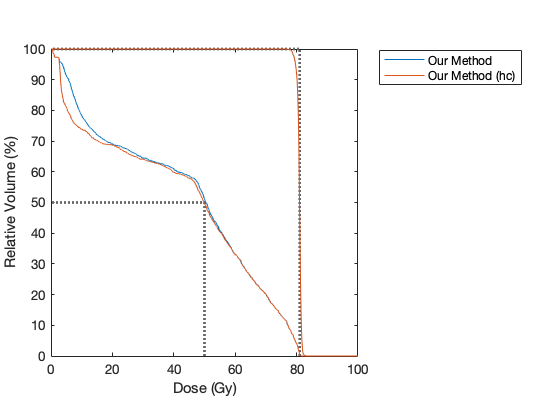

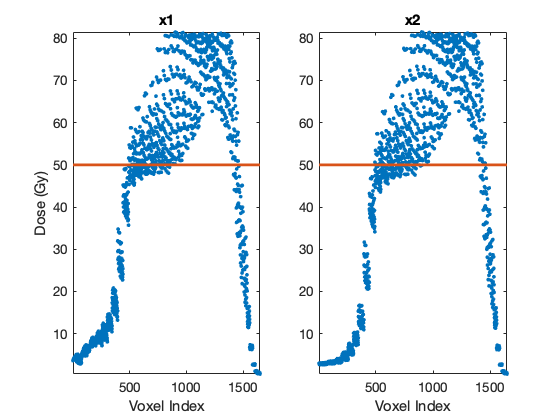

In [40]:
% Create problem instance (Zhang initialization)
prostate.terms = {pt1};
rectum.terms = {rt1};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.maxIter = 50000;

% Our Method
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 1, obj: 4.8733e+00, uDiff: 2.3935e-13

Zhang Method
Time: 
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 56.80 | 4333.84

Zhang Method (hc)
Time: 5.34
Structure: PTV_68
* unif | 75.83 | 80.88 | 80.96 | 79.64 | 83.55 | 0.66 | 55.48
Structure: Rectum
* udvc | 49.51 | 4155.44


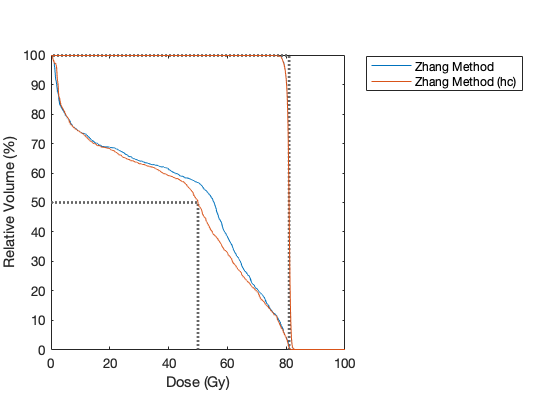

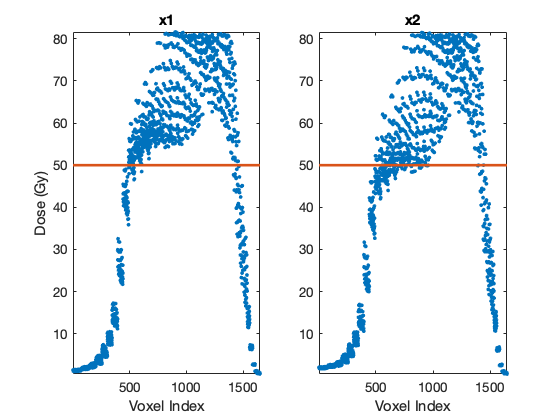

In [32]:
% Equivalent to constraint generation

% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt1};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Zhang Method (initialize with PTV solution)
prob.slackDose(); 
x1a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Zhang Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Zhang Method','Zhang Method (hc)'}) 

Time
* Our Method (PTV): **26.60**
* Our Method (mid): 377.54
* Our Method (OAR): 464.94
* Zhang Method (mid): 385.35
* Our Method (PTV, hc): 7.54
* Our Method (mid, hc): **5.10**
* Our Method (OAR, hc): 7.93
* Zhang Mehhod (mid, hc): 5.50

Structure: PTV_68

Method | Min | Something | Something | Something | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Our Method (PTV) | 76.00 | 80.88 | 80.96 | 79.66 | 83.47 | 0.65 | **54.69**
Our Method (mid) | 76.00 | 80.88 | 80.96 | 79.65 | 83.36 | 0.65 | 54.72
Our Method (OAR) | 75.99 | 80.88 | 80.96 | 79.63 | 83.46 | 0.66 | 55.40
Zhang Method (mid) | 75.99 | 80.88 | 80.96 | 79.63 | 83.40 | 0.66 | 55.24
Our Method (PTV, hc) | 76.01 | 80.88 | 80.96 | 79.65 | 83.49 | 0.66 | 54.99
Our Method (mid, hc) | 75.99 | 80.88 | 80.96 | 79.65 | 83.43 | 0.66 | **54.86**
Our Method (OAR, hc) | 76.00 | 80.88 | 80.96 | 79.65 | 83.40 | 0.66 | 54.94
Zhang Method (mid, hc) | 76.01 | 80.88 | 80.96 | 79.65 | 83.40 | 0.66 | 54.99


Structure: Rectum

Method | % > 50 | Area
-|-|-
Our Method (PTV) | 51.52 | 4218.64
Our Method (mid) | 51.21 | 4315.56
Our Method (OAR) | 50.24 | **4119.59**
Zhang Method (mid) | 51.21 | 4156.60
Our Method (PTV, hc) | 50.00 | 4190.45
Our Method (mid, hc) | 49.45 | 4205.17
Our Method (OAR, hc) | 49.76 | 4194.69
Zhang Method (mid, hc) | 49.94 | **4177.65**


Our Method
Time: 50.74
Structure: PTV_68
* unif | 72.58 | 80.84 | 80.95 | 79.18 | 84.67 | 0.93 | 77.20
Structure: Rectum
* udvc | 33.37 | 2789.18

Our Method (hc)
Time: 7.53
Structure: PTV_68
* unif | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | 80.64
Structure: Rectum
* udvc | 29.98 | 2624.35

Zhang Method
Time: 73.77
Structure: PTV_68
* unif | 71.10 | 80.83 | 80.93 | 78.82 | 85.43 | 1.18 | 97.74
Structure: Rectum
* udvc | 34.65 | 2582.36

Zhang Method (hc)Time: 8.59
Structure: PTV_68
* unif | 71.30 | 80.82 | 80.93 | 78.75 | 85.73 | 1.22 | 101.74
Structure: Rectum
* udvc | 29.98 | 2441.54


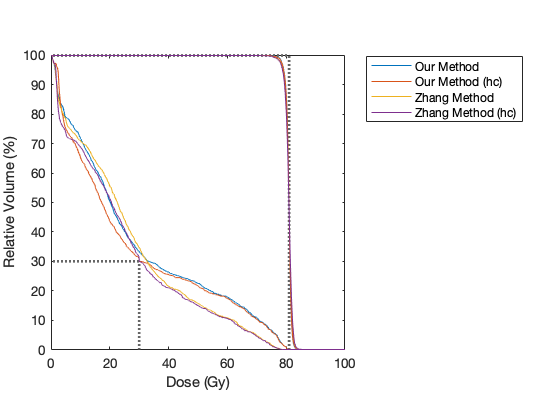

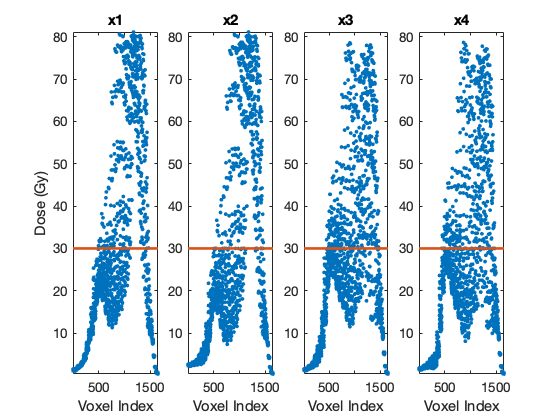

In [8]:
% Example 4.1(b)

% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt2};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Our Method
prob.calcBeams(false); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Zhang Method
prob.slackDose(false); 
x2a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x2a);

% Zhang Method (hc)
prob.constGen(x2a); 
x2b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('Time: %.2f\n',prob.time);
prob.printStats(x2b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b,x2a,x2b])
prob.compareDVH([x1a,x1b,x2a,x2b],{'Our Method','Our Method (hc)','Zhang Method','Zhang Method (hc)'}) 

iter: 0, obj: 3.2805e+03
iter: 1, obj: 4.0880e+01, wDiff: 1.7164e-01
iter: 2, obj: 2.6546e+01, wDiff: 7.8390e-02
iter: 3, obj: 2.0728e+01, wDiff: 5.4160e-02
iter: 4, obj: 1.7519e+01, wDiff: 4.1242e-02
iter: 5, obj: 1.5448e+01, wDiff: 3.3752e-02
iter: 6, obj: 1.3977e+01, wDiff: 2.8705e-02
iter: 7, obj: 1.2869e+01, wDiff: 2.5078e-02
iter: 8, obj: 1.2002e+01, wDiff: 2.2257e-02
iter: 9, obj: 1.1306e+01, wDiff: 2.0027e-02
iter: 10, obj: 1.0733e+01, wDiff: 1.8203e-02
iter: 11, obj: 1.0255e+01, wDiff: 1.6641e-02
iter: 12, obj: 9.8536e+00, wDiff: 1.5279e-02
iter: 13, obj: 9.5132e+00, wDiff: 1.4077e-02
iter: 14, obj: 9.2226e+00, wDiff: 1.3022e-02
iter: 15, obj: 8.9715e+00, wDiff: 1.2126e-02
iter: 16, obj: 8.7516e+00, wDiff: 1.1368e-02
iter: 17, obj: 8.5571e+00, wDiff: 1.0702e-02
iter: 18, obj: 8.3837e+00, wDiff: 1.0117e-02
iter: 19, obj: 8.2275e+00, wDiff: 9.6099e-03
iter: 20, obj: 8.0861e+00, wDiff: 9.1510e-03
iter: 21, obj: 7.9575e+00, wDiff: 8.7285e-03
iter: 22, obj: 7.8402e+00, wDiff: 8.343

iter: 181, obj: 5.6014e+00, wDiff: 5.2971e-04
iter: 182, obj: 5.6010e+00, wDiff: 5.0146e-04
iter: 183, obj: 5.6006e+00, wDiff: 4.7977e-04
iter: 184, obj: 5.6003e+00, wDiff: 4.6215e-04
iter: 185, obj: 5.5999e+00, wDiff: 4.4729e-04
iter: 186, obj: 5.5996e+00, wDiff: 4.3433e-04
iter: 187, obj: 5.5993e+00, wDiff: 4.2277e-04
iter: 188, obj: 5.5990e+00, wDiff: 4.1225e-04
iter: 189, obj: 5.5988e+00, wDiff: 4.0256e-04
iter: 190, obj: 5.5985e+00, wDiff: 3.9354e-04
iter: 191, obj: 5.5983e+00, wDiff: 3.8507e-04
iter: 192, obj: 5.5980e+00, wDiff: 3.7708e-04
iter: 193, obj: 5.5978e+00, wDiff: 3.6948e-04
iter: 194, obj: 5.5976e+00, wDiff: 3.6225e-04
iter: 195, obj: 5.5974e+00, wDiff: 3.5534e-04
iter: 196, obj: 5.5972e+00, wDiff: 3.4874e-04
iter: 197, obj: 5.5970e+00, wDiff: 3.4243e-04
iter: 198, obj: 5.5968e+00, wDiff: 3.3637e-04
iter: 199, obj: 5.5966e+00, wDiff: 3.3055e-04
iter: 200, obj: 5.5964e+00, wDiff: 3.2503e-04
iter: 201, obj: 5.5963e+00, wDiff: 3.1980e-04
iter: 202, obj: 5.5961e+00, wDiff:

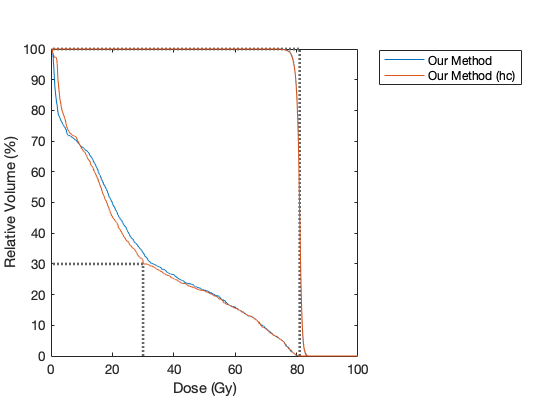

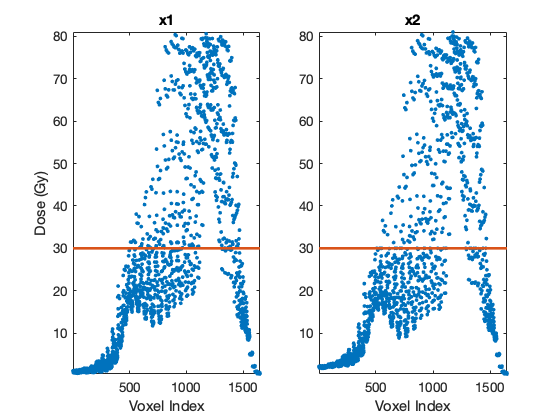

In [26]:
% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt2};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.x0 = 0*prob.x0;
prob.maxIter = 5000;

% Our Method (initialize with zeros)
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 0, obj: 5.0667e+02
iter: 1, obj: 1.7584e+01, wDiff: 1.6954e-01
iter: 2, obj: 1.3220e+01, wDiff: 4.4022e-02
iter: 3, obj: 1.1378e+01, wDiff: 3.1003e-02
iter: 4, obj: 1.0290e+01, wDiff: 2.4568e-02
iter: 5, obj: 9.5431e+00, wDiff: 2.0499e-02
iter: 6, obj: 9.0041e+00, wDiff: 1.7915e-02
iter: 7, obj: 8.5851e+00, wDiff: 1.5876e-02
iter: 8, obj: 8.2458e+00, wDiff: 1.4291e-02
iter: 9, obj: 7.9680e+00, wDiff: 1.3115e-02
iter: 10, obj: 7.7347e+00, wDiff: 1.2425e-02
iter: 11, obj: 7.5317e+00, wDiff: 1.1161e-02
iter: 12, obj: 7.3602e+00, wDiff: 1.0533e-02
iter: 13, obj: 7.2139e+00, wDiff: 9.7984e-03
iter: 14, obj: 7.0876e+00, wDiff: 9.3850e-03
iter: 15, obj: 6.9750e+00, wDiff: 8.7180e-03
iter: 16, obj: 6.8762e+00, wDiff: 8.1830e-03
iter: 17, obj: 6.7901e+00, wDiff: 7.2200e-03
iter: 18, obj: 6.7181e+00, wDiff: 7.3937e-03
iter: 19, obj: 6.6544e+00, wDiff: 6.8600e-03
iter: 20, obj: 6.5968e+00, wDiff: 6.4079e-03
iter: 21, obj: 6.5446e+00, wDiff: 6.0661e-03
iter: 22, obj: 6.4978e+00, wDiff: 6.400

iter: 181, obj: 5.7104e+00, wDiff: 4.0363e-04
iter: 182, obj: 5.7101e+00, wDiff: 3.9940e-04
iter: 183, obj: 5.7099e+00, wDiff: 3.9497e-04
iter: 184, obj: 5.7096e+00, wDiff: 3.9091e-04
iter: 185, obj: 5.7094e+00, wDiff: 3.8701e-04
iter: 186, obj: 5.7091e+00, wDiff: 3.8323e-04
iter: 187, obj: 5.7089e+00, wDiff: 3.7957e-04
iter: 188, obj: 5.7087e+00, wDiff: 3.7601e-04
iter: 189, obj: 5.7084e+00, wDiff: 3.7257e-04
iter: 190, obj: 5.7082e+00, wDiff: 3.6885e-04
iter: 191, obj: 5.7080e+00, wDiff: 3.6595e-04
iter: 192, obj: 5.7078e+00, wDiff: 3.6278e-04
iter: 193, obj: 5.7076e+00, wDiff: 3.5969e-04
iter: 194, obj: 5.7074e+00, wDiff: 3.5670e-04
iter: 195, obj: 5.7071e+00, wDiff: 3.5379e-04
iter: 196, obj: 5.7069e+00, wDiff: 3.5096e-04
iter: 197, obj: 5.7067e+00, wDiff: 3.4821e-04
iter: 198, obj: 5.7065e+00, wDiff: 3.4553e-04
iter: 199, obj: 5.7063e+00, wDiff: 3.4292e-04
iter: 200, obj: 5.7062e+00, wDiff: 3.4039e-04
iter: 201, obj: 5.7060e+00, wDiff: 3.3792e-04
iter: 202, obj: 5.7058e+00, wDiff:

iter: 359, obj: 5.6887e+00, wDiff: 2.1357e-04
iter: 360, obj: 5.6887e+00, wDiff: 2.1322e-04
iter: 361, obj: 5.6886e+00, wDiff: 2.1288e-04
iter: 362, obj: 5.6885e+00, wDiff: 2.1253e-04
iter: 363, obj: 5.6884e+00, wDiff: 2.1219e-04
iter: 364, obj: 5.6884e+00, wDiff: 2.1185e-04
iter: 365, obj: 5.6883e+00, wDiff: 2.1151e-04
iter: 366, obj: 5.6882e+00, wDiff: 2.1117e-04
iter: 367, obj: 5.6881e+00, wDiff: 2.1084e-04
iter: 368, obj: 5.6881e+00, wDiff: 2.1050e-04
iter: 369, obj: 5.6880e+00, wDiff: 2.1017e-04
iter: 370, obj: 5.6879e+00, wDiff: 2.0984e-04
iter: 371, obj: 5.6878e+00, wDiff: 2.0950e-04
iter: 372, obj: 5.6878e+00, wDiff: 2.0917e-04
iter: 373, obj: 5.6877e+00, wDiff: 2.0885e-04
iter: 374, obj: 5.6876e+00, wDiff: 2.0852e-04
iter: 375, obj: 5.6876e+00, wDiff: 2.0819e-04
iter: 376, obj: 5.6875e+00, wDiff: 2.0787e-04
iter: 377, obj: 5.6874e+00, wDiff: 2.0754e-04
iter: 378, obj: 5.6873e+00, wDiff: 2.0722e-04
iter: 379, obj: 5.6873e+00, wDiff: 2.0690e-04
iter: 380, obj: 5.6872e+00, wDiff:

iter: 537, obj: 5.6686e+00, wDiff: 1.7711e-04
iter: 538, obj: 5.6686e+00, wDiff: 1.7661e-04
iter: 539, obj: 5.6685e+00, wDiff: 1.7614e-04
iter: 540, obj: 5.6685e+00, wDiff: 1.7568e-04
iter: 541, obj: 5.6684e+00, wDiff: 1.7523e-04
iter: 542, obj: 5.6684e+00, wDiff: 1.7480e-04
iter: 543, obj: 5.6683e+00, wDiff: 1.7439e-04
iter: 544, obj: 5.6683e+00, wDiff: 1.7398e-04
iter: 545, obj: 5.6682e+00, wDiff: 1.7359e-04
iter: 546, obj: 5.6682e+00, wDiff: 1.7321e-04
iter: 547, obj: 5.6681e+00, wDiff: 1.7284e-04
iter: 548, obj: 5.6681e+00, wDiff: 1.7248e-04
iter: 549, obj: 5.6680e+00, wDiff: 1.7213e-04
iter: 550, obj: 5.6680e+00, wDiff: 1.7179e-04
iter: 551, obj: 5.6679e+00, wDiff: 1.7145e-04
iter: 552, obj: 5.6679e+00, wDiff: 1.7112e-04
iter: 553, obj: 5.6678e+00, wDiff: 1.7080e-04
iter: 554, obj: 5.6678e+00, wDiff: 1.7049e-04
iter: 555, obj: 5.6677e+00, wDiff: 1.7018e-04
iter: 556, obj: 5.6677e+00, wDiff: 1.6988e-04
iter: 557, obj: 5.6676e+00, wDiff: 1.6959e-04
iter: 558, obj: 5.6676e+00, wDiff:

iter: 715, obj: 5.6614e+00, wDiff: 1.4204e-04
iter: 716, obj: 5.6614e+00, wDiff: 1.4190e-04
iter: 717, obj: 5.6614e+00, wDiff: 1.4176e-04
iter: 718, obj: 5.6613e+00, wDiff: 1.4163e-04
iter: 719, obj: 5.6613e+00, wDiff: 1.4149e-04
iter: 720, obj: 5.6613e+00, wDiff: 1.4135e-04
iter: 721, obj: 5.6612e+00, wDiff: 1.4121e-04
iter: 722, obj: 5.6612e+00, wDiff: 1.4108e-04
iter: 723, obj: 5.6612e+00, wDiff: 1.4094e-04
iter: 724, obj: 5.6611e+00, wDiff: 1.4081e-04
iter: 725, obj: 5.6611e+00, wDiff: 1.4067e-04
iter: 726, obj: 5.6611e+00, wDiff: 1.4053e-04
iter: 727, obj: 5.6610e+00, wDiff: 1.4040e-04
iter: 728, obj: 5.6610e+00, wDiff: 1.4026e-04
iter: 729, obj: 5.6610e+00, wDiff: 1.4013e-04
iter: 730, obj: 5.6609e+00, wDiff: 1.3999e-04
iter: 731, obj: 5.6609e+00, wDiff: 1.3986e-04
iter: 732, obj: 5.6609e+00, wDiff: 1.3973e-04
iter: 733, obj: 5.6608e+00, wDiff: 1.3959e-04
iter: 734, obj: 5.6608e+00, wDiff: 1.3946e-04
iter: 735, obj: 5.6608e+00, wDiff: 1.3932e-04
iter: 736, obj: 5.6607e+00, wDiff:

iter: 893, obj: 5.6564e+00, wDiff: 1.2032e-04
iter: 894, obj: 5.6564e+00, wDiff: 1.2022e-04
iter: 895, obj: 5.6563e+00, wDiff: 1.2011e-04
iter: 896, obj: 5.6563e+00, wDiff: 1.2000e-04
iter: 897, obj: 5.6563e+00, wDiff: 1.1989e-04
iter: 898, obj: 5.6563e+00, wDiff: 1.1978e-04
iter: 899, obj: 5.6563e+00, wDiff: 1.1967e-04
iter: 900, obj: 5.6562e+00, wDiff: 1.1956e-04
iter: 901, obj: 5.6562e+00, wDiff: 1.1945e-04
iter: 902, obj: 5.6562e+00, wDiff: 1.1935e-04
iter: 903, obj: 5.6562e+00, wDiff: 1.1924e-04
iter: 904, obj: 5.6561e+00, wDiff: 1.1913e-04
iter: 905, obj: 5.6561e+00, wDiff: 1.1902e-04
iter: 906, obj: 5.6561e+00, wDiff: 1.1891e-04
iter: 907, obj: 5.6561e+00, wDiff: 1.1881e-04
iter: 908, obj: 5.6560e+00, wDiff: 1.1870e-04
iter: 909, obj: 5.6560e+00, wDiff: 1.1859e-04
iter: 910, obj: 5.6560e+00, wDiff: 1.1849e-04
iter: 911, obj: 5.6560e+00, wDiff: 1.1838e-04
iter: 912, obj: 5.6560e+00, wDiff: 1.1827e-04
iter: 913, obj: 5.6559e+00, wDiff: 1.1816e-04
iter: 914, obj: 5.6559e+00, wDiff:

iter: 1070, obj: 5.6528e+00, wDiff: 1.0266e-04
iter: 1071, obj: 5.6528e+00, wDiff: 1.0257e-04
iter: 1072, obj: 5.6527e+00, wDiff: 1.0248e-04
iter: 1073, obj: 5.6527e+00, wDiff: 1.0238e-04
iter: 1074, obj: 5.6527e+00, wDiff: 1.0229e-04
iter: 1075, obj: 5.6527e+00, wDiff: 1.0220e-04
iter: 1076, obj: 5.6527e+00, wDiff: 1.0211e-04
iter: 1077, obj: 5.6527e+00, wDiff: 1.0202e-04
iter: 1078, obj: 5.6526e+00, wDiff: 1.0193e-04
iter: 1079, obj: 5.6526e+00, wDiff: 1.0184e-04
iter: 1080, obj: 5.6526e+00, wDiff: 1.0175e-04
iter: 1081, obj: 5.6526e+00, wDiff: 1.0166e-04
iter: 1082, obj: 5.6526e+00, wDiff: 1.0157e-04
iter: 1083, obj: 5.6526e+00, wDiff: 1.0148e-04
iter: 1084, obj: 5.6525e+00, wDiff: 1.0139e-04
iter: 1085, obj: 5.6525e+00, wDiff: 1.0130e-04
iter: 1086, obj: 5.6525e+00, wDiff: 1.0121e-04
iter: 1087, obj: 5.6525e+00, wDiff: 1.0112e-04
iter: 1088, obj: 5.6525e+00, wDiff: 1.0103e-04
iter: 1089, obj: 5.6525e+00, wDiff: 1.0094e-04
iter: 1090, obj: 5.6524e+00, wDiff: 1.0085e-04
iter: 1091, o

iter: 1244, obj: 5.6502e+00, wDiff: 8.7997e-05
iter: 1245, obj: 5.6502e+00, wDiff: 8.7919e-05
iter: 1246, obj: 5.6502e+00, wDiff: 8.7841e-05
iter: 1247, obj: 5.6501e+00, wDiff: 8.7764e-05
iter: 1248, obj: 5.6501e+00, wDiff: 8.7686e-05
iter: 1249, obj: 5.6501e+00, wDiff: 8.7609e-05
iter: 1250, obj: 5.6501e+00, wDiff: 8.7532e-05
iter: 1251, obj: 5.6501e+00, wDiff: 8.7455e-05
iter: 1252, obj: 5.6501e+00, wDiff: 8.7377e-05
iter: 1253, obj: 5.6501e+00, wDiff: 8.7300e-05
iter: 1254, obj: 5.6501e+00, wDiff: 8.7223e-05
iter: 1255, obj: 5.6500e+00, wDiff: 8.7146e-05
iter: 1256, obj: 5.6500e+00, wDiff: 8.7069e-05
iter: 1257, obj: 5.6500e+00, wDiff: 8.6993e-05
iter: 1258, obj: 5.6500e+00, wDiff: 8.6916e-05
iter: 1259, obj: 5.6500e+00, wDiff: 8.6839e-05
iter: 1260, obj: 5.6500e+00, wDiff: 8.6763e-05
iter: 1261, obj: 5.6500e+00, wDiff: 8.6686e-05
iter: 1262, obj: 5.6500e+00, wDiff: 8.6610e-05
iter: 1263, obj: 5.6499e+00, wDiff: 8.6533e-05
iter: 1264, obj: 5.6499e+00, wDiff: 8.6457e-05
iter: 1265, o

iter: 1418, obj: 5.6483e+00, wDiff: 7.5489e-05
iter: 1419, obj: 5.6483e+00, wDiff: 7.5423e-05
iter: 1420, obj: 5.6483e+00, wDiff: 7.5357e-05
iter: 1421, obj: 5.6482e+00, wDiff: 7.5290e-05
iter: 1422, obj: 5.6482e+00, wDiff: 7.5224e-05
iter: 1423, obj: 5.6482e+00, wDiff: 7.5158e-05
iter: 1424, obj: 5.6482e+00, wDiff: 7.5092e-05
iter: 1425, obj: 5.6482e+00, wDiff: 7.5026e-05
iter: 1426, obj: 5.6482e+00, wDiff: 7.4960e-05
iter: 1427, obj: 5.6482e+00, wDiff: 7.4894e-05
iter: 1428, obj: 5.6482e+00, wDiff: 7.4828e-05
iter: 1429, obj: 5.6482e+00, wDiff: 7.4762e-05
iter: 1430, obj: 5.6482e+00, wDiff: 7.4697e-05
iter: 1431, obj: 5.6482e+00, wDiff: 7.4631e-05
iter: 1432, obj: 5.6481e+00, wDiff: 7.4565e-05
iter: 1433, obj: 5.6481e+00, wDiff: 7.4500e-05
iter: 1434, obj: 5.6481e+00, wDiff: 7.4434e-05
iter: 1435, obj: 5.6481e+00, wDiff: 7.4369e-05
iter: 1436, obj: 5.6481e+00, wDiff: 7.4304e-05
iter: 1437, obj: 5.6481e+00, wDiff: 7.4238e-05
iter: 1438, obj: 5.6481e+00, wDiff: 7.4173e-05
iter: 1439, o

iter: 1592, obj: 5.6469e+00, wDiff: 6.4782e-05
iter: 1593, obj: 5.6469e+00, wDiff: 6.4726e-05
iter: 1594, obj: 5.6469e+00, wDiff: 6.4669e-05
iter: 1595, obj: 5.6468e+00, wDiff: 6.4612e-05
iter: 1596, obj: 5.6468e+00, wDiff: 6.4555e-05
iter: 1597, obj: 5.6468e+00, wDiff: 6.4499e-05
iter: 1598, obj: 5.6468e+00, wDiff: 6.4442e-05
iter: 1599, obj: 5.6468e+00, wDiff: 6.4385e-05
iter: 1600, obj: 5.6468e+00, wDiff: 6.4329e-05
iter: 1601, obj: 5.6468e+00, wDiff: 6.4272e-05
iter: 1602, obj: 5.6468e+00, wDiff: 6.4216e-05
iter: 1603, obj: 5.6468e+00, wDiff: 6.4160e-05
iter: 1604, obj: 5.6468e+00, wDiff: 6.4103e-05
iter: 1605, obj: 5.6468e+00, wDiff: 6.4047e-05
iter: 1606, obj: 5.6468e+00, wDiff: 6.3991e-05
iter: 1607, obj: 5.6468e+00, wDiff: 6.3934e-05
iter: 1608, obj: 5.6468e+00, wDiff: 6.3878e-05
iter: 1609, obj: 5.6467e+00, wDiff: 6.3822e-05
iter: 1610, obj: 5.6467e+00, wDiff: 6.3766e-05
iter: 1611, obj: 5.6467e+00, wDiff: 6.3710e-05
iter: 1612, obj: 5.6467e+00, wDiff: 6.3654e-05
iter: 1613, o

iter: 1766, obj: 5.6458e+00, wDiff: 5.5603e-05
iter: 1767, obj: 5.6458e+00, wDiff: 5.5554e-05
iter: 1768, obj: 5.6458e+00, wDiff: 5.5505e-05
iter: 1769, obj: 5.6458e+00, wDiff: 5.5457e-05
iter: 1770, obj: 5.6458e+00, wDiff: 5.5408e-05
iter: 1771, obj: 5.6458e+00, wDiff: 5.5359e-05
iter: 1772, obj: 5.6458e+00, wDiff: 5.5311e-05
iter: 1773, obj: 5.6458e+00, wDiff: 5.5262e-05
iter: 1774, obj: 5.6458e+00, wDiff: 5.5214e-05
iter: 1775, obj: 5.6458e+00, wDiff: 5.5165e-05
iter: 1776, obj: 5.6458e+00, wDiff: 5.5117e-05
iter: 1777, obj: 5.6458e+00, wDiff: 5.5068e-05
iter: 1778, obj: 5.6458e+00, wDiff: 5.5020e-05
iter: 1779, obj: 5.6458e+00, wDiff: 5.4972e-05
iter: 1780, obj: 5.6458e+00, wDiff: 5.4924e-05
iter: 1781, obj: 5.6458e+00, wDiff: 5.4875e-05
iter: 1782, obj: 5.6457e+00, wDiff: 5.4827e-05
iter: 1783, obj: 5.6457e+00, wDiff: 5.4779e-05
iter: 1784, obj: 5.6457e+00, wDiff: 5.4731e-05
iter: 1785, obj: 5.6457e+00, wDiff: 5.4683e-05
iter: 1786, obj: 5.6457e+00, wDiff: 5.4635e-05
iter: 1787, o

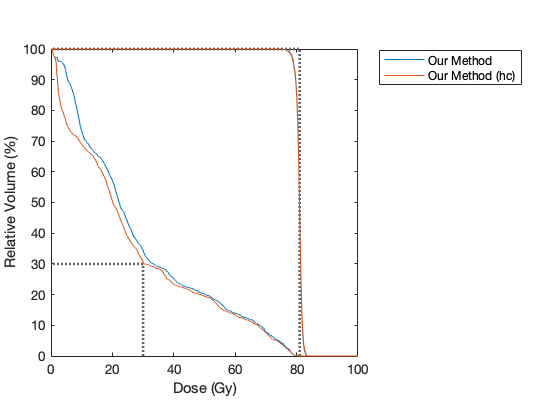

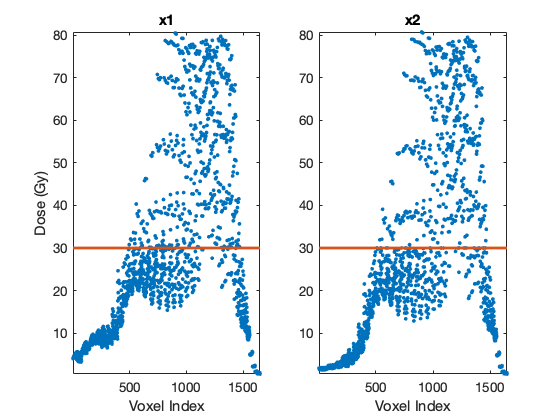

In [42]:
% Create problem instance (Zhang initialization)
prostate.terms = {pt1};
rectum.terms = {rt2};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.maxIter = 5000;

% Our Method
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 1, obj: 4.8733e+00, uDiff: 2.3935e-13

Zhang Method
Time: 
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 64.14 | 4333.84

Zhang Method (hc)
Time: 9.61
Structure: PTV_68
* unif | 65.64 | 80.82 | 80.94 | 78.99 | 86.30 | 1.20 | 99.67
Structure: Rectum
* udvc | 28.82 | 2497.81


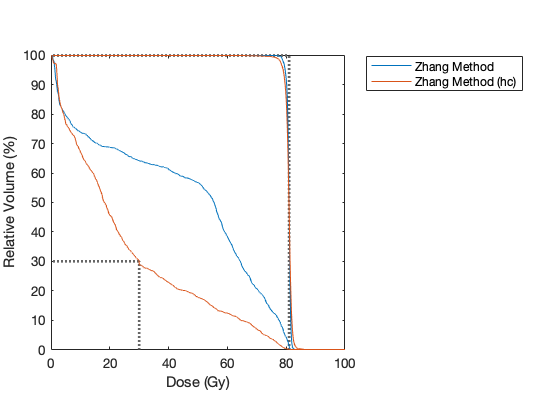

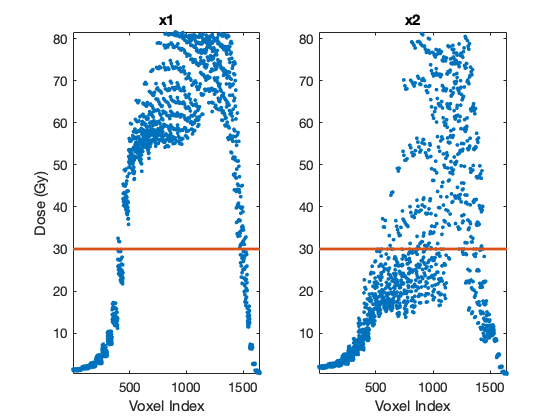

In [33]:
% Equivalent to constraint generation

% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt2};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Zhang Method (initialize with PTV solution)
prob.slackDose(); 
x1a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Zhang Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Zhang Method','Zhang Method (hc)'}) 

Time
* Our Method (PTV): **50.74**
* Our Method (mid): 270.74
* Our Method (OAR): 98.17
* Zhang Method (mid): 73.77
* Our Method (PTV, hc): **7.53**
* Our Method (mid, hc): 9.17
* Our Method (OAR), hc): 11.39
* Zhang Mehhod (mid, hc): 8.59

Structure: PTV_68

Method | Min | Something | Something | Something | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Our Method (PTV) | 72.58 | 80.84 | 80.95 | 79.18 | 84.67 | 0.93 | **77.20**
Our Method (mid) | 72.74 | 80.84 | 80.94 | 79.09 | 84.53 | 0.95 | 79.31
Our Method (OAR) | 72.93 | 80.84 | 80.95 | 79.14 | 84.48 | 0.94 | 78.23
Zhang Method (mid) | 71.10 | 80.83 | 80.93 | 78.82 | 85.43 | 1.18 | 97.74
Our Method (PTV, hc) | 72.32 | 80.84 | 80.95 | 79.12 | 85.10 | 0.97 | **80.64**
Our Method (mid, hc) | 72.48 | 80.84 | 80.94 | 79.02 | 84.64 | 1.00 | 83.60
Our Method (OAR, hc) | 72.24 | 80.84 | 80.95 | 79.08 | 84.64 | 0.97 | 81.26
Zhang Method (mid, hc) | 71.30 | 80.82 | 80.93 | 78.75 | 85.73 | 1.22 | 101.74

Structure: Rectum

Method | % > 30 | Area
-|-|-
Our Method (PTV) | 33.37 | 2789.18
Our Method (mid) | 34.41 | 2836.88
Our Method (OAR) | 33.68 | 2670.73
Zhang Method (mid) | 34.65 | **2582.36** 
Our Method (PTV, hc) | 29.98 | 2624.35
Our Method (mid, hc) | 29.98 | 2614.59
Our Method (OAR, hc) | 29.98 | 2616.58
Zhang Method (mid, hc) | 29.98 | **2441.54**


Our Method
Time: 32.10
Structure: PTV_68
* unif | 42.25 | 80.39 | 80.85 | 74.81 | 92.96 | 4.31 | 358.11
Structure: Rectum
* udvc | 23.85 | 941.24

Our Method (hc)
Time: 10.42
Structure: PTV_68
* unif | 16.73 | 78.53 | 80.37 | 57.29 | 97.67 | 9.84 | 834.90
Structure: Rectum
* udvc | 8.19 | 471.89

Zhang Method
Time: 12.50
Structure: PTV_68
* unif | 38.82 | 80.38 | 80.83 | 74.71 | 94.37 | 4.59 | 381.52
Structure: Rectum
* udvc | 25.18 | 900.73

Zhang Method (hc)Time: 10.48
Structure: PTV_68
* unif | 19.85 | 78.68 | 80.39 | 59.08 | 97.72 | 9.25 | 784.50
Structure: Rectum
* udvc | 9.28 | 511.46


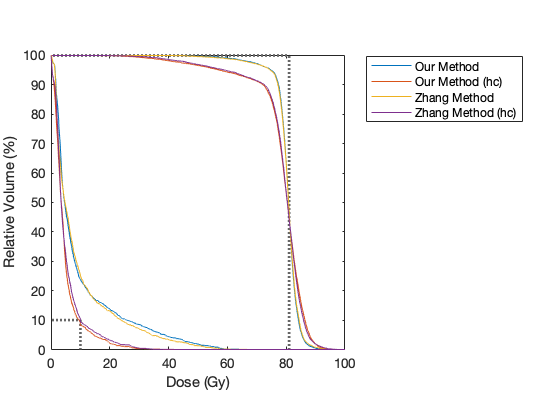

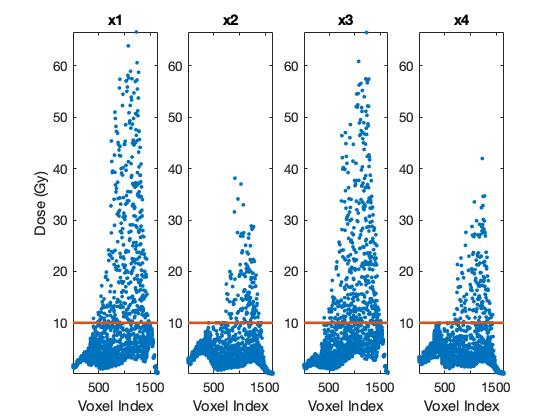

In [9]:
% Example 4.1(c)

% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt3};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Our Method
prob.calcBeams(false); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Zhang Method
prob.slackDose(false); 
x2a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x2a);

% Zhang Method (hc)
prob.constGen(x2a); 
x2b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('Time: %.2f\n',prob.time);
prob.printStats(x2b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b,x2a,x2b])
prob.compareDVH([x1a,x1b,x2a,x2b],{'Our Method','Our Method (hc)','Zhang Method','Zhang Method (hc)'}) 

iter: 0, obj: 3.2805e+03
iter: 1, obj: 4.0880e+01, wDiff: 1.7162e-01
iter: 2, obj: 2.6880e+01, wDiff: 7.3919e-02
iter: 3, obj: 2.2565e+01, wDiff: 4.6629e-02
iter: 4, obj: 2.1133e+01, wDiff: 2.9873e-02
iter: 5, obj: 2.0643e+01, wDiff: 1.8409e-02
iter: 6, obj: 2.0460e+01, wDiff: 2.2152e-02
iter: 7, obj: 2.0359e+01, wDiff: 1.8121e-02
iter: 8, obj: 2.0296e+01, wDiff: 5.2059e-03
iter: 9, obj: 2.0274e+01, wDiff: 3.2023e-03
iter: 10, obj: 2.0265e+01, wDiff: 2.0711e-03
iter: 11, obj: 2.0261e+01, wDiff: 1.2654e-02
iter: 12, obj: 2.0251e+01, wDiff: 1.3041e-02
iter: 13, obj: 2.0234e+01, wDiff: 2.5889e-03
iter: 14, obj: 2.0227e+01, wDiff: 1.3097e-02
iter: 15, obj: 2.0214e+01, wDiff: 2.3387e-03
iter: 16, obj: 2.0209e+01, wDiff: 1.4821e-03
iter: 17, obj: 2.0207e+01, wDiff: 1.0842e-03
iter: 18, obj: 2.0206e+01, wDiff: 8.9537e-04
iter: 19, obj: 2.0204e+01, wDiff: 7.9946e-04
iter: 20, obj: 2.0203e+01, wDiff: 7.4620e-04
iter: 21, obj: 2.0203e+01, wDiff: 7.1113e-04
iter: 22, obj: 2.0202e+01, wDiff: 6.856

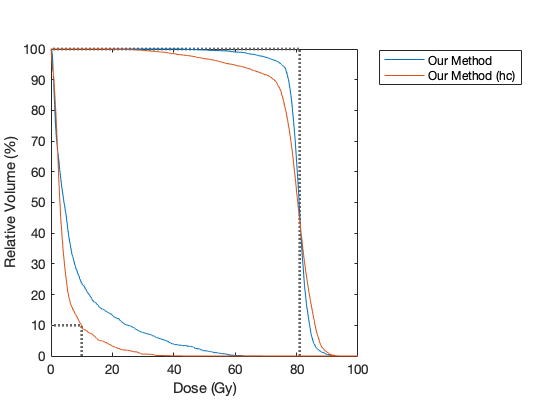

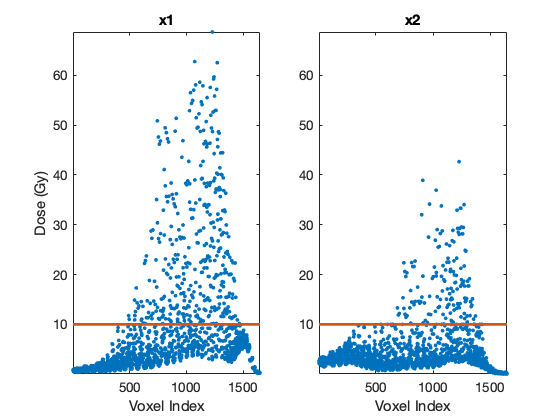

In [27]:
% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt3};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.x0 = 0*prob.x0;
prob.maxIter = 5000;

% Our Method (initialize with zeros)
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 0, obj: 9.7343e+02
iter: 1, obj: 3.0741e+01, wDiff: 1.3276e-01
iter: 2, obj: 2.3702e+01, wDiff: 5.5930e-02
iter: 3, obj: 2.1706e+01, wDiff: 3.2201e-02
iter: 4, obj: 2.1044e+01, wDiff: 2.9440e-02
iter: 5, obj: 2.0719e+01, wDiff: 2.0276e-02
iter: 6, obj: 2.0564e+01, wDiff: 1.4607e-02
iter: 7, obj: 2.0489e+01, wDiff: 1.8151e-02
iter: 8, obj: 2.0431e+01, wDiff: 1.8426e-02
iter: 9, obj: 2.0380e+01, wDiff: 1.3422e-02
iter: 10, obj: 2.0350e+01, wDiff: 3.6511e-03
iter: 11, obj: 2.0335e+01, wDiff: 1.2736e-02
iter: 12, obj: 2.0315e+01, wDiff: 2.9913e-03
iter: 13, obj: 2.0305e+01, wDiff: 1.3287e-02
iter: 14, obj: 2.0287e+01, wDiff: 2.9227e-03
iter: 15, obj: 2.0277e+01, wDiff: 1.3408e-02
iter: 16, obj: 2.0262e+01, wDiff: 2.6873e-03
iter: 17, obj: 2.0255e+01, wDiff: 1.9001e-03
iter: 18, obj: 2.0251e+01, wDiff: 1.5761e-03
iter: 19, obj: 2.0247e+01, wDiff: 1.4121e-03
iter: 20, obj: 2.0244e+01, wDiff: 1.3137e-03
iter: 21, obj: 2.0242e+01, wDiff: 1.2461e-03
iter: 22, obj: 2.0239e+01, wDiff: 1.194

iter: 181, obj: 2.0201e+01, wDiff: 1.0922e-04
iter: 182, obj: 2.0201e+01, wDiff: 1.0926e-04
iter: 183, obj: 2.0201e+01, wDiff: 1.0891e-04
iter: 184, obj: 2.0201e+01, wDiff: 1.0856e-04
iter: 185, obj: 2.0201e+01, wDiff: 1.0821e-04
iter: 186, obj: 2.0201e+01, wDiff: 1.0786e-04
iter: 187, obj: 2.0201e+01, wDiff: 1.0681e-04
iter: 188, obj: 2.0201e+01, wDiff: 1.0712e-04
iter: 189, obj: 2.0201e+01, wDiff: 1.0674e-04
iter: 190, obj: 2.0201e+01, wDiff: 1.0637e-04
iter: 191, obj: 2.0201e+01, wDiff: 1.0601e-04
iter: 192, obj: 2.0201e+01, wDiff: 1.0565e-04
iter: 193, obj: 2.0201e+01, wDiff: 1.0529e-04
iter: 194, obj: 2.0200e+01, wDiff: 1.0494e-04
iter: 195, obj: 2.0200e+01, wDiff: 1.0459e-04
iter: 196, obj: 2.0200e+01, wDiff: 1.0425e-04
iter: 197, obj: 2.0200e+01, wDiff: 1.0390e-04
iter: 198, obj: 2.0200e+01, wDiff: 1.0357e-04
iter: 199, obj: 2.0200e+01, wDiff: 1.0323e-04
iter: 200, obj: 2.0200e+01, wDiff: 1.0290e-04
iter: 201, obj: 2.0200e+01, wDiff: 1.0257e-04
iter: 202, obj: 2.0200e+01, wDiff:

iter: 359, obj: 2.0199e+01, wDiff: 6.7073e-05
iter: 360, obj: 2.0199e+01, wDiff: 6.6926e-05
iter: 361, obj: 2.0199e+01, wDiff: 6.6780e-05
iter: 362, obj: 2.0199e+01, wDiff: 6.6634e-05
iter: 363, obj: 2.0199e+01, wDiff: 6.6490e-05
iter: 364, obj: 2.0199e+01, wDiff: 6.6346e-05
iter: 365, obj: 2.0199e+01, wDiff: 6.6204e-05
iter: 366, obj: 2.0199e+01, wDiff: 6.6062e-05
iter: 367, obj: 2.0199e+01, wDiff: 6.5921e-05
iter: 368, obj: 2.0199e+01, wDiff: 6.5781e-05
iter: 369, obj: 2.0199e+01, wDiff: 6.5642e-05
iter: 370, obj: 2.0198e+01, wDiff: 6.5503e-05
iter: 371, obj: 2.0198e+01, wDiff: 6.5366e-05
iter: 372, obj: 2.0198e+01, wDiff: 6.5229e-05
iter: 373, obj: 2.0198e+01, wDiff: 6.5093e-05
iter: 374, obj: 2.0198e+01, wDiff: 6.4179e-05
iter: 375, obj: 2.0198e+01, wDiff: 6.4785e-05
iter: 376, obj: 2.0198e+01, wDiff: 6.4635e-05
iter: 377, obj: 2.0198e+01, wDiff: 6.4491e-05
iter: 378, obj: 2.0198e+01, wDiff: 6.4349e-05
iter: 379, obj: 2.0198e+01, wDiff: 6.4210e-05
iter: 380, obj: 2.0198e+01, wDiff:

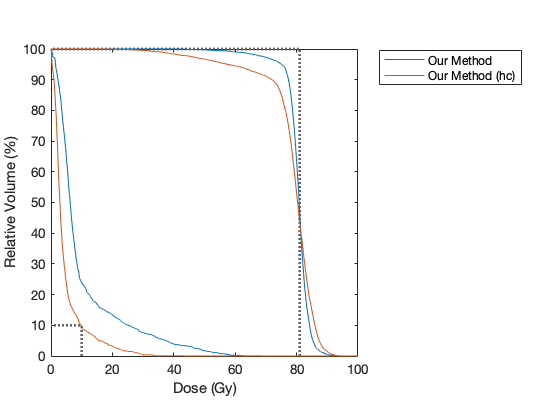

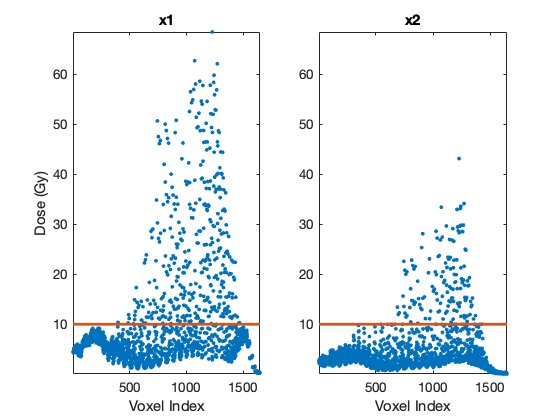

In [44]:
% Create problem instance (Zhang initialization)
prostate.terms = {pt1};
rectum.terms = {rt3};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.maxIter = 5000;

% Our Method
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 1, obj: 4.8733e+00, uDiff: 2.3935e-13

Zhang Method
Time: 
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 73.97 | 4333.84

Zhang Method (hc)
Time: 10.96
Structure: PTV_68
* unif | 16.18 | 78.81 | 80.51 | 58.62 | 103.13 | 10.14 | 853.41
Structure: Rectum
* udvc | 7.46 | 465.74


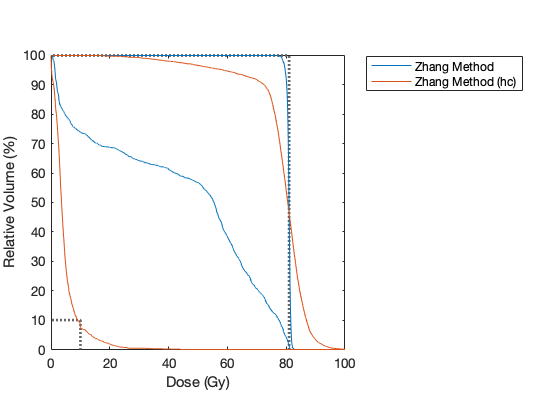

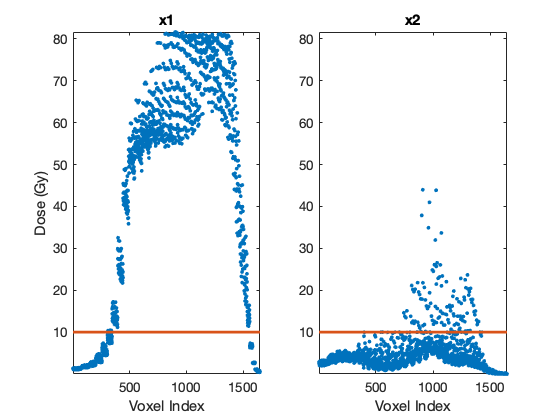

In [34]:
% Equivalent to constraint generation

% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt3};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Zhang Method (initialize with PTV solution)
prob.slackDose(); 
x1a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Zhang Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Zhang Method','Zhang Method (hc)'}) 

Time
* Our Method (PTV): 32.10
* Our Method (mid): 60.98
* Our Method (OAR): **11.15**
* Zhang Method (mid): 12.50
* Our Method (PTV, hc): 10.42
* Our Method (mid, hc): 9.70
* Our Method (OAR, hc): **9.28**
* Zhang Mehhod (mid, hc): 10.48

Structure: PTV_68

Method | Min | Something | Something | Something | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Our Method (PTV) | 42.25 | 80.39 | 80.85 | 74.81 | 92.96 | 4.31 | **358.11**
Our Method (mid) | 39.34 | 80.40 | 80.84 | 74.98 | 93.95 | 4.39 | 364.65
Our Method (OAR) | 38.72 | 80.40 | 80.84 | 75.00 | 94.25 | 4.41 | 366.09
Zhang Method (mid) | 38.82 | 80.38 | 80.83 | 74.71 | 94.37 | 4.59 | 381.52
Our Method (PTV, hc) | 16.73 | 78.53 | 80.37 | 57.29 | 97.67 | 9.84 | 834.90
Our Method (mid, hc) | 17.17 | 78.48 | 80.35 | 57.45 | 96.31 | 9.59 | 815.91
Our Method (OAR, hc) | 17.24 | 78.62 | 80.37 | 58.80 | 94.51 | 9.39 | 796.59
Zhang Method (mid, hc) | 19.85 | 78.68 | 80.39 | 59.08 | 97.72 | 9.25 | **784.50**

Structure: Rectum

Method | % > 10 | Area
-|-|-
Our Method (PTV) | 23.85 | 941.24
Our Method (mid) | 23.91 | 1005.81
Our Method (OAR) | 23.79 | **873.27**
Zhang Method (mid)| 25.18 | 900.73
Our Method (PTV, hc) | 8.19 | 471.89
Our Method (mid, hc) | 8.80 | **453.08**
Our Method (OAR, hc) | 9.04 | 460.18
Zhang Method (mid, hc) | 9.28 | 511.46


Our Method
Time: 95.06
Structure: PTV_68
* unif | 75.28 | 80.82 | 80.94 | 79.03 | 83.70 | 0.88 | 74.16
Structure: Rectum
* udvc | 46.78 | 3606.73
* udvc | 3.94 | 3606.73
* udvc | 21.66 | 3606.73
* udvc | 61.41 | 3606.73

Our Method (hc)
Time: 25.23
Structure: PTV_68
* unif | 73.06 | 80.77 | 80.93 | 78.72 | 83.85 | 1.07 | 90.47
Structure: Rectum
* udvc | 37.08 | 3401.83
* udvc | 0.00 | 3401.83
* udvc | 19.17 | 3401.83
* udvc | 59.95 | 3401.83
iter: 1, obj: 2.9062e+01, uDiff: 9.3588e-02
iter: 2, obj: 1.8647e+01, uDiff: 5.6457e-02
iter: 3, obj: 1.5238e+01, uDiff: 4.4399e-02
iter: 4, obj: 1.3385e+01, uDiff: 3.6605e-02
iter: 5, obj: 1.2180e+01, uDiff: 3.1891e-02
iter: 6, obj: 1.1302e+01, uDiff: 2.8239e-02
iter: 7, obj: 1.0625e+01, uDiff: 2.5702e-02
iter: 8, obj: 1.0089e+01, uDiff: 2.3715e-02
iter: 9, obj: 9.6578e+00, uDiff: 2.1901e-02
iter: 10, obj: 9.3035e+00, uDiff: 2.0375e-02
iter: 11, obj: 9.0017e+00, uDiff: 1.8905e-02
iter: 12, obj: 8.7449e+00, uDiff: 1.7833e-02
iter: 13, obj: 8.5214e

iter: 172, obj: 5.3591e+00, uDiff: 1.4981e-03
iter: 173, obj: 5.3576e+00, uDiff: 1.4861e-03
iter: 174, obj: 5.3562e+00, uDiff: 1.4736e-03
iter: 175, obj: 5.3547e+00, uDiff: 1.4594e-03
iter: 176, obj: 5.3533e+00, uDiff: 1.4468e-03
iter: 177, obj: 5.3520e+00, uDiff: 1.4359e-03
iter: 178, obj: 5.3506e+00, uDiff: 1.4227e-03
iter: 179, obj: 5.3493e+00, uDiff: 1.4113e-03
iter: 180, obj: 5.3480e+00, uDiff: 1.4003e-03
iter: 181, obj: 5.3468e+00, uDiff: 1.3894e-03
iter: 182, obj: 5.3455e+00, uDiff: 1.3790e-03
iter: 183, obj: 5.3443e+00, uDiff: 1.3681e-03
iter: 184, obj: 5.3431e+00, uDiff: 1.3563e-03
iter: 185, obj: 5.3419e+00, uDiff: 1.3446e-03
iter: 186, obj: 5.3407e+00, uDiff: 1.3338e-03
iter: 187, obj: 5.3396e+00, uDiff: 1.3232e-03
iter: 188, obj: 5.3385e+00, uDiff: 1.3120e-03
iter: 189, obj: 5.3374e+00, uDiff: 1.3024e-03
iter: 190, obj: 5.3363e+00, uDiff: 1.2926e-03
iter: 191, obj: 5.3352e+00, uDiff: 1.2804e-03
iter: 192, obj: 5.3342e+00, uDiff: 1.2702e-03
iter: 193, obj: 5.3332e+00, uDiff:

iter: 351, obj: 5.2726e+00, uDiff: 4.2859e-04
iter: 352, obj: 5.2725e+00, uDiff: 4.2631e-04
iter: 353, obj: 5.2724e+00, uDiff: 4.2404e-04
iter: 354, obj: 5.2723e+00, uDiff: 4.2139e-04
iter: 355, obj: 5.2722e+00, uDiff: 4.1911e-04
iter: 356, obj: 5.2721e+00, uDiff: 4.1689e-04
iter: 357, obj: 5.2720e+00, uDiff: 4.1469e-04
iter: 358, obj: 5.2719e+00, uDiff: 4.1250e-04
iter: 359, obj: 5.2718e+00, uDiff: 4.1002e-04
iter: 360, obj: 5.2717e+00, uDiff: 4.2923e-04
iter: 361, obj: 5.2715e+00, uDiff: 4.1316e-04
iter: 362, obj: 5.2714e+00, uDiff: 4.0723e-04
iter: 363, obj: 5.2713e+00, uDiff: 4.0572e-04
iter: 364, obj: 5.2712e+00, uDiff: 4.0173e-04
iter: 365, obj: 5.2711e+00, uDiff: 4.0320e-04
iter: 366, obj: 5.2710e+00, uDiff: 3.9965e-04
iter: 367, obj: 5.2710e+00, uDiff: 3.9629e-04
iter: 368, obj: 5.2709e+00, uDiff: 3.9712e-04
iter: 369, obj: 5.2708e+00, uDiff: 3.9377e-04
iter: 370, obj: 5.2707e+00, uDiff: 3.9200e-04
iter: 371, obj: 5.2706e+00, uDiff: 3.8609e-04
iter: 372, obj: 5.2705e+00, uDiff:

iter: 530, obj: 5.2632e+00, uDiff: 1.8599e-04
iter: 531, obj: 5.2632e+00, uDiff: 1.8529e-04
iter: 532, obj: 5.2632e+00, uDiff: 1.8453e-04
iter: 533, obj: 5.2632e+00, uDiff: 1.8380e-04
iter: 534, obj: 5.2632e+00, uDiff: 1.8310e-04
iter: 535, obj: 5.2631e+00, uDiff: 1.8234e-04
iter: 536, obj: 5.2631e+00, uDiff: 1.8162e-04
iter: 537, obj: 5.2631e+00, uDiff: 1.8091e-04
iter: 538, obj: 5.2631e+00, uDiff: 1.8025e-04
iter: 539, obj: 5.2631e+00, uDiff: 1.7950e-04
iter: 540, obj: 5.2630e+00, uDiff: 1.7881e-04
iter: 541, obj: 5.2630e+00, uDiff: 1.7808e-04
iter: 542, obj: 5.2630e+00, uDiff: 1.7906e-04
iter: 543, obj: 5.2630e+00, uDiff: 1.7669e-04
iter: 544, obj: 5.2630e+00, uDiff: 1.7629e-04
iter: 545, obj: 5.2629e+00, uDiff: 1.7535e-04
iter: 546, obj: 5.2629e+00, uDiff: 1.7461e-04
iter: 547, obj: 5.2629e+00, uDiff: 1.7391e-04
iter: 548, obj: 5.2629e+00, uDiff: 1.7324e-04
iter: 549, obj: 5.2629e+00, uDiff: 1.7259e-04
iter: 550, obj: 5.2629e+00, uDiff: 1.7186e-04
iter: 551, obj: 5.2628e+00, uDiff:

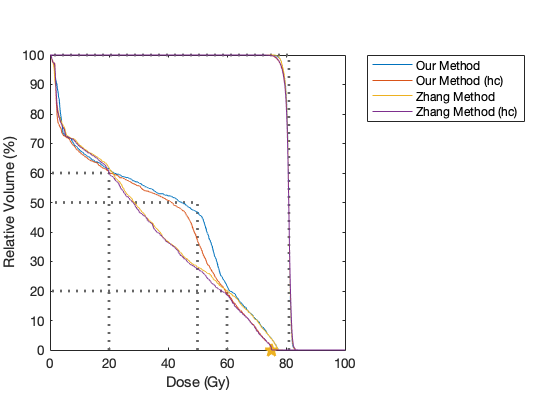

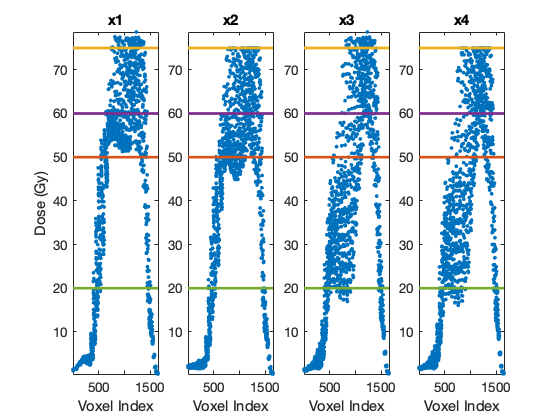

In [12]:
% Example 4.2

% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt1,rt4,rt5,rt6};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Our Method
prob.calcBeams(false); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Zhang Method
prob.slackDose(); 
x2a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x2a);

% Zhang Method (hc)
prob.constGen(x2a); 
x2b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('Time: %.2f\n',prob.time);
prob.printStats(x2b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b,x2a,x2b])
prob.compareDVH([x1a,x1b,x2a,x2b],{'Our Method','Our Method (hc)','Zhang Method','Zhang Method (hc)'}) 

iter: 0, obj: 3.2805e+03
iter: 1, obj: 6.9269e+01, wDiff: 4.3806e-01
iter: 2, obj: 4.6136e+01, wDiff: 1.9641e-01
iter: 3, obj: 3.7255e+01, wDiff: 1.3419e-01
iter: 4, obj: 3.2180e+01, wDiff: 1.0439e-01
iter: 5, obj: 2.8786e+01, wDiff: 8.6736e-02
iter: 6, obj: 2.6274e+01, wDiff: 7.5573e-02
iter: 7, obj: 2.4278e+01, wDiff: 6.7730e-02
iter: 8, obj: 2.2652e+01, wDiff: 6.1247e-02
iter: 9, obj: 2.1311e+01, wDiff: 5.5725e-02
iter: 10, obj: 2.0187e+01, wDiff: 5.1110e-02
iter: 11, obj: 1.9229e+01, wDiff: 4.7294e-02
iter: 12, obj: 1.8401e+01, wDiff: 4.4035e-02
iter: 13, obj: 1.7677e+01, wDiff: 4.1259e-02
iter: 14, obj: 1.7034e+01, wDiff: 3.8932e-02
iter: 15, obj: 1.6458e+01, wDiff: 3.6921e-02
iter: 16, obj: 1.5937e+01, wDiff: 3.5126e-02
iter: 17, obj: 1.5463e+01, wDiff: 3.3504e-02
iter: 18, obj: 1.5031e+01, wDiff: 3.2030e-02
iter: 19, obj: 1.4634e+01, wDiff: 3.0717e-02
iter: 20, obj: 1.4267e+01, wDiff: 2.9537e-02
iter: 21, obj: 1.3928e+01, wDiff: 2.8449e-02
iter: 22, obj: 1.3612e+01, wDiff: 2.743

iter: 181, obj: 6.5003e+00, wDiff: 4.0388e-03
iter: 182, obj: 6.4936e+00, wDiff: 4.0192e-03
iter: 183, obj: 6.4870e+00, wDiff: 3.9998e-03
iter: 184, obj: 6.4805e+00, wDiff: 3.9807e-03
iter: 185, obj: 6.4740e+00, wDiff: 3.9617e-03
iter: 186, obj: 6.4676e+00, wDiff: 3.9430e-03
iter: 187, obj: 6.4612e+00, wDiff: 3.9249e-03
iter: 188, obj: 6.4549e+00, wDiff: 3.9068e-03
iter: 189, obj: 6.4487e+00, wDiff: 3.8889e-03
iter: 190, obj: 6.4425e+00, wDiff: 3.8715e-03
iter: 191, obj: 6.4363e+00, wDiff: 3.8546e-03
iter: 192, obj: 6.4303e+00, wDiff: 3.8379e-03
iter: 193, obj: 6.4242e+00, wDiff: 3.8216e-03
iter: 194, obj: 6.4183e+00, wDiff: 3.8056e-03
iter: 195, obj: 6.4123e+00, wDiff: 3.7897e-03
iter: 196, obj: 6.4064e+00, wDiff: 3.7740e-03
iter: 197, obj: 6.4006e+00, wDiff: 3.7586e-03
iter: 198, obj: 6.3948e+00, wDiff: 3.7432e-03
iter: 199, obj: 6.3891e+00, wDiff: 3.7281e-03
iter: 200, obj: 6.3834e+00, wDiff: 3.7237e-03
iter: 201, obj: 6.3777e+00, wDiff: 3.7009e-03
iter: 202, obj: 6.3721e+00, wDiff:

iter: 359, obj: 5.8306e+00, wDiff: 2.3050e-03
iter: 360, obj: 5.8284e+00, wDiff: 2.2998e-03
iter: 361, obj: 5.8262e+00, wDiff: 2.2946e-03
iter: 362, obj: 5.8240e+00, wDiff: 2.2899e-03
iter: 363, obj: 5.8219e+00, wDiff: 2.2843e-03
iter: 364, obj: 5.8198e+00, wDiff: 2.2793e-03
iter: 365, obj: 5.8176e+00, wDiff: 2.2741e-03
iter: 366, obj: 5.8155e+00, wDiff: 2.2691e-03
iter: 367, obj: 5.8134e+00, wDiff: 2.2640e-03
iter: 368, obj: 5.8113e+00, wDiff: 2.2589e-03
iter: 369, obj: 5.8092e+00, wDiff: 2.2538e-03
iter: 370, obj: 5.8071e+00, wDiff: 2.2487e-03
iter: 371, obj: 5.8050e+00, wDiff: 2.2437e-03
iter: 372, obj: 5.8030e+00, wDiff: 2.2387e-03
iter: 373, obj: 5.8009e+00, wDiff: 2.2339e-03
iter: 374, obj: 5.7988e+00, wDiff: 2.2289e-03
iter: 375, obj: 5.7968e+00, wDiff: 2.2240e-03
iter: 376, obj: 5.7948e+00, wDiff: 2.2191e-03
iter: 377, obj: 5.7928e+00, wDiff: 2.2143e-03
iter: 378, obj: 5.7907e+00, wDiff: 2.2094e-03
iter: 379, obj: 5.7887e+00, wDiff: 2.2046e-03
iter: 380, obj: 5.7867e+00, wDiff:

iter: 537, obj: 5.5557e+00, wDiff: 1.6168e-03
iter: 538, obj: 5.5546e+00, wDiff: 1.6139e-03
iter: 539, obj: 5.5535e+00, wDiff: 1.6111e-03
iter: 540, obj: 5.5524e+00, wDiff: 1.6083e-03
iter: 541, obj: 5.5514e+00, wDiff: 1.6055e-03
iter: 542, obj: 5.5503e+00, wDiff: 1.6027e-03
iter: 543, obj: 5.5493e+00, wDiff: 1.5999e-03
iter: 544, obj: 5.5482e+00, wDiff: 1.5971e-03
iter: 545, obj: 5.5472e+00, wDiff: 1.5943e-03
iter: 546, obj: 5.5461e+00, wDiff: 1.5916e-03
iter: 547, obj: 5.5451e+00, wDiff: 1.5888e-03
iter: 548, obj: 5.5441e+00, wDiff: 1.5861e-03
iter: 549, obj: 5.5430e+00, wDiff: 1.5833e-03
iter: 550, obj: 5.5420e+00, wDiff: 1.5806e-03
iter: 551, obj: 5.5410e+00, wDiff: 1.5779e-03
iter: 552, obj: 5.5399e+00, wDiff: 1.5752e-03
iter: 553, obj: 5.5389e+00, wDiff: 1.5725e-03
iter: 554, obj: 5.5379e+00, wDiff: 1.5698e-03
iter: 555, obj: 5.5369e+00, wDiff: 1.5672e-03
iter: 556, obj: 5.5359e+00, wDiff: 1.5645e-03
iter: 557, obj: 5.5349e+00, wDiff: 1.5619e-03
iter: 558, obj: 5.5339e+00, wDiff:

iter: 715, obj: 5.4105e+00, wDiff: 1.2216e-03
iter: 716, obj: 5.4099e+00, wDiff: 1.2199e-03
iter: 717, obj: 5.4093e+00, wDiff: 1.2182e-03
iter: 718, obj: 5.4087e+00, wDiff: 1.2165e-03
iter: 719, obj: 5.4081e+00, wDiff: 1.2148e-03
iter: 720, obj: 5.4075e+00, wDiff: 1.2132e-03
iter: 721, obj: 5.4069e+00, wDiff: 1.2115e-03
iter: 722, obj: 5.4063e+00, wDiff: 1.2098e-03
iter: 723, obj: 5.4057e+00, wDiff: 1.2081e-03
iter: 724, obj: 5.4051e+00, wDiff: 1.2065e-03
iter: 725, obj: 5.4045e+00, wDiff: 1.2048e-03
iter: 726, obj: 5.4039e+00, wDiff: 1.2031e-03
iter: 727, obj: 5.4033e+00, wDiff: 1.2015e-03
iter: 728, obj: 5.4027e+00, wDiff: 1.1998e-03
iter: 729, obj: 5.4021e+00, wDiff: 1.1981e-03
iter: 730, obj: 5.4015e+00, wDiff: 1.1965e-03
iter: 731, obj: 5.4009e+00, wDiff: 1.1948e-03
iter: 732, obj: 5.4003e+00, wDiff: 1.1932e-03
iter: 733, obj: 5.3997e+00, wDiff: 1.1915e-03
iter: 734, obj: 5.3991e+00, wDiff: 1.1899e-03
iter: 735, obj: 5.3986e+00, wDiff: 1.1883e-03
iter: 736, obj: 5.3980e+00, wDiff:

iter: 893, obj: 5.3229e+00, wDiff: 9.7867e-04
iter: 894, obj: 5.3225e+00, wDiff: 9.7760e-04
iter: 895, obj: 5.3221e+00, wDiff: 9.7653e-04
iter: 896, obj: 5.3217e+00, wDiff: 9.7546e-04
iter: 897, obj: 5.3214e+00, wDiff: 9.7440e-04
iter: 898, obj: 5.3210e+00, wDiff: 9.7333e-04
iter: 899, obj: 5.3206e+00, wDiff: 9.7228e-04
iter: 900, obj: 5.3202e+00, wDiff: 9.7122e-04
iter: 901, obj: 5.3198e+00, wDiff: 9.7020e-04
iter: 902, obj: 5.3194e+00, wDiff: 9.6915e-04
iter: 903, obj: 5.3190e+00, wDiff: 9.6810e-04
iter: 904, obj: 5.3186e+00, wDiff: 9.6705e-04
iter: 905, obj: 5.3183e+00, wDiff: 9.6600e-04
iter: 906, obj: 5.3179e+00, wDiff: 9.6496e-04
iter: 907, obj: 5.3175e+00, wDiff: 9.6392e-04
iter: 908, obj: 5.3171e+00, wDiff: 9.6288e-04
iter: 909, obj: 5.3167e+00, wDiff: 9.6184e-04
iter: 910, obj: 5.3163e+00, wDiff: 9.6080e-04
iter: 911, obj: 5.3160e+00, wDiff: 9.5977e-04
iter: 912, obj: 5.3156e+00, wDiff: 9.5874e-04
iter: 913, obj: 5.3152e+00, wDiff: 9.5775e-04
iter: 914, obj: 5.3148e+00, wDiff:

iter: 1070, obj: 5.2643e+00, wDiff: 8.2080e-04
iter: 1071, obj: 5.2641e+00, wDiff: 8.2007e-04
iter: 1072, obj: 5.2638e+00, wDiff: 8.1933e-04
iter: 1073, obj: 5.2635e+00, wDiff: 8.1860e-04
iter: 1074, obj: 5.2632e+00, wDiff: 8.1787e-04
iter: 1075, obj: 5.2630e+00, wDiff: 8.1713e-04
iter: 1076, obj: 5.2627e+00, wDiff: 8.1640e-04
iter: 1077, obj: 5.2623e+00, wDiff: 1.0652e-03
iter: 1078, obj: 5.2621e+00, wDiff: 8.1820e-04
iter: 1079, obj: 5.2618e+00, wDiff: 8.1648e-04
iter: 1080, obj: 5.2615e+00, wDiff: 8.1471e-04
iter: 1081, obj: 5.2612e+00, wDiff: 8.1314e-04
iter: 1082, obj: 5.2610e+00, wDiff: 8.1140e-04
iter: 1083, obj: 5.2607e+00, wDiff: 8.0945e-04
iter: 1084, obj: 5.2604e+00, wDiff: 8.0755e-04
iter: 1085, obj: 5.2602e+00, wDiff: 8.0570e-04
iter: 1086, obj: 5.2599e+00, wDiff: 8.0389e-04
iter: 1087, obj: 5.2596e+00, wDiff: 8.0211e-04
iter: 1088, obj: 5.2594e+00, wDiff: 8.0036e-04
iter: 1089, obj: 5.2591e+00, wDiff: 8.3575e-04
iter: 1090, obj: 5.2588e+00, wDiff: 7.9807e-04
iter: 1091, o

iter: 1244, obj: 5.2318e+00, wDiff: 5.2635e-04
iter: 1245, obj: 5.2317e+00, wDiff: 5.2498e-04
iter: 1246, obj: 5.2316e+00, wDiff: 5.2364e-04
iter: 1247, obj: 5.2315e+00, wDiff: 5.2231e-04
iter: 1248, obj: 5.2314e+00, wDiff: 5.2101e-04
iter: 1249, obj: 5.2312e+00, wDiff: 5.1965e-04
iter: 1250, obj: 5.2311e+00, wDiff: 5.1838e-04
iter: 1251, obj: 5.2310e+00, wDiff: 5.1713e-04
iter: 1252, obj: 5.2309e+00, wDiff: 5.1589e-04
iter: 1253, obj: 5.2308e+00, wDiff: 5.1466e-04
iter: 1254, obj: 5.2307e+00, wDiff: 5.1345e-04
iter: 1255, obj: 5.2306e+00, wDiff: 5.1225e-04
iter: 1256, obj: 5.2305e+00, wDiff: 5.1106e-04
iter: 1257, obj: 5.2304e+00, wDiff: 5.0988e-04
iter: 1258, obj: 5.2303e+00, wDiff: 5.0872e-04
iter: 1259, obj: 5.2302e+00, wDiff: 5.0757e-04
iter: 1260, obj: 5.2301e+00, wDiff: 5.0643e-04
iter: 1261, obj: 5.2299e+00, wDiff: 5.0530e-04
iter: 1262, obj: 5.2298e+00, wDiff: 6.9068e-04
iter: 1263, obj: 5.2297e+00, wDiff: 5.0289e-04
iter: 1264, obj: 5.2296e+00, wDiff: 5.0155e-04
iter: 1265, o

iter: 1418, obj: 5.2178e+00, wDiff: 2.7547e-04
iter: 1419, obj: 5.2178e+00, wDiff: 2.7490e-04
iter: 1420, obj: 5.2178e+00, wDiff: 2.7462e-04
iter: 1421, obj: 5.2177e+00, wDiff: 2.7461e-04
iter: 1422, obj: 5.2177e+00, wDiff: 2.7487e-04
iter: 1423, obj: 5.2177e+00, wDiff: 2.7531e-04
iter: 1424, obj: 5.2176e+00, wDiff: 2.7601e-04
iter: 1425, obj: 5.2176e+00, wDiff: 2.7690e-04
iter: 1426, obj: 5.2176e+00, wDiff: 2.7798e-04
iter: 1427, obj: 5.2175e+00, wDiff: 2.7923e-04
iter: 1428, obj: 5.2175e+00, wDiff: 2.8006e-04
iter: 1429, obj: 5.2174e+00, wDiff: 2.8132e-04
iter: 1430, obj: 5.2174e+00, wDiff: 2.8304e-04
iter: 1431, obj: 5.2173e+00, wDiff: 4.0976e-04
iter: 1432, obj: 5.2173e+00, wDiff: 2.7083e-04
iter: 1433, obj: 5.2173e+00, wDiff: 2.7202e-04
iter: 1434, obj: 5.2172e+00, wDiff: 2.7355e-04
iter: 1435, obj: 5.2172e+00, wDiff: 2.7518e-04
iter: 1436, obj: 5.2172e+00, wDiff: 2.7675e-04
iter: 1437, obj: 5.2171e+00, wDiff: 2.7914e-04
iter: 1438, obj: 5.2171e+00, wDiff: 2.8169e-04
iter: 1439, o

iter: 1592, obj: 5.2102e+00, wDiff: 3.2433e-04
iter: 1593, obj: 5.2102e+00, wDiff: 2.5489e-04
iter: 1594, obj: 5.2101e+00, wDiff: 2.7847e-04
iter: 1595, obj: 5.2101e+00, wDiff: 3.2333e-04
iter: 1596, obj: 5.2101e+00, wDiff: 2.5958e-04
iter: 1597, obj: 5.2100e+00, wDiff: 2.9255e-04
iter: 1598, obj: 5.2100e+00, wDiff: 3.2223e-04
iter: 1599, obj: 5.2099e+00, wDiff: 3.2154e-04
iter: 1600, obj: 5.2099e+00, wDiff: 3.2090e-04
iter: 1601, obj: 5.2099e+00, wDiff: 2.8850e-04
iter: 1602, obj: 5.2098e+00, wDiff: 3.2003e-04
iter: 1603, obj: 5.2097e+00, wDiff: 5.2280e-04
iter: 1604, obj: 5.2097e+00, wDiff: 3.1884e-04
iter: 1605, obj: 5.2097e+00, wDiff: 3.1819e-04
iter: 1606, obj: 5.2096e+00, wDiff: 3.1759e-04
iter: 1607, obj: 5.2096e+00, wDiff: 3.1701e-04
iter: 1608, obj: 5.2095e+00, wDiff: 3.1644e-04
iter: 1609, obj: 5.2095e+00, wDiff: 3.1587e-04
iter: 1610, obj: 5.2095e+00, wDiff: 3.1532e-04
iter: 1611, obj: 5.2094e+00, wDiff: 1.2702e-03
iter: 1612, obj: 5.2093e+00, wDiff: 4.0692e-04
iter: 1613, o

iter: 1766, obj: 5.2018e+00, wDiff: 3.1745e-04
iter: 1767, obj: 5.2017e+00, wDiff: 3.1648e-04
iter: 1768, obj: 5.2017e+00, wDiff: 3.1554e-04
iter: 1769, obj: 5.2016e+00, wDiff: 3.1463e-04
iter: 1770, obj: 5.2016e+00, wDiff: 3.1376e-04
iter: 1771, obj: 5.2016e+00, wDiff: 3.1291e-04
iter: 1772, obj: 5.2015e+00, wDiff: 3.1209e-04
iter: 1773, obj: 5.2015e+00, wDiff: 3.1129e-04
iter: 1774, obj: 5.2014e+00, wDiff: 3.1052e-04
iter: 1775, obj: 5.2014e+00, wDiff: 3.0977e-04
iter: 1776, obj: 5.2014e+00, wDiff: 3.0904e-04
iter: 1777, obj: 5.2013e+00, wDiff: 3.0832e-04
iter: 1778, obj: 5.2013e+00, wDiff: 3.0763e-04
iter: 1779, obj: 5.2013e+00, wDiff: 3.0695e-04
iter: 1780, obj: 5.2012e+00, wDiff: 3.0629e-04
iter: 1781, obj: 5.2012e+00, wDiff: 3.0565e-04
iter: 1782, obj: 5.2011e+00, wDiff: 3.0502e-04
iter: 1783, obj: 5.2011e+00, wDiff: 3.0440e-04
iter: 1784, obj: 5.2011e+00, wDiff: 3.0379e-04
iter: 1785, obj: 5.2010e+00, wDiff: 3.0320e-04
iter: 1786, obj: 5.2010e+00, wDiff: 3.0262e-04
iter: 1787, o

iter: 1940, obj: 5.1961e+00, wDiff: 2.6010e-04
iter: 1941, obj: 5.1960e+00, wDiff: 2.5892e-04
iter: 1942, obj: 5.1960e+00, wDiff: 2.5779e-04
iter: 1943, obj: 5.1960e+00, wDiff: 2.5671e-04
iter: 1944, obj: 5.1960e+00, wDiff: 2.5567e-04
iter: 1945, obj: 5.1959e+00, wDiff: 2.5468e-04
iter: 1946, obj: 5.1959e+00, wDiff: 2.5372e-04
iter: 1947, obj: 5.1959e+00, wDiff: 2.5280e-04
iter: 1948, obj: 5.1958e+00, wDiff: 2.5188e-04
iter: 1949, obj: 5.1958e+00, wDiff: 2.5097e-04
iter: 1950, obj: 5.1958e+00, wDiff: 2.5006e-04
iter: 1951, obj: 5.1958e+00, wDiff: 2.4917e-04
iter: 1952, obj: 5.1957e+00, wDiff: 2.4832e-04
iter: 1953, obj: 5.1957e+00, wDiff: 2.4748e-04
iter: 1954, obj: 5.1957e+00, wDiff: 2.4667e-04
iter: 1955, obj: 5.1957e+00, wDiff: 2.4588e-04
iter: 1956, obj: 5.1956e+00, wDiff: 2.4511e-04
iter: 1957, obj: 5.1956e+00, wDiff: 2.4436e-04
iter: 1958, obj: 5.1956e+00, wDiff: 2.4362e-04
iter: 1959, obj: 5.1956e+00, wDiff: 2.4291e-04
iter: 1960, obj: 5.1955e+00, wDiff: 2.4221e-04
iter: 1961, o

iter: 2114, obj: 5.1932e+00, wDiff: 1.7472e-04
iter: 2115, obj: 5.1932e+00, wDiff: 1.7424e-04
iter: 2116, obj: 5.1932e+00, wDiff: 1.7376e-04
iter: 2117, obj: 5.1932e+00, wDiff: 1.7329e-04
iter: 2118, obj: 5.1931e+00, wDiff: 1.7283e-04
iter: 2119, obj: 5.1931e+00, wDiff: 1.7237e-04
iter: 2120, obj: 5.1931e+00, wDiff: 1.7191e-04
iter: 2121, obj: 5.1931e+00, wDiff: 1.7145e-04
iter: 2122, obj: 5.1931e+00, wDiff: 1.7100e-04
iter: 2123, obj: 5.1931e+00, wDiff: 1.7056e-04
iter: 2124, obj: 5.1931e+00, wDiff: 1.7011e-04
iter: 2125, obj: 5.1931e+00, wDiff: 1.6967e-04
iter: 2126, obj: 5.1930e+00, wDiff: 1.6923e-04
iter: 2127, obj: 5.1930e+00, wDiff: 1.6879e-04
iter: 2128, obj: 5.1930e+00, wDiff: 1.6836e-04
iter: 2129, obj: 5.1930e+00, wDiff: 1.6793e-04
iter: 2130, obj: 5.1930e+00, wDiff: 1.6750e-04
iter: 2131, obj: 5.1930e+00, wDiff: 1.6708e-04
iter: 2132, obj: 5.1930e+00, wDiff: 1.6666e-04
iter: 2133, obj: 5.1930e+00, wDiff: 1.6624e-04
iter: 2134, obj: 5.1930e+00, wDiff: 7.8277e-05
iter: 2135, o

iter: 2288, obj: 5.1915e+00, wDiff: 1.2876e-04
iter: 2289, obj: 5.1915e+00, wDiff: 1.2851e-04
iter: 2290, obj: 5.1915e+00, wDiff: 1.2825e-04
iter: 2291, obj: 5.1915e+00, wDiff: 1.2799e-04
iter: 2292, obj: 5.1915e+00, wDiff: 1.2774e-04
iter: 2293, obj: 5.1915e+00, wDiff: 1.2748e-04
iter: 2294, obj: 5.1915e+00, wDiff: 1.2723e-04
iter: 2295, obj: 5.1915e+00, wDiff: 1.2698e-04
iter: 2296, obj: 5.1915e+00, wDiff: 1.2673e-04
iter: 2297, obj: 5.1915e+00, wDiff: 1.2647e-04
iter: 2298, obj: 5.1915e+00, wDiff: 1.2622e-04
iter: 2299, obj: 5.1915e+00, wDiff: 1.2597e-04
iter: 2300, obj: 5.1915e+00, wDiff: 1.2572e-04
iter: 2301, obj: 5.1915e+00, wDiff: 1.2548e-04
iter: 2302, obj: 5.1915e+00, wDiff: 1.2523e-04
iter: 2303, obj: 5.1914e+00, wDiff: 1.2498e-04
iter: 2304, obj: 5.1914e+00, wDiff: 1.2473e-04
iter: 2305, obj: 5.1914e+00, wDiff: 1.2449e-04
iter: 2306, obj: 5.1914e+00, wDiff: 1.2424e-04
iter: 2307, obj: 5.1914e+00, wDiff: 1.2400e-04
iter: 2308, obj: 5.1914e+00, wDiff: 1.2375e-04
iter: 2309, o

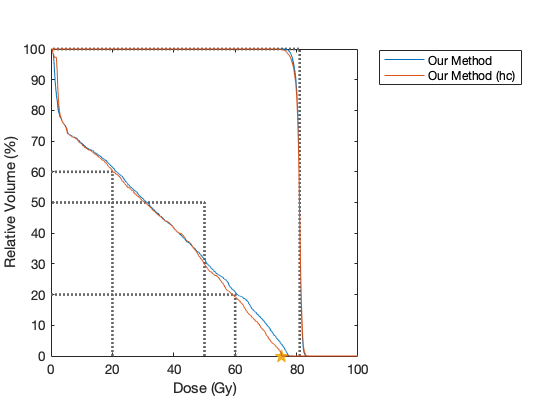

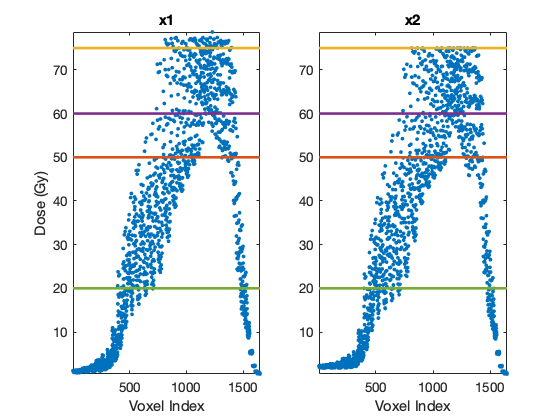

In [28]:
% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt1,rt4,rt5,rt6};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.x0 = 0*prob.x0;
prob.maxIter = 5000;

% Our Method (initialize with zeros)
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 0, obj: 2.5908e+03
iter: 1, obj: 1.7589e+02, wDiff: 1.8970e+00
iter: 2, obj: 1.2434e+02, wDiff: 5.1838e-01
iter: 3, obj: 8.9225e+01, wDiff: 3.6784e-01
iter: 4, obj: 6.5753e+01, wDiff: 2.9170e-01
iter: 5, obj: 5.0130e+01, wDiff: 2.2972e-01
iter: 6, obj: 3.9921e+01, wDiff: 1.7726e-01
iter: 7, obj: 3.3395e+01, wDiff: 1.3653e-01
iter: 8, obj: 2.9036e+01, wDiff: 1.2736e-01
iter: 9, obj: 2.5856e+01, wDiff: 1.0820e-01
iter: 10, obj: 2.3479e+01, wDiff: 9.6694e-02
iter: 11, obj: 2.1597e+01, wDiff: 8.1612e-02
iter: 12, obj: 2.0137e+01, wDiff: 7.5760e-02
iter: 13, obj: 1.8963e+01, wDiff: 5.9248e-02
iter: 14, obj: 1.8033e+01, wDiff: 5.9274e-02
iter: 15, obj: 1.7249e+01, wDiff: 6.2965e-02
iter: 16, obj: 1.6542e+01, wDiff: 5.4921e-02
iter: 17, obj: 1.5940e+01, wDiff: 4.7213e-02
iter: 18, obj: 1.5417e+01, wDiff: 4.6612e-02
iter: 19, obj: 1.4951e+01, wDiff: 4.4620e-02
iter: 20, obj: 1.4526e+01, wDiff: 4.2327e-02
iter: 21, obj: 1.4144e+01, wDiff: 4.2257e-02
iter: 22, obj: 1.3787e+01, wDiff: 3.887

iter: 181, obj: 7.1539e+00, wDiff: 4.2579e-03
iter: 182, obj: 7.1469e+00, wDiff: 4.0937e-03
iter: 183, obj: 7.1403e+00, wDiff: 3.9538e-03
iter: 184, obj: 7.1342e+00, wDiff: 3.8290e-03
iter: 185, obj: 7.1281e+00, wDiff: 6.2000e-03
iter: 186, obj: 7.1214e+00, wDiff: 6.3524e-03
iter: 187, obj: 7.1143e+00, wDiff: 6.5441e-03
iter: 188, obj: 7.1072e+00, wDiff: 4.1401e-03
iter: 189, obj: 7.1004e+00, wDiff: 4.0160e-03
iter: 190, obj: 7.0940e+00, wDiff: 3.9092e-03
iter: 191, obj: 7.0876e+00, wDiff: 6.3665e-03
iter: 192, obj: 7.0808e+00, wDiff: 4.0222e-03
iter: 193, obj: 7.0744e+00, wDiff: 6.3525e-03
iter: 194, obj: 7.0676e+00, wDiff: 4.0114e-03
iter: 195, obj: 7.0613e+00, wDiff: 3.8486e-03
iter: 196, obj: 7.0554e+00, wDiff: 6.1880e-03
iter: 197, obj: 7.0491e+00, wDiff: 6.2975e-03
iter: 198, obj: 7.0428e+00, wDiff: 3.8640e-03
iter: 199, obj: 7.0369e+00, wDiff: 3.7569e-03
iter: 200, obj: 7.0313e+00, wDiff: 3.6626e-03
iter: 201, obj: 7.0260e+00, wDiff: 3.5780e-03
iter: 202, obj: 7.0209e+00, wDiff:

iter: 359, obj: 6.5991e+00, wDiff: 1.9326e-03
iter: 360, obj: 6.5976e+00, wDiff: 1.8787e-03
iter: 361, obj: 6.5961e+00, wDiff: 4.3211e-03
iter: 362, obj: 6.5940e+00, wDiff: 4.5845e-03
iter: 363, obj: 6.5918e+00, wDiff: 2.3069e-03
iter: 364, obj: 6.5897e+00, wDiff: 2.2226e-03
iter: 365, obj: 6.5876e+00, wDiff: 4.4432e-03
iter: 366, obj: 6.5852e+00, wDiff: 2.3770e-03
iter: 367, obj: 6.5830e+00, wDiff: 2.2750e-03
iter: 368, obj: 6.5810e+00, wDiff: 2.1964e-03
iter: 369, obj: 6.5791e+00, wDiff: 4.4299e-03
iter: 370, obj: 6.5766e+00, wDiff: 2.3916e-03
iter: 371, obj: 6.5744e+00, wDiff: 4.5473e-03
iter: 372, obj: 6.5718e+00, wDiff: 2.4566e-03
iter: 373, obj: 6.5694e+00, wDiff: 4.5633e-03
iter: 374, obj: 6.5668e+00, wDiff: 2.4610e-03
iter: 375, obj: 6.5645e+00, wDiff: 2.3383e-03
iter: 376, obj: 6.5624e+00, wDiff: 2.2462e-03
iter: 377, obj: 6.5602e+00, wDiff: 4.3519e-03
iter: 378, obj: 6.5578e+00, wDiff: 2.3903e-03
iter: 379, obj: 6.5556e+00, wDiff: 2.2808e-03
iter: 380, obj: 6.5536e+00, wDiff:

iter: 537, obj: 6.1994e+00, wDiff: 2.1970e-03
iter: 538, obj: 6.1974e+00, wDiff: 3.7265e-03
iter: 539, obj: 6.1953e+00, wDiff: 2.2509e-03
iter: 540, obj: 6.1933e+00, wDiff: 3.7634e-03
iter: 541, obj: 6.1911e+00, wDiff: 2.2639e-03
iter: 542, obj: 6.1891e+00, wDiff: 2.1913e-03
iter: 543, obj: 6.1872e+00, wDiff: 2.1308e-03
iter: 544, obj: 6.1854e+00, wDiff: 3.7532e-03
iter: 545, obj: 6.1834e+00, wDiff: 2.1777e-03
iter: 546, obj: 6.1815e+00, wDiff: 2.1127e-03
iter: 547, obj: 6.1797e+00, wDiff: 2.0590e-03
iter: 548, obj: 6.1781e+00, wDiff: 2.0101e-03
iter: 549, obj: 6.1765e+00, wDiff: 1.9652e-03
iter: 550, obj: 6.1749e+00, wDiff: 1.9236e-03
iter: 551, obj: 6.1734e+00, wDiff: 1.8849e-03
iter: 552, obj: 6.1720e+00, wDiff: 1.8489e-03
iter: 553, obj: 6.1706e+00, wDiff: 1.8151e-03
iter: 554, obj: 6.1693e+00, wDiff: 3.5054e-03
iter: 555, obj: 6.1676e+00, wDiff: 3.6292e-03
iter: 556, obj: 6.1658e+00, wDiff: 2.0694e-03
iter: 557, obj: 6.1642e+00, wDiff: 2.0082e-03
iter: 558, obj: 6.1625e+00, wDiff:

iter: 715, obj: 5.9488e+00, wDiff: 3.1947e-03
iter: 716, obj: 5.9472e+00, wDiff: 1.9396e-03
iter: 717, obj: 5.9457e+00, wDiff: 1.8604e-03
iter: 718, obj: 5.9443e+00, wDiff: 1.8067e-03
iter: 719, obj: 5.9430e+00, wDiff: 1.7648e-03
iter: 720, obj: 5.9418e+00, wDiff: 1.7293e-03
iter: 721, obj: 5.9406e+00, wDiff: 1.6983e-03
iter: 722, obj: 5.9394e+00, wDiff: 1.6706e-03
iter: 723, obj: 5.9383e+00, wDiff: 1.6456e-03
iter: 724, obj: 5.9372e+00, wDiff: 3.0952e-03
iter: 725, obj: 5.9360e+00, wDiff: 1.7119e-03
iter: 726, obj: 5.9348e+00, wDiff: 1.6788e-03
iter: 727, obj: 5.9337e+00, wDiff: 3.1028e-03
iter: 728, obj: 5.9324e+00, wDiff: 1.7667e-03
iter: 729, obj: 5.9311e+00, wDiff: 1.7199e-03
iter: 730, obj: 5.9300e+00, wDiff: 1.6868e-03
iter: 731, obj: 5.9288e+00, wDiff: 3.1274e-03
iter: 732, obj: 5.9274e+00, wDiff: 1.7762e-03
iter: 733, obj: 5.9262e+00, wDiff: 1.7392e-03
iter: 734, obj: 5.9250e+00, wDiff: 1.7076e-03
iter: 735, obj: 5.9238e+00, wDiff: 1.6793e-03
iter: 736, obj: 5.9227e+00, wDiff:

iter: 893, obj: 5.7753e+00, wDiff: 2.4423e-03
iter: 894, obj: 5.7745e+00, wDiff: 1.3706e-03
iter: 895, obj: 5.7737e+00, wDiff: 2.4558e-03
iter: 896, obj: 5.7729e+00, wDiff: 1.4151e-03
iter: 897, obj: 5.7721e+00, wDiff: 1.3792e-03
iter: 898, obj: 5.7713e+00, wDiff: 1.3497e-03
iter: 899, obj: 5.7706e+00, wDiff: 1.3227e-03
iter: 900, obj: 5.7698e+00, wDiff: 2.4797e-03
iter: 901, obj: 5.7689e+00, wDiff: 2.5990e-03
iter: 902, obj: 5.7680e+00, wDiff: 1.4975e-03
iter: 903, obj: 5.7671e+00, wDiff: 1.4576e-03
iter: 904, obj: 5.7663e+00, wDiff: 1.4240e-03
iter: 905, obj: 5.7654e+00, wDiff: 2.5263e-03
iter: 906, obj: 5.7644e+00, wDiff: 1.5554e-03
iter: 907, obj: 5.7635e+00, wDiff: 1.4909e-03
iter: 908, obj: 5.7626e+00, wDiff: 1.4408e-03
iter: 909, obj: 5.7618e+00, wDiff: 1.3991e-03
iter: 910, obj: 5.7610e+00, wDiff: 1.3635e-03
iter: 911, obj: 5.7603e+00, wDiff: 1.3324e-03
iter: 912, obj: 5.7595e+00, wDiff: 1.3043e-03
iter: 913, obj: 5.7589e+00, wDiff: 1.2781e-03
iter: 914, obj: 5.7582e+00, wDiff:

iter: 1070, obj: 5.6382e+00, wDiff: 1.3036e-03
iter: 1071, obj: 5.6375e+00, wDiff: 1.2687e-03
iter: 1072, obj: 5.6369e+00, wDiff: 1.2370e-03
iter: 1073, obj: 5.6363e+00, wDiff: 1.2082e-03
iter: 1074, obj: 5.6357e+00, wDiff: 1.1816e-03
iter: 1075, obj: 5.6351e+00, wDiff: 1.1570e-03
iter: 1076, obj: 5.6346e+00, wDiff: 1.1340e-03
iter: 1077, obj: 5.6341e+00, wDiff: 2.0773e-03
iter: 1078, obj: 5.6335e+00, wDiff: 1.1878e-03
iter: 1079, obj: 5.6329e+00, wDiff: 2.0819e-03
iter: 1080, obj: 5.6323e+00, wDiff: 1.2102e-03
iter: 1081, obj: 5.6317e+00, wDiff: 1.1710e-03
iter: 1082, obj: 5.6312e+00, wDiff: 1.1403e-03
iter: 1083, obj: 5.6307e+00, wDiff: 1.1164e-03
iter: 1084, obj: 5.6302e+00, wDiff: 2.0604e-03
iter: 1085, obj: 5.6295e+00, wDiff: 1.1998e-03
iter: 1086, obj: 5.6290e+00, wDiff: 1.1668e-03
iter: 1087, obj: 5.6284e+00, wDiff: 1.1388e-03
iter: 1088, obj: 5.6279e+00, wDiff: 1.1139e-03
iter: 1089, obj: 5.6274e+00, wDiff: 2.0290e-03
iter: 1090, obj: 5.6269e+00, wDiff: 1.1374e-03
iter: 1091, o

iter: 1244, obj: 5.5493e+00, wDiff: 1.0910e-03
iter: 1245, obj: 5.5488e+00, wDiff: 1.0760e-03
iter: 1246, obj: 5.5483e+00, wDiff: 1.0625e-03
iter: 1247, obj: 5.5479e+00, wDiff: 1.0499e-03
iter: 1248, obj: 5.5474e+00, wDiff: 1.7762e-03
iter: 1249, obj: 5.5469e+00, wDiff: 1.0719e-03
iter: 1250, obj: 5.5465e+00, wDiff: 1.0556e-03
iter: 1251, obj: 5.5460e+00, wDiff: 1.7601e-03
iter: 1252, obj: 5.5455e+00, wDiff: 1.0735e-03
iter: 1253, obj: 5.5451e+00, wDiff: 1.0562e-03
iter: 1254, obj: 5.5446e+00, wDiff: 1.0417e-03
iter: 1255, obj: 5.5442e+00, wDiff: 1.7314e-03
iter: 1256, obj: 5.5437e+00, wDiff: 1.0684e-03
iter: 1257, obj: 5.5432e+00, wDiff: 1.0533e-03
iter: 1258, obj: 5.5428e+00, wDiff: 1.0398e-03
iter: 1259, obj: 5.5423e+00, wDiff: 1.7344e-03
iter: 1260, obj: 5.5419e+00, wDiff: 1.0710e-03
iter: 1261, obj: 5.5414e+00, wDiff: 1.7858e-03
iter: 1262, obj: 5.5409e+00, wDiff: 1.1270e-03
iter: 1263, obj: 5.5404e+00, wDiff: 1.1080e-03
iter: 1264, obj: 5.5399e+00, wDiff: 1.7964e-03
iter: 1265, o

iter: 1418, obj: 5.4881e+00, wDiff: 7.7648e-04
iter: 1419, obj: 5.4879e+00, wDiff: 7.6336e-04
iter: 1420, obj: 5.4876e+00, wDiff: 7.5162e-04
iter: 1421, obj: 5.4874e+00, wDiff: 1.7255e-03
iter: 1422, obj: 5.4871e+00, wDiff: 8.1554e-04
iter: 1423, obj: 5.4868e+00, wDiff: 1.7613e-03
iter: 1424, obj: 5.4865e+00, wDiff: 1.8137e-03
iter: 1425, obj: 5.4861e+00, wDiff: 9.5118e-04
iter: 1426, obj: 5.4858e+00, wDiff: 9.2564e-04
iter: 1427, obj: 5.4854e+00, wDiff: 9.0608e-04
iter: 1428, obj: 5.4851e+00, wDiff: 8.8890e-04
iter: 1429, obj: 5.4848e+00, wDiff: 8.7338e-04
iter: 1430, obj: 5.4845e+00, wDiff: 8.5902e-04
iter: 1431, obj: 5.4842e+00, wDiff: 8.4541e-04
iter: 1432, obj: 5.4839e+00, wDiff: 8.3249e-04
iter: 1433, obj: 5.4836e+00, wDiff: 8.2027e-04
iter: 1434, obj: 5.4833e+00, wDiff: 8.0875e-04
iter: 1435, obj: 5.4831e+00, wDiff: 7.9814e-04
iter: 1436, obj: 5.4828e+00, wDiff: 7.8833e-04
iter: 1437, obj: 5.4826e+00, wDiff: 7.7886e-04
iter: 1438, obj: 5.4823e+00, wDiff: 7.6971e-04
iter: 1439, o

iter: 1592, obj: 5.4417e+00, wDiff: 6.8417e-04
iter: 1593, obj: 5.4415e+00, wDiff: 6.7631e-04
iter: 1594, obj: 5.4414e+00, wDiff: 6.6903e-04
iter: 1595, obj: 5.4412e+00, wDiff: 6.6221e-04
iter: 1596, obj: 5.4410e+00, wDiff: 1.7221e-03
iter: 1597, obj: 5.4407e+00, wDiff: 7.5315e-04
iter: 1598, obj: 5.4405e+00, wDiff: 7.3541e-04
iter: 1599, obj: 5.4403e+00, wDiff: 7.2259e-04
iter: 1600, obj: 5.4401e+00, wDiff: 7.1157e-04
iter: 1601, obj: 5.4399e+00, wDiff: 7.0173e-04
iter: 1602, obj: 5.4397e+00, wDiff: 6.9192e-04
iter: 1603, obj: 5.4395e+00, wDiff: 6.8233e-04
iter: 1604, obj: 5.4393e+00, wDiff: 6.7332e-04
iter: 1605, obj: 5.4391e+00, wDiff: 6.6503e-04
iter: 1606, obj: 5.4389e+00, wDiff: 6.5713e-04
iter: 1607, obj: 5.4388e+00, wDiff: 6.4952e-04
iter: 1608, obj: 5.4386e+00, wDiff: 6.4209e-04
iter: 1609, obj: 5.4384e+00, wDiff: 6.3508e-04
iter: 1610, obj: 5.4383e+00, wDiff: 6.2844e-04
iter: 1611, obj: 5.4381e+00, wDiff: 6.2212e-04
iter: 1612, obj: 5.4380e+00, wDiff: 6.1610e-04
iter: 1613, o

iter: 1766, obj: 5.4163e+00, wDiff: 5.0008e-04
iter: 1767, obj: 5.4162e+00, wDiff: 4.8643e-04
iter: 1768, obj: 5.4161e+00, wDiff: 4.7886e-04
iter: 1769, obj: 5.4160e+00, wDiff: 4.6930e-04
iter: 1770, obj: 5.4160e+00, wDiff: 4.6870e-04
iter: 1771, obj: 5.4159e+00, wDiff: 4.6471e-04
iter: 1772, obj: 5.4158e+00, wDiff: 4.6112e-04
iter: 1773, obj: 5.4157e+00, wDiff: 4.5785e-04
iter: 1774, obj: 5.4156e+00, wDiff: 4.5481e-04
iter: 1775, obj: 5.4155e+00, wDiff: 4.5196e-04
iter: 1776, obj: 5.4154e+00, wDiff: 4.4927e-04
iter: 1777, obj: 5.4154e+00, wDiff: 4.4671e-04
iter: 1778, obj: 5.4153e+00, wDiff: 4.4427e-04
iter: 1779, obj: 5.4152e+00, wDiff: 4.4194e-04
iter: 1780, obj: 5.4151e+00, wDiff: 4.3970e-04
iter: 1781, obj: 5.4150e+00, wDiff: 4.3754e-04
iter: 1782, obj: 5.4150e+00, wDiff: 4.3547e-04
iter: 1783, obj: 5.4149e+00, wDiff: 4.3346e-04
iter: 1784, obj: 5.4148e+00, wDiff: 4.3152e-04
iter: 1785, obj: 5.4147e+00, wDiff: 1.4831e-03
iter: 1786, obj: 5.4146e+00, wDiff: 5.4652e-04
iter: 1787, o

iter: 1940, obj: 5.3914e+00, wDiff: 5.8745e-04
iter: 1941, obj: 5.3912e+00, wDiff: 5.7701e-04
iter: 1942, obj: 5.3911e+00, wDiff: 5.6746e-04
iter: 1943, obj: 5.3910e+00, wDiff: 5.5893e-04
iter: 1944, obj: 5.3909e+00, wDiff: 5.5108e-04
iter: 1945, obj: 5.3907e+00, wDiff: 5.4375e-04
iter: 1946, obj: 5.3906e+00, wDiff: 5.3674e-04
iter: 1947, obj: 5.3905e+00, wDiff: 5.3003e-04
iter: 1948, obj: 5.3904e+00, wDiff: 5.2359e-04
iter: 1949, obj: 5.3903e+00, wDiff: 1.4635e-03
iter: 1950, obj: 5.3901e+00, wDiff: 6.6164e-04
iter: 1951, obj: 5.3899e+00, wDiff: 6.3093e-04
iter: 1952, obj: 5.3898e+00, wDiff: 6.1038e-04
iter: 1953, obj: 5.3896e+00, wDiff: 1.5376e-03
iter: 1954, obj: 5.3894e+00, wDiff: 6.6867e-04
iter: 1955, obj: 5.3892e+00, wDiff: 6.4605e-04
iter: 1956, obj: 5.3891e+00, wDiff: 6.2771e-04
iter: 1957, obj: 5.3889e+00, wDiff: 6.1174e-04
iter: 1958, obj: 5.3888e+00, wDiff: 5.9746e-04
iter: 1959, obj: 5.3886e+00, wDiff: 5.8450e-04
iter: 1960, obj: 5.3885e+00, wDiff: 5.7267e-04
iter: 1961, o

iter: 2114, obj: 5.3668e+00, wDiff: 6.8218e-04
iter: 2115, obj: 5.3666e+00, wDiff: 6.7544e-04
iter: 2116, obj: 5.3664e+00, wDiff: 6.6896e-04
iter: 2117, obj: 5.3662e+00, wDiff: 6.6273e-04
iter: 2118, obj: 5.3661e+00, wDiff: 6.5676e-04
iter: 2119, obj: 5.3659e+00, wDiff: 6.5100e-04
iter: 2120, obj: 5.3657e+00, wDiff: 6.4543e-04
iter: 2121, obj: 5.3655e+00, wDiff: 6.4004e-04
iter: 2122, obj: 5.3654e+00, wDiff: 6.3482e-04
iter: 2123, obj: 5.3652e+00, wDiff: 6.2975e-04
iter: 2124, obj: 5.3651e+00, wDiff: 6.2450e-04
iter: 2125, obj: 5.3649e+00, wDiff: 6.1906e-04
iter: 2126, obj: 5.3647e+00, wDiff: 6.1369e-04
iter: 2127, obj: 5.3646e+00, wDiff: 6.0842e-04
iter: 2128, obj: 5.3644e+00, wDiff: 6.0331e-04
iter: 2129, obj: 5.3643e+00, wDiff: 5.9836e-04
iter: 2130, obj: 5.3641e+00, wDiff: 8.3783e-04
iter: 2131, obj: 5.3640e+00, wDiff: 5.8918e-04
iter: 2132, obj: 5.3638e+00, wDiff: 5.8457e-04
iter: 2133, obj: 5.3637e+00, wDiff: 5.8012e-04
iter: 2134, obj: 5.3636e+00, wDiff: 5.7581e-04
iter: 2135, o

iter: 2288, obj: 5.3430e+00, wDiff: 7.0023e-04
iter: 2289, obj: 5.3428e+00, wDiff: 6.8113e-04
iter: 2290, obj: 5.3426e+00, wDiff: 6.6531e-04
iter: 2291, obj: 5.3425e+00, wDiff: 6.4927e-04
iter: 2292, obj: 5.3423e+00, wDiff: 6.3710e-04
iter: 2293, obj: 5.3421e+00, wDiff: 6.2616e-04
iter: 2294, obj: 5.3420e+00, wDiff: 6.1622e-04
iter: 2295, obj: 5.3418e+00, wDiff: 6.0998e-04
iter: 2296, obj: 5.3417e+00, wDiff: 1.4289e-03
iter: 2297, obj: 5.3415e+00, wDiff: 6.8070e-04
iter: 2298, obj: 5.3413e+00, wDiff: 6.6521e-04
iter: 2299, obj: 5.3411e+00, wDiff: 6.5391e-04
iter: 2300, obj: 5.3409e+00, wDiff: 6.4463e-04
iter: 2301, obj: 5.3408e+00, wDiff: 6.3659e-04
iter: 2302, obj: 5.3406e+00, wDiff: 6.2938e-04
iter: 2303, obj: 5.3405e+00, wDiff: 6.2276e-04
iter: 2304, obj: 5.3403e+00, wDiff: 1.4240e-03
iter: 2305, obj: 5.3401e+00, wDiff: 6.8364e-04
iter: 2306, obj: 5.3399e+00, wDiff: 1.4531e-03
iter: 2307, obj: 5.3396e+00, wDiff: 7.6763e-04
iter: 2308, obj: 5.3394e+00, wDiff: 7.4140e-04
iter: 2309, o

iter: 2462, obj: 5.3125e+00, wDiff: 1.3730e-03
iter: 2463, obj: 5.3123e+00, wDiff: 7.4113e-04
iter: 2464, obj: 5.3121e+00, wDiff: 7.2212e-04
iter: 2465, obj: 5.3119e+00, wDiff: 7.0773e-04
iter: 2466, obj: 5.3117e+00, wDiff: 6.9512e-04
iter: 2467, obj: 5.3115e+00, wDiff: 6.8304e-04
iter: 2468, obj: 5.3113e+00, wDiff: 6.7266e-04
iter: 2469, obj: 5.3111e+00, wDiff: 6.6307e-04
iter: 2470, obj: 5.3109e+00, wDiff: 6.5413e-04
iter: 2471, obj: 5.3107e+00, wDiff: 1.3506e-03
iter: 2472, obj: 5.3105e+00, wDiff: 6.9944e-04
iter: 2473, obj: 5.3103e+00, wDiff: 6.8603e-04
iter: 2474, obj: 5.3102e+00, wDiff: 6.7524e-04
iter: 2475, obj: 5.3100e+00, wDiff: 6.6639e-04
iter: 2476, obj: 5.3098e+00, wDiff: 6.5815e-04
iter: 2477, obj: 5.3096e+00, wDiff: 1.3583e-03
iter: 2478, obj: 5.3094e+00, wDiff: 7.1578e-04
iter: 2479, obj: 5.3092e+00, wDiff: 7.0378e-04
iter: 2480, obj: 5.3090e+00, wDiff: 6.9374e-04
iter: 2481, obj: 5.3088e+00, wDiff: 6.8454e-04
iter: 2482, obj: 5.3086e+00, wDiff: 6.7588e-04
iter: 2483, o

iter: 2636, obj: 5.2778e+00, wDiff: 1.3224e-03
iter: 2637, obj: 5.2775e+00, wDiff: 7.8913e-04
iter: 2638, obj: 5.2773e+00, wDiff: 7.7172e-04
iter: 2639, obj: 5.2770e+00, wDiff: 7.5698e-04
iter: 2640, obj: 5.2768e+00, wDiff: 7.4382e-04
iter: 2641, obj: 5.2766e+00, wDiff: 1.3225e-03
iter: 2642, obj: 5.2763e+00, wDiff: 7.6350e-04
iter: 2643, obj: 5.2761e+00, wDiff: 7.4926e-04
iter: 2644, obj: 5.2759e+00, wDiff: 7.3721e-04
iter: 2645, obj: 5.2756e+00, wDiff: 7.2558e-04
iter: 2646, obj: 5.2754e+00, wDiff: 7.1458e-04
iter: 2647, obj: 5.2752e+00, wDiff: 7.1385e-04
iter: 2648, obj: 5.2750e+00, wDiff: 6.9442e-04
iter: 2649, obj: 5.2748e+00, wDiff: 6.8508e-04
iter: 2650, obj: 5.2746e+00, wDiff: 6.7613e-04
iter: 2651, obj: 5.2745e+00, wDiff: 6.6766e-04
iter: 2652, obj: 5.2743e+00, wDiff: 1.2228e-03
iter: 2653, obj: 5.2741e+00, wDiff: 6.9833e-04
iter: 2654, obj: 5.2739e+00, wDiff: 6.8660e-04
iter: 2655, obj: 5.2737e+00, wDiff: 6.7673e-04
iter: 2656, obj: 5.2735e+00, wDiff: 6.6776e-04
iter: 2657, o

iter: 2810, obj: 5.2455e+00, wDiff: 5.4945e-04
iter: 2811, obj: 5.2454e+00, wDiff: 5.4340e-04
iter: 2812, obj: 5.2453e+00, wDiff: 5.3735e-04
iter: 2813, obj: 5.2452e+00, wDiff: 5.3140e-04
iter: 2814, obj: 5.2450e+00, wDiff: 1.0552e-03
iter: 2815, obj: 5.2449e+00, wDiff: 1.0849e-03
iter: 2816, obj: 5.2448e+00, wDiff: 6.1192e-04
iter: 2817, obj: 5.2446e+00, wDiff: 5.9423e-04
iter: 2818, obj: 5.2445e+00, wDiff: 5.8114e-04
iter: 2819, obj: 5.2443e+00, wDiff: 5.7012e-04
iter: 2820, obj: 5.2442e+00, wDiff: 5.6034e-04
iter: 2821, obj: 5.2441e+00, wDiff: 5.5203e-04
iter: 2822, obj: 5.2439e+00, wDiff: 5.4384e-04
iter: 2823, obj: 5.2438e+00, wDiff: 5.3625e-04
iter: 2824, obj: 5.2437e+00, wDiff: 5.2916e-04
iter: 2825, obj: 5.2436e+00, wDiff: 1.0580e-03
iter: 2826, obj: 5.2435e+00, wDiff: 1.0888e-03
iter: 2827, obj: 5.2433e+00, wDiff: 6.1643e-04
iter: 2828, obj: 5.2431e+00, wDiff: 6.0138e-04
iter: 2829, obj: 5.2430e+00, wDiff: 5.8870e-04
iter: 2830, obj: 5.2429e+00, wDiff: 1.0632e-03
iter: 2831, o

iter: 2984, obj: 5.2216e+00, wDiff: 4.5285e-04
iter: 2985, obj: 5.2215e+00, wDiff: 4.5083e-04
iter: 2986, obj: 5.2214e+00, wDiff: 4.4881e-04
iter: 2987, obj: 5.2213e+00, wDiff: 4.4678e-04
iter: 2988, obj: 5.2212e+00, wDiff: 4.4479e-04
iter: 2989, obj: 5.2211e+00, wDiff: 4.4283e-04
iter: 2990, obj: 5.2211e+00, wDiff: 4.4091e-04
iter: 2991, obj: 5.2210e+00, wDiff: 4.3901e-04
iter: 2992, obj: 5.2209e+00, wDiff: 4.3714e-04
iter: 2993, obj: 5.2208e+00, wDiff: 4.3530e-04
iter: 2994, obj: 5.2208e+00, wDiff: 4.3348e-04
iter: 2995, obj: 5.2207e+00, wDiff: 4.3169e-04
iter: 2996, obj: 5.2206e+00, wDiff: 4.2993e-04
iter: 2997, obj: 5.2205e+00, wDiff: 4.2809e-04
iter: 2998, obj: 5.2204e+00, wDiff: 4.2621e-04
iter: 2999, obj: 5.2204e+00, wDiff: 4.2429e-04
iter: 3000, obj: 5.2203e+00, wDiff: 4.2240e-04
iter: 3001, obj: 5.2202e+00, wDiff: 4.2053e-04
iter: 3002, obj: 5.2202e+00, wDiff: 4.1865e-04
iter: 3003, obj: 5.2201e+00, wDiff: 4.1678e-04
iter: 3004, obj: 5.2200e+00, wDiff: 4.1494e-04
iter: 3005, o

iter: 3158, obj: 5.2118e+00, wDiff: 3.0577e-04
iter: 3159, obj: 5.2118e+00, wDiff: 3.0480e-04
iter: 3160, obj: 5.2117e+00, wDiff: 3.0385e-04
iter: 3161, obj: 5.2117e+00, wDiff: 3.0292e-04
iter: 3162, obj: 5.2117e+00, wDiff: 7.5451e-04
iter: 3163, obj: 5.2116e+00, wDiff: 3.3819e-04
iter: 3164, obj: 5.2116e+00, wDiff: 3.3151e-04
iter: 3165, obj: 5.2115e+00, wDiff: 3.2780e-04
iter: 3166, obj: 5.2115e+00, wDiff: 3.2499e-04
iter: 3167, obj: 5.2114e+00, wDiff: 3.2262e-04
iter: 3168, obj: 5.2114e+00, wDiff: 3.2053e-04
iter: 3169, obj: 5.2114e+00, wDiff: 3.1865e-04
iter: 3170, obj: 5.2113e+00, wDiff: 3.1693e-04
iter: 3171, obj: 5.2113e+00, wDiff: 3.1534e-04
iter: 3172, obj: 5.2112e+00, wDiff: 3.1386e-04
iter: 3173, obj: 5.2112e+00, wDiff: 3.1247e-04
iter: 3174, obj: 5.2112e+00, wDiff: 3.1116e-04
iter: 3175, obj: 5.2111e+00, wDiff: 3.0991e-04
iter: 3176, obj: 5.2111e+00, wDiff: 3.0872e-04
iter: 3177, obj: 5.2110e+00, wDiff: 3.0759e-04
iter: 3178, obj: 5.2110e+00, wDiff: 3.0650e-04
iter: 3179, o

iter: 3332, obj: 5.2080e+00, wDiff: 2.4599e-04
iter: 3333, obj: 5.2080e+00, wDiff: 2.4548e-04
iter: 3334, obj: 5.2080e+00, wDiff: 2.4497e-04
iter: 3335, obj: 5.2079e+00, wDiff: 2.4447e-04
iter: 3336, obj: 5.2079e+00, wDiff: 2.4398e-04
iter: 3337, obj: 5.2079e+00, wDiff: 2.4345e-04
iter: 3338, obj: 5.2079e+00, wDiff: 2.4290e-04
iter: 3339, obj: 5.2078e+00, wDiff: 2.4235e-04
iter: 3340, obj: 5.2078e+00, wDiff: 2.4181e-04
iter: 3341, obj: 5.2078e+00, wDiff: 2.4127e-04
iter: 3342, obj: 5.2078e+00, wDiff: 2.4074e-04
iter: 3343, obj: 5.2077e+00, wDiff: 2.4021e-04
iter: 3344, obj: 5.2077e+00, wDiff: 2.3968e-04
iter: 3345, obj: 5.2077e+00, wDiff: 2.3916e-04
iter: 3346, obj: 5.2077e+00, wDiff: 2.3864e-04
iter: 3347, obj: 5.2076e+00, wDiff: 2.3813e-04
iter: 3348, obj: 5.2076e+00, wDiff: 2.3761e-04
iter: 3349, obj: 5.2076e+00, wDiff: 2.3711e-04
iter: 3350, obj: 5.2076e+00, wDiff: 2.3660e-04
iter: 3351, obj: 5.2076e+00, wDiff: 1.3616e-04
iter: 3352, obj: 5.2075e+00, wDiff: 1.4297e-04
iter: 3353, o

iter: 3506, obj: 5.2047e+00, wDiff: 1.9271e-04
iter: 3507, obj: 5.2047e+00, wDiff: 1.9223e-04
iter: 3508, obj: 5.2047e+00, wDiff: 1.9175e-04
iter: 3509, obj: 5.2047e+00, wDiff: 1.9128e-04
iter: 3510, obj: 5.2046e+00, wDiff: 1.9082e-04
iter: 3511, obj: 5.2046e+00, wDiff: 1.9037e-04
iter: 3512, obj: 5.2046e+00, wDiff: 1.8992e-04
iter: 3513, obj: 5.2046e+00, wDiff: 1.8948e-04
iter: 3514, obj: 5.2046e+00, wDiff: 1.8905e-04
iter: 3515, obj: 5.2046e+00, wDiff: 1.8863e-04
iter: 3516, obj: 5.2046e+00, wDiff: 1.8821e-04
iter: 3517, obj: 5.2045e+00, wDiff: 1.8780e-04
iter: 3518, obj: 5.2045e+00, wDiff: 1.8740e-04
iter: 3519, obj: 5.2045e+00, wDiff: 1.8700e-04
iter: 3520, obj: 5.2045e+00, wDiff: 1.8660e-04
iter: 3521, obj: 5.2045e+00, wDiff: 1.8621e-04
iter: 3522, obj: 5.2045e+00, wDiff: 1.8583e-04
iter: 3523, obj: 5.2045e+00, wDiff: 1.8545e-04
iter: 3524, obj: 5.2044e+00, wDiff: 1.8508e-04
iter: 3525, obj: 5.2044e+00, wDiff: 1.8471e-04
iter: 3526, obj: 5.2044e+00, wDiff: 1.8434e-04
iter: 3527, o

iter: 3680, obj: 5.2027e+00, wDiff: 1.5306e-04
iter: 3681, obj: 5.2027e+00, wDiff: 1.5285e-04
iter: 3682, obj: 5.2027e+00, wDiff: 1.5264e-04
iter: 3683, obj: 5.2026e+00, wDiff: 1.5244e-04
iter: 3684, obj: 5.2026e+00, wDiff: 1.5224e-04
iter: 3685, obj: 5.2026e+00, wDiff: 1.5204e-04
iter: 3686, obj: 5.2026e+00, wDiff: 1.5184e-04
iter: 3687, obj: 5.2026e+00, wDiff: 1.5165e-04
iter: 3688, obj: 5.2026e+00, wDiff: 1.5146e-04
iter: 3689, obj: 5.2026e+00, wDiff: 1.5126e-04
iter: 3690, obj: 5.2026e+00, wDiff: 1.5107e-04
iter: 3691, obj: 5.2026e+00, wDiff: 1.5088e-04
iter: 3692, obj: 5.2026e+00, wDiff: 1.5070e-04
iter: 3693, obj: 5.2026e+00, wDiff: 1.5051e-04
iter: 3694, obj: 5.2025e+00, wDiff: 1.3681e-03
iter: 3695, obj: 5.2025e+00, wDiff: 2.7705e-04
iter: 3696, obj: 5.2025e+00, wDiff: 2.5950e-04
iter: 3697, obj: 5.2025e+00, wDiff: 2.4977e-04
iter: 3698, obj: 5.2024e+00, wDiff: 2.4218e-04
iter: 3699, obj: 5.2024e+00, wDiff: 2.3562e-04
iter: 3700, obj: 5.2024e+00, wDiff: 2.2977e-04
iter: 3701, o

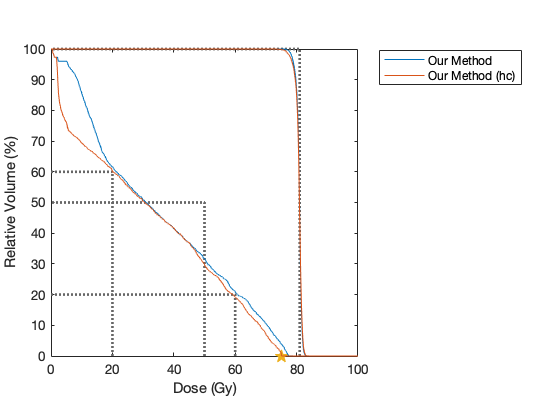

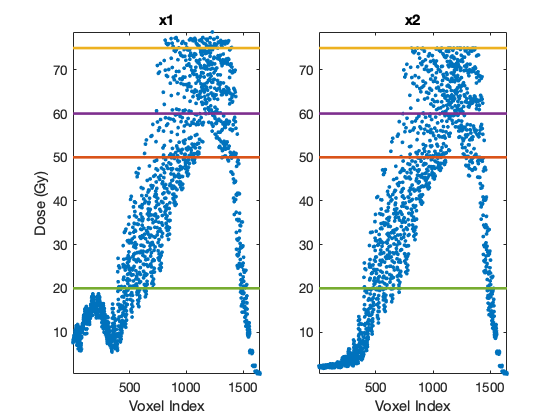

In [45]:
% Create problem instance (Zhang initialization)
prostate.terms = {pt1};
rectum.terms = {rt1,rt4,rt5,rt6};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.maxIter = 5000;

% Our Method
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 1, obj: 4.8733e+00, uDiff: 6.0869e-12

Zhang Method
Time: 
Structure: PTV_68
* unif | 76.00 | 80.88 | 80.96 | 79.65 | 83.39 | 0.65 | 54.44
Structure: Rectum
* udvc | 56.80 | 4333.84
* udvc | 13.41 | 4333.84
* udvc | 38.47 | 4333.84
* udvc | 68.81 | 4333.84

Zhang Method (hc)
Time: 30.46
Structure: PTV_68
* unif | 73.17 | 80.76 | 80.93 | 78.66 | 84.84 | 1.10 | 92.58
Structure: Rectum
* udvc | 31.92 | 3279.43
* udvc | 0.00 | 3279.43
* udvc | 18.33 | 3279.43
* udvc | 59.41 | 3279.43


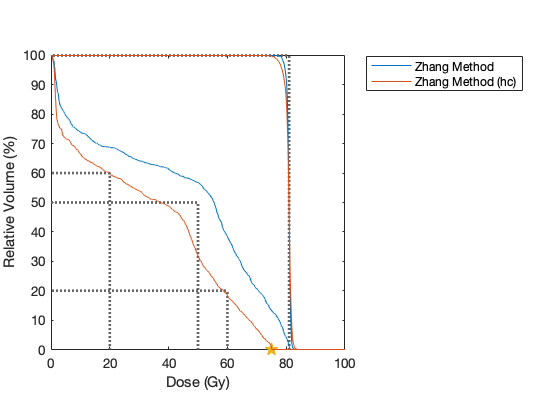

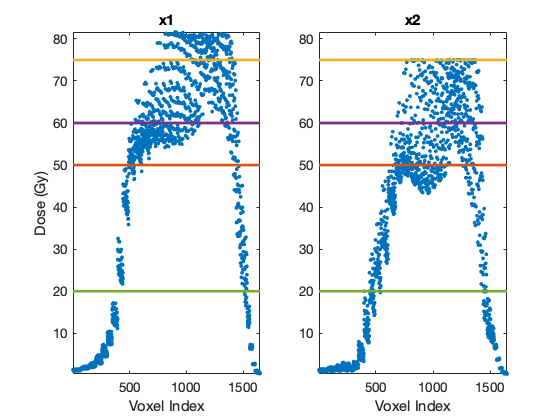

In [35]:
% Equivalent to constraint generation

% Create problem instance
prostate.terms = {pt1};
rectum.terms = {rt1,rt4,rt5,rt6};
structs = {prostate,rectum};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Zhang Method (initialize with PTV solution)
prob.slackDose(); 
x1a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Zhang Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Zhang Method','Zhang Method (hc)'}) 

Time
* Our Method (PTV): **95.06** seconds = 1.6 minutes
* Our Method (mid): 1338.27
* Our Method (OAR): 950.51 seconds
* Zhang Method (mid): 6932.16 seconds = 115.5 minutes = 1.9 hours
* Our Method (PTV, hc): 25.23 seconds = 0.4 minutes
* Our Method (mid, hc): **25.21** seconds
* Our Method (OAR, hc): 29.49 seconds
* Zhang Method (mid, hc): 26.34 seconds = 0.4 minutes

Structure: PTV_68

Method | Min | Something | Something | Something | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Our Method (PTV) | 75.28 | 80.82 | 80.94 | 79.03 | 83.70 | 0.88 | 74.16
Our Method (mid) | 75.67 | 80.82 | 80.94 | 79.07 | 83.70 | 0.88 | **73.73**
Our Method (OAR) | 75.65 | 80.82 | 80.94 | 79.05 | 83.77 | 0.88 | 73.89
Zhang Method (mid) | 75.69 | 80.82 | 80.93 | 79.07 | 83.70 | 0.89 | 74.84
Our Method (PTV, hc) | 73.06 | 80.77 | 80.93 | 78.72 | 83.85 | 1.07 | 90.47
Our Method (mid, hc) | 73.20 | 80.77 | 80.93 | 78.72 | 83.74 | 1.06 | **89.64**
Our Method (OAR, hc) | 73.19 | 80.77 | 80.93 | 78.71 | 83.75 | 1.07 | 89.87
Zhang Method (mid, hc) | 73.34 | 80.77 | 80.93 | 78.73 | 83.82 | 1.07 | 90.20

Structure: Rectum

Method | % > 75 | % > 60 | % > 50 | % > 20 | Area
-|-|-|-|-|-
Our Method (PTV) | 3.94 | 21.66 | 46.78 | 61.41 | 3606.73
Our Method (mid) | 4.07 | 20.87 | 31.67 | 61.65 | 3518.45
Our Method (OAR) | 4.00 | 20.87| 31.61| 61.47 | 3287.52
Zhang Method (mid) | 3.82 | 20.21 | 28.16 | 61.71 | **3180.13**
Our Method (PTV, hc) | 0.00 | 19.17 | 37.08 | 59.95 | 3401.83
Our Method (mid, hc) | 0.00 | 19.11 | 29.79 | 59.95 | 3221.90
Our Method (OAR, hc) | 0.00 | 19.17 | 29.85 | 59.95 | 3215.78
Zhang Method (mid, hc) | 0.00 | 18.63 | 27.55 | 59.83 | **3089.78**


Our Method
Time: 90.87
Structure: PTV_68
* unif | 66.95 | 80.53 | 80.93 | 76.73 | 85.97 | 1.94 | 164.61
Structure: Rectum
* udvc | 57.04 | 5164.80
Structure: Bladder
* udvc | 35.76 | 3304.57
Structure: PTV_56
* unif | 50.99 | 60.19 | 59.98 | 57.79 | 75.15 | 2.09 | 191.30

Our Method (hc)
Time: 38.29
Structure: PTV_68
* unif | 66.53 | 80.52 | 80.93 | 76.64 | 86.06 | 1.97 | 166.68
Structure: Rectum
* udvc | 50.00 | 5097.80
Structure: Bladder
* udvc | 29.99 | 3007.40
Structure: PTV_56
* unif | 48.73 | 60.15 | 59.97 | 57.46 | 75.35 | 2.19 | 200.20
iter: 1, obj: 4.3577e+01, uDiff: 9.3874e-02
iter: 2, obj: 2.4486e+01, uDiff: 4.6557e-02
iter: 3, obj: 1.9723e+01, uDiff: 3.2787e-02
iter: 4, obj: 1.7416e+01, uDiff: 2.5383e-02
iter: 5, obj: 1.6054e+01, uDiff: 2.1036e-02
iter: 6, obj: 1.5141e+01, uDiff: 1.8128e-02
iter: 7, obj: 1.4480e+01, uDiff: 1.5941e-02
iter: 8, obj: 1.3981e+01, uDiff: 1.4185e-02
iter: 9, obj: 1.3606e+01, uDiff: 1.2486e-02
iter: 10, obj: 1.3334e+01, uDiff: 1.0981e-02
iter: 11

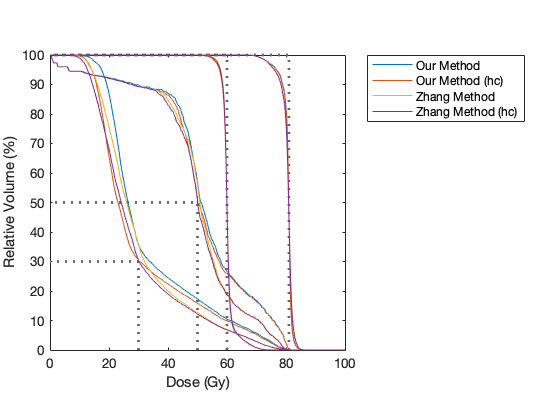

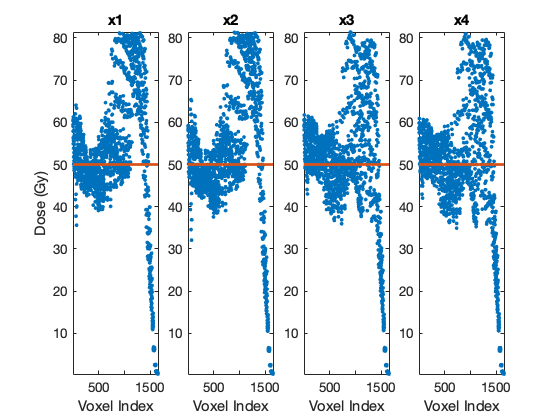

In [13]:
% Example 4.3

% Create problem instance
prostate.terms = {pt1};
nodes.terms = {nt1};
rectum.terms = {rt1};
bladder.terms = {bt1};
structs = {prostate,rectum,bladder,nodes};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Our Method
prob.calcBeams(false); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Zhang Method
prob.slackDose(); 
x2a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x2a);

% Zhang Method (hc)
prob.constGen(x2a); 
x2b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('Time: %.2f\n',prob.time);
prob.printStats(x2b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b,x2a,x2b])
prob.compareDVH([x1a,x1b,x2a,x2b],{'Our Method','Our Method (hc)','Zhang Method','Zhang Method (hc)'}) 

iter: 0, obj: 5.0805e+03
iter: 1, obj: 1.4730e+02, wDiff: 4.0638e-01
iter: 2, obj: 6.9562e+01, wDiff: 1.6693e-01
iter: 3, obj: 4.7576e+01, wDiff: 9.8444e-02
iter: 4, obj: 3.7798e+01, wDiff: 6.9640e-02
iter: 5, obj: 3.2328e+01, wDiff: 5.3940e-02
iter: 6, obj: 2.8849e+01, wDiff: 4.4066e-02
iter: 7, obj: 2.6415e+01, wDiff: 3.7514e-02
iter: 8, obj: 2.4602e+01, wDiff: 3.2751e-02
iter: 9, obj: 2.3191e+01, wDiff: 2.9135e-02
iter: 10, obj: 2.2055e+01, wDiff: 2.6294e-02
iter: 11, obj: 2.1121e+01, wDiff: 2.3957e-02
iter: 12, obj: 2.0334e+01, wDiff: 2.2056e-02
iter: 13, obj: 1.9660e+01, wDiff: 2.0462e-02
iter: 14, obj: 1.9075e+01, wDiff: 1.9120e-02
iter: 15, obj: 1.8560e+01, wDiff: 1.7961e-02
iter: 16, obj: 1.8104e+01, wDiff: 1.6955e-02
iter: 17, obj: 1.7695e+01, wDiff: 1.6084e-02
iter: 18, obj: 1.7325e+01, wDiff: 1.5304e-02
iter: 19, obj: 1.6991e+01, wDiff: 1.4593e-02
iter: 20, obj: 1.6686e+01, wDiff: 1.3938e-02
iter: 21, obj: 1.6408e+01, wDiff: 1.3320e-02
iter: 22, obj: 1.6154e+01, wDiff: 1.275

iter: 181, obj: 1.1666e+01, wDiff: 2.1687e-03
iter: 182, obj: 1.1662e+01, wDiff: 2.1601e-03
iter: 183, obj: 1.1657e+01, wDiff: 2.1489e-03
iter: 184, obj: 1.1653e+01, wDiff: 2.3588e-03
iter: 185, obj: 1.1648e+01, wDiff: 2.1441e-03
iter: 186, obj: 1.1643e+01, wDiff: 2.3499e-03
iter: 187, obj: 1.1639e+01, wDiff: 2.3430e-03
iter: 188, obj: 1.1634e+01, wDiff: 2.3387e-03
iter: 189, obj: 1.1630e+01, wDiff: 1.8032e-03
iter: 190, obj: 1.1625e+01, wDiff: 2.1110e-03
iter: 191, obj: 1.1621e+01, wDiff: 1.7459e-03
iter: 192, obj: 1.1616e+01, wDiff: 2.0862e-03
iter: 193, obj: 1.1612e+01, wDiff: 1.7162e-03
iter: 194, obj: 1.1608e+01, wDiff: 2.0692e-03
iter: 195, obj: 1.1604e+01, wDiff: 2.0657e-03
iter: 196, obj: 1.1600e+01, wDiff: 2.2818e-03
iter: 197, obj: 1.1596e+01, wDiff: 2.0604e-03
iter: 198, obj: 1.1592e+01, wDiff: 2.0522e-03
iter: 199, obj: 1.1588e+01, wDiff: 2.0362e-03
iter: 200, obj: 1.1584e+01, wDiff: 2.0256e-03
iter: 201, obj: 1.1580e+01, wDiff: 2.0226e-03
iter: 202, obj: 1.1576e+01, wDiff:

iter: 359, obj: 1.1292e+01, wDiff: 9.9105e-04
iter: 360, obj: 1.1292e+01, wDiff: 5.4799e-04
iter: 361, obj: 1.1291e+01, wDiff: 5.3373e-04
iter: 362, obj: 1.1291e+01, wDiff: 5.2314e-04
iter: 363, obj: 1.1290e+01, wDiff: 5.1433e-04
iter: 364, obj: 1.1290e+01, wDiff: 9.6294e-04
iter: 365, obj: 1.1290e+01, wDiff: 5.3054e-04
iter: 366, obj: 1.1289e+01, wDiff: 5.1048e-04
iter: 367, obj: 1.1289e+01, wDiff: 4.9830e-04
iter: 368, obj: 1.1289e+01, wDiff: 4.8877e-04
iter: 369, obj: 1.1288e+01, wDiff: 4.8050e-04
iter: 370, obj: 1.1288e+01, wDiff: 4.7305e-04
iter: 371, obj: 1.1288e+01, wDiff: 4.6584e-04
iter: 372, obj: 1.1287e+01, wDiff: 4.5889e-04
iter: 373, obj: 1.1287e+01, wDiff: 4.5199e-04
iter: 374, obj: 1.1287e+01, wDiff: 4.4488e-04
iter: 375, obj: 1.1286e+01, wDiff: 4.3871e-04
iter: 376, obj: 1.1286e+01, wDiff: 4.3281e-04
iter: 377, obj: 1.1286e+01, wDiff: 4.2714e-04
iter: 378, obj: 1.1286e+01, wDiff: 4.2168e-04
iter: 379, obj: 1.1285e+01, wDiff: 1.4669e-03
iter: 380, obj: 1.1285e+01, wDiff:

iter: 537, obj: 1.1261e+01, wDiff: 1.0326e-04
iter: 538, obj: 1.1261e+01, wDiff: 1.0219e-04
iter: 539, obj: 1.1261e+01, wDiff: 1.1324e-04
iter: 540, obj: 1.1261e+01, wDiff: 1.0003e-04
iter: 541, obj: 1.1261e+01, wDiff: 9.8973e-05
iter: 542, obj: 1.1261e+01, wDiff: 9.7956e-05
iter: 543, obj: 1.1261e+01, wDiff: 9.6959e-05
iter: 544, obj: 1.1261e+01, wDiff: 9.5978e-05
iter: 545, obj: 1.1261e+01, wDiff: 9.5015e-05
iter: 546, obj: 1.1261e+01, wDiff: 9.4072e-05
iter: 547, obj: 1.1261e+01, wDiff: 9.3152e-05
iter: 548, obj: 1.1261e+01, wDiff: 9.2254e-05
iter: 549, obj: 1.1261e+01, wDiff: 9.1374e-05
iter: 550, obj: 1.1261e+01, wDiff: 9.0510e-05
iter: 551, obj: 1.1261e+01, wDiff: 8.9659e-05
iter: 552, obj: 1.1261e+01, wDiff: 8.8822e-05
iter: 553, obj: 1.1261e+01, wDiff: 8.7998e-05
iter: 554, obj: 1.1261e+01, wDiff: 8.7185e-05
iter: 555, obj: 1.1261e+01, wDiff: 8.6383e-05
iter: 556, obj: 1.1261e+01, wDiff: 8.5593e-05
iter: 557, obj: 1.1261e+01, wDiff: 8.4813e-05
iter: 558, obj: 1.1261e+01, wDiff:

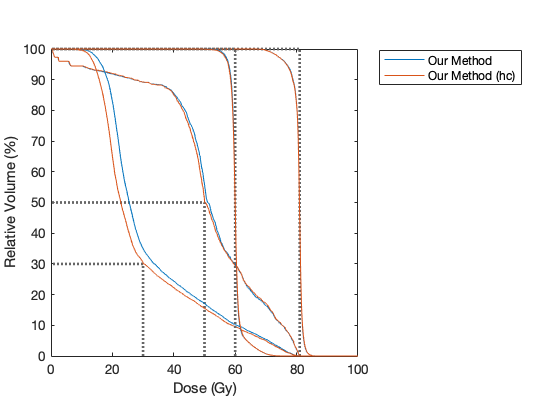

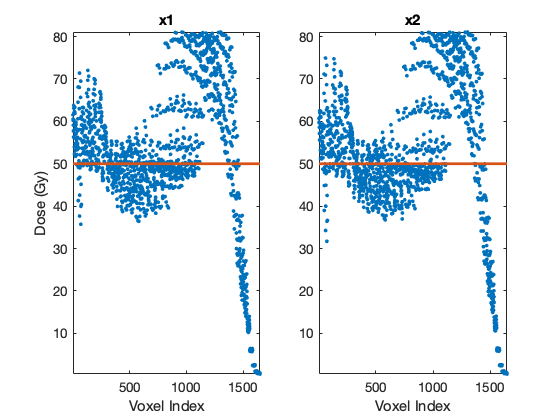

In [29]:
% Create problem instance
prostate.terms = {pt1};
nodes.terms = {nt1};
rectum.terms = {rt1};
bladder.terms = {bt1};
structs = {prostate,rectum,bladder,nodes};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.x0 = 0*prob.x0;
prob.maxIter = 5000;

% Our Method (initialize with zeros)
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 0, obj: 4.6275e+02
iter: 1, obj: 3.2113e+01, wDiff: 3.0679e-01
iter: 2, obj: 2.2170e+01, wDiff: 5.4952e-02
iter: 3, obj: 1.8754e+01, wDiff: 3.6824e-02
iter: 4, obj: 1.6914e+01, wDiff: 2.8358e-02
iter: 5, obj: 1.5754e+01, wDiff: 2.3283e-02
iter: 6, obj: 1.4951e+01, wDiff: 1.9857e-02
iter: 7, obj: 1.4359e+01, wDiff: 1.7376e-02
iter: 8, obj: 1.3907e+01, wDiff: 1.5440e-02
iter: 9, obj: 1.3555e+01, wDiff: 1.3926e-02
iter: 10, obj: 1.3272e+01, wDiff: 1.2684e-02
iter: 11, obj: 1.3041e+01, wDiff: 1.1490e-02
iter: 12, obj: 1.2852e+01, wDiff: 1.0714e-02
iter: 13, obj: 1.2695e+01, wDiff: 9.8736e-03
iter: 14, obj: 1.2562e+01, wDiff: 9.1226e-03
iter: 15, obj: 1.2450e+01, wDiff: 8.5391e-03
iter: 16, obj: 1.2353e+01, wDiff: 8.0597e-03
iter: 17, obj: 1.2268e+01, wDiff: 7.6762e-03
iter: 18, obj: 1.2192e+01, wDiff: 7.2106e-03
iter: 19, obj: 1.2126e+01, wDiff: 6.9618e-03
iter: 20, obj: 1.2067e+01, wDiff: 6.1599e-03
iter: 21, obj: 1.2018e+01, wDiff: 6.1657e-03
iter: 22, obj: 1.1974e+01, wDiff: 5.688

iter: 181, obj: 1.1304e+01, wDiff: 9.5054e-04
iter: 182, obj: 1.1304e+01, wDiff: 4.7589e-04
iter: 183, obj: 1.1304e+01, wDiff: 9.5014e-04
iter: 184, obj: 1.1303e+01, wDiff: 4.9795e-04
iter: 185, obj: 1.1303e+01, wDiff: 4.7364e-04
iter: 186, obj: 1.1303e+01, wDiff: 4.6016e-04
iter: 187, obj: 1.1302e+01, wDiff: 4.5036e-04
iter: 188, obj: 1.1302e+01, wDiff: 4.4176e-04
iter: 189, obj: 1.1302e+01, wDiff: 4.3390e-04
iter: 190, obj: 1.1302e+01, wDiff: 4.2656e-04
iter: 191, obj: 1.1301e+01, wDiff: 9.2801e-04
iter: 192, obj: 1.1301e+01, wDiff: 4.7598e-04
iter: 193, obj: 1.1301e+01, wDiff: 4.5515e-04
iter: 194, obj: 1.1301e+01, wDiff: 4.4172e-04
iter: 195, obj: 1.1300e+01, wDiff: 4.3109e-04
iter: 196, obj: 1.1300e+01, wDiff: 4.2169e-04
iter: 197, obj: 1.1300e+01, wDiff: 4.1310e-04
iter: 198, obj: 1.1300e+01, wDiff: 4.0511e-04
iter: 199, obj: 1.1299e+01, wDiff: 3.9760e-04
iter: 200, obj: 1.1299e+01, wDiff: 3.9048e-04
iter: 201, obj: 1.1299e+01, wDiff: 3.8370e-04
iter: 202, obj: 1.1299e+01, wDiff:

iter: 359, obj: 1.1275e+01, wDiff: 2.2909e-04
iter: 360, obj: 1.1275e+01, wDiff: 2.1926e-04
iter: 361, obj: 1.1275e+01, wDiff: 2.1123e-04
iter: 362, obj: 1.1275e+01, wDiff: 2.0453e-04
iter: 363, obj: 1.1275e+01, wDiff: 1.9883e-04
iter: 364, obj: 1.1275e+01, wDiff: 1.9390e-04
iter: 365, obj: 1.1275e+01, wDiff: 1.8956e-04
iter: 366, obj: 1.1275e+01, wDiff: 1.8571e-04
iter: 367, obj: 1.1275e+01, wDiff: 1.8224e-04
iter: 368, obj: 1.1275e+01, wDiff: 1.7910e-04
iter: 369, obj: 1.1275e+01, wDiff: 1.7619e-04
iter: 370, obj: 1.1275e+01, wDiff: 1.7351e-04
iter: 371, obj: 1.1275e+01, wDiff: 1.7102e-04
iter: 372, obj: 1.1275e+01, wDiff: 1.6872e-04
iter: 373, obj: 1.1275e+01, wDiff: 1.6657e-04
iter: 374, obj: 1.1274e+01, wDiff: 1.6454e-04
iter: 375, obj: 1.1274e+01, wDiff: 1.6263e-04
iter: 376, obj: 1.1274e+01, wDiff: 1.6081e-04
iter: 377, obj: 1.1274e+01, wDiff: 1.5908e-04
iter: 378, obj: 1.1274e+01, wDiff: 1.5743e-04
iter: 379, obj: 1.1274e+01, wDiff: 9.8087e-04
iter: 380, obj: 1.1274e+01, wDiff:

iter: 537, obj: 1.1266e+01, wDiff: 9.8599e-05
iter: 538, obj: 1.1266e+01, wDiff: 9.6919e-05
iter: 539, obj: 1.1266e+01, wDiff: 9.5352e-05
iter: 540, obj: 1.1266e+01, wDiff: 9.3890e-05
iter: 541, obj: 1.1266e+01, wDiff: 9.2523e-05
iter: 542, obj: 1.1266e+01, wDiff: 9.1243e-05
iter: 543, obj: 1.1266e+01, wDiff: 9.0043e-05
iter: 544, obj: 1.1266e+01, wDiff: 8.8916e-05
iter: 545, obj: 1.1266e+01, wDiff: 8.7856e-05
iter: 546, obj: 1.1266e+01, wDiff: 8.6857e-05
iter: 547, obj: 1.1266e+01, wDiff: 8.5914e-05
iter: 548, obj: 1.1266e+01, wDiff: 8.5023e-05
iter: 549, obj: 1.1266e+01, wDiff: 8.4179e-05
iter: 550, obj: 1.1266e+01, wDiff: 8.3378e-05
iter: 551, obj: 1.1266e+01, wDiff: 8.2616e-05
iter: 552, obj: 1.1266e+01, wDiff: 8.1892e-05
iter: 553, obj: 1.1266e+01, wDiff: 8.1200e-05
iter: 554, obj: 1.1266e+01, wDiff: 8.0540e-05
iter: 555, obj: 1.1266e+01, wDiff: 7.9908e-05
iter: 556, obj: 1.1266e+01, wDiff: 7.9302e-05
iter: 557, obj: 1.1266e+01, wDiff: 7.8721e-05
iter: 558, obj: 1.1266e+01, wDiff:

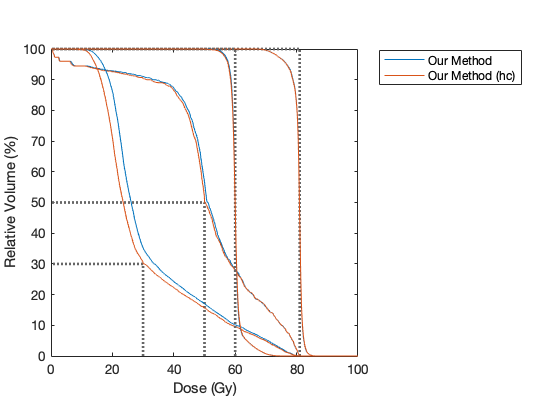

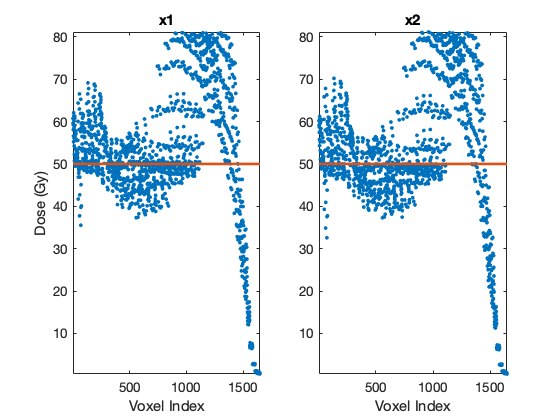

In [43]:
% Create problem instance (Zhang initialization)
prostate.terms = {pt1};
nodes.terms = {nt1};
rectum.terms = {rt1};
bladder.terms = {bt1};
structs = {prostate,rectum,bladder,nodes};
prob = FluenceMapOpt(structs,'tol',5e-5);
prob.maxIter = 5000;

% Our Method
prob.calcBeams(); 
x1a = prob.x;
fprintf('\nOur Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Our Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nOur Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Our Method','Our Method (hc)'}) 

iter: 1, obj: 1.0325e+01, uDiff: 4.4021e-04
iter: 2, obj: 1.0323e+01, uDiff: 6.3166e-05
iter: 3, obj: 1.0323e+01, uDiff: 1.7827e-05

Zhang Method
Time: 119.67
Structure: PTV_68
* unif | 67.55 | 80.55 | 80.93 | 77.14 | 85.86 | 1.88 | 159.01
Structure: Rectum
* udvc | 82.04 | 5671.84
Structure: Bladder
* udvc | 92.20 | 4780.02
Structure: PTV_56
* unif | 52.86 | 60.26 | 59.97 | 58.57 | 75.17 | 1.87 | 172.34

Zhang Method (hc)
Time: 44.60
Structure: PTV_68
* unif | 66.66 | 80.51 | 80.92 | 76.66 | 85.67 | 1.96 | 165.85
Structure: Rectum
* udvc | 43.26 | 4934.76
Structure: Bladder
* udvc | 28.29 | 2816.25
Structure: PTV_56
* unif | 41.50 | 59.96 | 59.91 | 55.89 | 75.58 | 2.68 | 244.46


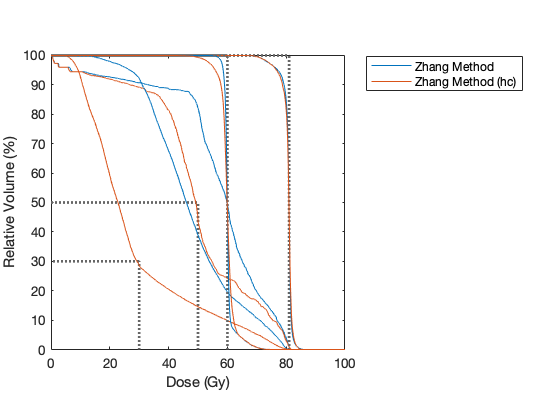

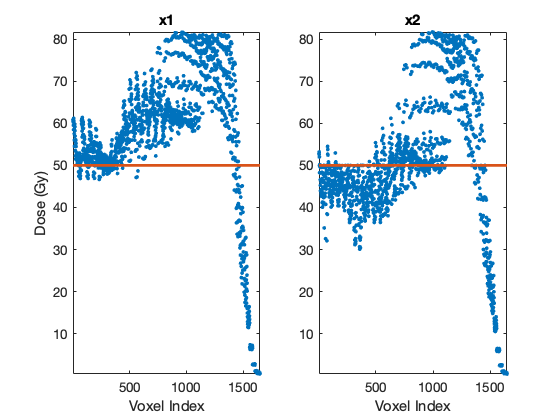

In [36]:
% Equivalent to constraint generation

% Create problem instance
prostate.terms = {pt1};
nodes.terms = {nt1};
rectum.terms = {rt1};
bladder.terms = {bt1};
structs = {prostate,rectum,bladder,nodes};
prob = FluenceMapOpt(structs,'tol',5e-5);

% Zhang Method (initialize with PTV solution)
prob.slackDose(); 
x1a = prob.x;
fprintf('\nZhang Method')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1a);

% Zhang Method (hc)
prob.constGen(x1a); 
x1b = prob.x;
fprintf('\nZhang Method (hc)')
fprintf('\nTime: %.2f\n',prob.time);
prob.printStats(x1b);

% Plots
prob.compareVoxelDose(2,[x1a,x1b])
prob.compareDVH([x1a,x1b],{'Zhang Method','Zhang Method (hc)'}) 

Time
* Our Method (PTV): **90.87** seconds = 1.5 minutes
* Our Method (mid): 288.67 seconds
* Our Method (OAR): 293.32 seconds
* Zhang Method (mid): 2803.93 seconds = 46.7 minutes
* Our Method (PTV, hc): 38.29 seconds = 0.6 minutes
* Our Method (mid, hc): 43.09 seconds
* Our Method (OAR, hc): 36.95 seconds
* Zhang Method (mid, hc): **34.96** seconds = 0.6 minutes

Structure: PTV_68

Method | Min | Something | Something | Something | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Our Method (PTV) | 66.95 | 80.53 | 80.93 | 76.73 | 85.97 | 1.94 | **164.61**
Our Method (mid) | 67.07 | 80.52 | 80.93 | 76.82 | 85.94 | 1.95 | 164.92
Our Method (OAR) | 67.02 | 80.52 | 80.93 | 76.74 | 85.97 | 1.95 | 165.15
Zhang Method (mid) | 66.30 | 80.47 | 80.88 | 76.08 | 86.62 | 2.15 | 182.36
Our Method (PTV, hc) | 66.53 | 80.52 | 80.93 | 76.64 | 86.06 | 1.97 | 166.68
Our Method (mid, hc) | 66.77 | 80.51 | 80.92 | 76.74 | 85.94 | 1.96 | **166.50**
Our Method (OAR, hc) | 66.66 | 80.51 | 80.93 | 76.69 | 86.01 | 1.97 | 166.88
Zhang Method (mid, hc) | 66.26 | 80.47 | 80.89 | 76.01 | 86.30 | 2.16 | 183.10

Structure: PTV_56

Method | Min | Something | Something | Something | Max | Stdev | Obj
-|-|-|-|-|-|-|-
Our Method (PTV) | 50.99 | 60.19 | 59.98 | 57.79 | 75.15 | 2.09 | 191.30
Our Method (mid) | 51.36 | 60.20 | 59.97 | 57.87 | 75.30 | 2.06 | **188.94**
Our Method (OAR) | 51.33 | 60.21 | 59.98 | 57.85 | 75.41 | 2.06 | 188.96
Zhang Method (mid) | 49.06 | 60.20 | 59.98 | 57.81 | 75.19 | 2.09 | 191.73
Our Method (PTV, hc) | 48.73 | 60.15 | 59.97 | 57.46 | 75.35 | 2.19 | 200.20
Our Method (mid, hc) | 49.86 | 60.18 | 59.97 | 57.68 | 75.75 | 2.14 | 195.72
Our Method (OAR, hc) | 49.66 | 60.18 | 59.97 | 57.70 | 75.53 | 2.13 | **195.53**
Zhang Method (mid, hc) | 47.63 | 60.19 | 59.97 | 57.66 | 75.51 | 2.14 | 196.47

Structure: Rectum

Method | % > 50 | Area
-|-|-
Our Method (PTV) | 57.04 | 5164.80
Our Method (mid) | 56.86 | 5189.11
Our Method (OAR) | 56.25 | 5147.83
Zhang Method (mid) | 56.31 | **4943.33**
Our Method (PTV, hc) | 50.00 | 5097.80
Our Method (mid, hc) | 50.00 | 5139.20
Our Method (OAR, hc) | 50.00 | 5119.38
Zhang Method (mid, hc) | 49.09 | **4894.41**

Structure: Bladder

Method | % > 30 | Area
-|-|-
Our Method (PTV) | 35.76 | 3304.57
Our Method (mid) | 35.23 | 3271.25
Our Method (OAR) | 34.98 | 3233.12
Zhang Method (mid) | 35.97 | **3036.98**
Our Method (PTV, hc) | 29.99 | 3007.40
Our Method (mid) | 30.00 | 3035.58
Our Method (OAR, hc) | 29.99 | 2990.43
Zhang Method (mid, hc) | 29.93 | **2887.88**